# Day 2 

In [1]:
input = """116	1259	1045	679	1334	157	277	1217	218	641	1089	136	247	1195	239	834
269	1751	732	3016	260	6440	5773	4677	306	230	6928	7182	231	2942	2738	3617
644	128	89	361	530	97	35	604	535	297	599	121	567	106	114	480
105	408	120	363	430	102	137	283	123	258	19	101	181	477	463	279
873	116	840	105	285	238	540	22	117	125	699	953	920	106	113	259
3695	161	186	2188	3611	2802	157	2154	3394	145	2725	1327	3741	2493	3607	4041
140	1401	110	119	112	1586	125	937	1469	1015	879	1798	122	1151	100	926
2401	191	219	607	267	2362	932	2283	889	2567	2171	2409	1078	2247	2441	245
928	1142	957	1155	922	1039	452	285	467	305	506	221	281	59	667	232
3882	1698	170	5796	2557	173	1228	4630	174	3508	5629	4395	180	5100	2814	2247
396	311	223	227	340	313	355	469	229	162	107	76	363	132	453	161
627	1331	1143	1572	966	388	198	2068	201	239	176	1805	1506	1890	1980	1887
3390	5336	1730	4072	5342	216	3823	85	5408	5774	247	5308	232	256	5214	787
176	1694	1787	1586	3798	4243	157	4224	3603	2121	3733	851	2493	4136	148	153
2432	4030	3397	4032	3952	2727	157	3284	3450	3229	4169	3471	4255	155	127	186
919	615	335	816	138	97	881	790	855	89	451	789	423	108	95	116"""

In [2]:
s = 0
for line in input.split('\n'):
    row_numbers = sorted([int(val) for val in line.split()])
    for ind, divisor in enumerate(row_numbers):
        for divised in row_numbers[ind+1:]:
            if divised % divisor == 0:
                print(divisor, divised)
                s += divised // divisor
                break
s

239 1195
230 6440
106 530
102 408
105 840
157 3611
122 1586
219 2409
232 928
170 5100
132 396
198 1980
232 5336
176 4224
155 4030
95 855


226

In [3]:
row_numbers

[89, 95, 97, 108, 116, 138, 335, 423, 451, 615, 789, 790, 816, 855, 881, 919]

In [4]:
1195 % 239

0

# Day 3 (spirals) 

<https://fr.wikipedia.org/wiki/Spirale_d%27Ulam>

## First part 

New approach and insight: start at the corners every time.

In [10]:
input = 325489

In [11]:
def generate_spiral(R):
    """Generates the spiral up to radius R.
    Returns a list of complex numbers (x, y coordinates)."""
    spiral = [(0+0j)]
    for r in range(R+1):
        corner = r - 1j * r
        side_len = 2 * r
        current_pos = corner
        for side, direction in zip(range(4), [1j, -1, -1j, 1]):
            for step in range(side_len):
                current_pos += direction
                spiral.append(current_pos)
    return spiral

Let's plot this.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

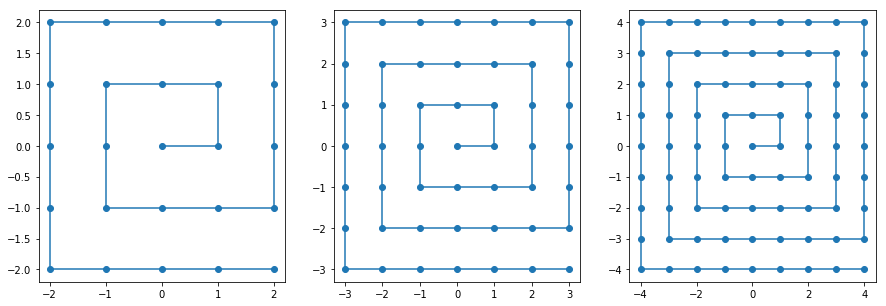

In [13]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
for ax, r in zip(axes.ravel(), [2, 3, 4]):
    spiral = generate_spiral(r)
    ax.plot(np.real(spiral), np.imag(spiral), '-o')

Ok, let's now generate the spiral and check when it's bigger than the input.

In [14]:
spiral = generate_spiral(400)

In [15]:
spiral[1]

(1+0j)

In [16]:
spiral[input-1]

(-267-285j)

In [17]:
abs(spiral[input-1].real) + abs(spiral[input-1].imag)

552.0

## Second part 

New approach: build the sequence incrementally and add the numbers above and below by looking them up.

In [18]:
spiral = generate_spiral(400)

values = {(0 + 0j) : 1}
for next_coord in spiral[1:]:
    neighbours = 0
    for delta in [1+0j, 1+1j, 1-1j, 0+1j, 0-1j, -1+0j, -1-1j, -1+1j]:
        if next_coord + delta in values:
            neighbours += values[next_coord + delta]
    values[next_coord] = neighbours

In [19]:
values

{0j: 1,
 (1+0j): 1,
 (1+1j): 2,
 1j: 4,
 (-1+1j): 5,
 (-1+0j): 10,
 (-1-1j): 11,
 -1j: 23,
 (1-1j): 25,
 (2-1j): 26,
 (2+0j): 54,
 (2+1j): 57,
 (2+2j): 59,
 (1+2j): 122,
 2j: 133,
 (-1+2j): 142,
 (-2+2j): 147,
 (-2+1j): 304,
 (-2+0j): 330,
 (-2-1j): 351,
 (-2-2j): 362,
 (-1-2j): 747,
 -2j: 806,
 (1-2j): 880,
 (2-2j): 931,
 (3-2j): 957,
 (3-1j): 1968,
 (3+0j): 2105,
 (3+1j): 2275,
 (3+2j): 2391,
 (3+3j): 2450,
 (2+3j): 5022,
 (1+3j): 5336,
 3j: 5733,
 (-1+3j): 6155,
 (-2+3j): 6444,
 (-3+3j): 6591,
 (-3+2j): 13486,
 (-3+1j): 14267,
 (-3+0j): 15252,
 (-3-1j): 16295,
 (-3-2j): 17008,
 (-3-3j): 17370,
 (-2-3j): 35487,
 (-1-3j): 37402,
 -3j: 39835,
 (1-3j): 42452,
 (2-3j): 45220,
 (3-3j): 47108,
 (4-3j): 48065,
 (4-2j): 98098,
 (4-1j): 103128,
 (4+0j): 109476,
 (4+1j): 116247,
 (4+2j): 123363,
 (4+3j): 128204,
 (4+4j): 130654,
 (3+4j): 266330,
 (2+4j): 279138,
 (1+4j): 295229,
 4j: 312453,
 (-1+4j): 330785,
 (-2+4j): 349975,
 (-3+4j): 363010,
 (-4+4j): 369601,
 (-4+3j): 752688,
 (-4+2j): 787

In [20]:
for key in values:
    if values[key] > input:
        print(values[key])
        break

330785


# Day 4 (passphrases)

In [40]:
passphrases = """kvvfl kvvfl olud wjqsqa olud frc
slhm rdfm yxb rsobyt rdfm
pib wzfr xyoakcu zoapeze rtdxt rikc jyeps wdyo hawr xyoakcu hawr
ismtq qwoi kzt ktgzoc gnxblp dzfayil ftfx asscba ionxi dzfayil qwoi
dzuhys kfekxe nvdhdtj hzusdy xzhehgc dhtvdnj oxwlvef
gxg qahl aaipx tkmckn hcsuhy jsudcmy kcefhpn kiasaj tkmckn
roan kqnztj edc zpjwb
yzc roc qrygby rsvts nyijgwr xnpqz
jqgj hhgtw tmychia whkm vvxoq tfbzpe ska ldjmvmo
nyeeg omn geyen ngyee rcjt rjuxh
qpq udci tnp fdfk kffd eyzvmg ufppf wfuodj toamfn tkze jzsb
rrcgxyp rbufd tfjmok vpyhej hcnz ftkojm
jnmomfc jnmomfc bkluz izn ovvm flsch bkluz
odisl hzwv hiasrhi hez ihihsra qpbmi ltwjj iknkwxf nbdtq gbo
gjtszl gjtszl fruo fruo
rdapv gaik cqboix sxnizhh uxmpali jdd usqnz advrp dze
flooz flooz qad tcrq yze bnoijff qpqu vup hyagwll
lnazok dze foi tqwjsk hpx qcql euzpj mwfrk
ilb fmviby ivybmf gtx xtg
rpauuu timere gyg wcolt ireetm safi
croe szwmq bbhd lciird vhcci pdax
hnc ykswt qqqmei goe bri wmyai hnc qpgqc pberqf bzs
hsnrb wdvh iezzrq iezzrq rdbmpta iezzrq kemnptg alkjnp wymmz
ngw don ddvyds nlhkoa aaf gptumum ugtpmmu
vmccke qbpag kvf kvf tgrfghb kvf bhpd sglgx
obomgk bkcgo yso ttft vbw ckl wjgk
fli qvw zhin dfpgfjb udsin nihz ovr tiewo
tgmzmph hauzieo jmg tdbtl lvfr qpaayq qapaqy ausioeu jun piygx
jkp guqrnx asdqmxf vmfvtqb tloqgyo ioix gajowri tmek ilc puhipb
uycn zxqm znft ayal znacus kvcyd ekv qqfpnh
fqghur xtbtdd ztjrylr bpuikb ziyk
rvakn uqbl ozitpdh uqbl dsej xehj
laxp haz jyd xnkrb ijldth woy xapl iqgg alpx gnupa ukptmmh
dyiy dyiy ihb qcyxr
wbwkd hdwu zvgkn hdwu wjc sakwhn zxujdo npllzp uyr uyr
fxczpmn cininu akcxs ggslxr riyxe ojisxe
ppbch sampq dnct afikor dnct edsqy pnzyzmc afikor
jnvygtn hijqjxl vsd jnvygtn nqcqv zns odq gkboxrv kolnq wrvd
mroq mroq flsbu flsbu
fyshor xvpaunj qmktlo xoce wkiyfu ukcl srndc ugwylwm ozcwdw mtqcste kpokr
cfh cxjvx cfh cfh uewshh
bpspbap bpspbap fquj mxmn bwls iirhvuk dmpkyt exrn mxmn
tvyvzk ezszod ntxr xtnr och
knfxhy kbnyl knfxhy xhkssx lxru uprh nkxpbx oodolxr tpvyf
nblmysu iwoffs upgof tyagwf aan vovji ajk ywzq oyfi sfulz
aushzkm lcaeki mkuzsah ynxvte rsntd refk pcm
mgguob gobmug dzenpty gmogbu
yvq eepof rgnree nerger fpb stfrln ernger
hrgkbl mzwvswk rsrsbk ieru holco pajvvn ztgsr qkyp fyeg owpcmoj
fowda gmsqdca yugj mcrroxv mqcbojd fjnqfji qdfsc jqs
qnc rvjfz vvxk sjd xrma ucdjvq sbw zydyt dfzww
ocajazv cozaajv tqunkla udwf ecnnmbz lsakqg bki njnda zsdu ccfqw rxpc
qqm qdfya qxyx qmq qfday uqnfttt
rnbirb iapor qet iapor hxkhz dfvzig pedl ybyb
mkgamxg xkniv meb hbzmxjn dhbj zhbxjmn hdjb
ilteux pyutyfx mau lrr bacak
sjjonmn dbbbgs crxyuu jztstgd ezb uiabyaa
tra fle ufzlvf nnaw kec hiwnnlj tei wld iyt syk hjdczb
qmd jtlud dgh dbanock fzp dsjgqru wwvo jwvxwgv xlemfij jcacd
rpkx oxesil snazcgx fly miiyc ikmtmp oefyyn egbw
ypfpeu wldnyd acchppb yqwcaw wldnyd turbz megci nbgxq xkc ypfpeu
iqqv iqqv neui iqqv
ypsxm icqyup zyetrwq nbisrv
viommi toszx dpueq eyy cunjou ffcjc jaeez djefra pxvkj liudlig yye
fhnacbg jghchh ghjhhc iue hwqmo
vbjw lpn cizba ltnsfpz tzoweml irewlc uzckhpd mszal obd
yeos utxkft hflxkfe fxczge qpgigkc ksgr vuumql vhlvv
xzmkv xzmkv krecdi klpem jsbu nwcmik emfzxf cjmpgnj
vtkjo pmiv zou gxo qdiyxsf hwyinjk jhkgf rjq
dyuoc ywiyvch irfgl ywiyvch fxb fxb
tuz onhr syu rqya abkaf bcfx mbknex juwoor zmksl
oheg spjorx ksdy vwtq fxz phvtazk tcze lrxg
hew lbup botaj ltr jpd
dxgc tzinkej gnz hxvvub adsqmc dxgc asgpp rqbdcra goy pmamdua bhiacva
xqv ygb kihxqz vyv pjcny vmyvsdv cgsi nfyx
tqga ssshrw ndq qlbvwh huyd pxbgj qbxk dkkbf jxy chsobw pph
hxl iwph iwph xnr otifm ljhre
zlgvpd kapxpoc dve rklk ogh hgnp rbrmc zzkz hhmcx aklmo
sar gfor nkf hek nkf aql shc aql
dtcrw kfjzcjx qyhi bldson whwdayo mqtgt xhqzp ttqmg
omspdml isze jdl nvwo qrkm wztfg ssfgyh dryj jhp unsmty
jxt cszylng ifht ixtuna azoi xutqlv jtx tjx
usgm azuayp fgkby ezpyq jqwl ezofj
tnhvil nrvg moyrpqs sldx qymoff megflxh pyhqwms xmdw
zomy zcquwnv lzx bvcna yods mjp dgsez
blklyf xokd gpit tiysj yrwfhm tofx
dtig vhdp omuj vhpd
fogwxim qvdwig emdiv jvhl euwbzkg xvxb hwmqo ujdmlp epmykj
sjxll sjxll pedvgb sjxll
drvay gtzhgtx yrt okz nqf
haxfazn pvkovwb pgu tgshw mxcjf pbe nwoymzc mxcjf pbe hydwy jradcr
prjsloa ahylvj okbsj qbdcdjt pmfo pagyoeg vkmhjzt khzmjvt opfm xfrji gyjqyel
lzypt jdbtrad ogr jdbtrad heink
rcoucuq gdxewa rcoucuq whlw zhhm rcoucuq azaqohe mzyli rdvaf
yuag ebcf yuag nsotg qqzuxr jfmao vyucw wmoye
qwvk xemm hgqrr wyxkpp tojndm xlvzypw jus bgnu bgnu nklfwhs
daqi knenmku ccm xkiuy vkexsbc kvvdagx umopitw yaocnx yoakqql mllmsp
mrxgl gywit mfopia ncnsvw vdxek axuiot rsejua nei prndudz mnu
egqn gaa qgen urs mix zbn rhn
ewharq aihy udkdaob kgrdd kgrdd kugbjtj fcef llqb pduxaq wcexmm
dwtiw nelq hppad algxgf gcc upou akm efnb mxmhrud
yxqaa ups okbhgt iet qns tqn rnjqxgp
npmhdm cgds ldexvr typi jyivoqk zkgq vfyxu xgfo
dkwnmr umm dkwnmr okpjw wqx jpztebl eqsib dkwnmr
dxbild wpbup evscivq dxbild dxbild geqp ojfbpl jshvqej
cxdntxs csfocjd pyy tuhws teb boyloz xfw scxh pxhonky
lteucke xrgwy hszgzu hnyrcvb
pfgsgwg dxzh fworek qbstod
usemcrf psczxu gcjtr brls
hjol efxczux bqdn gvrnpey yyoqse gbam ndzyj lbwb bhzn unsezg
bapw xifz blupk qqdk bofvqpp wnbuwyt rnwocu lzwgtt zucag pov
xkre lqvd juf lqvd xio xyg xyg
tzdao ztheib aymcf aorg iyawrch hetcxa iyawrch czdymc ccv
ucgl azlppu jvxqlj pest
dvwlw fuuy mnhmm okrp ualnqlm uyuznba fzyejk yaq crl ctprp
odfq knox mkbcku pxucmuf lpjpol phl
ixongh hfs ruorbd auy qyssl kykwcix aytsm rlj aytsm duq segpqhk
izufsk wedpzh podjkor eamo vqvev ifnz podjkor xrnuqe
twyfps bmdbgtu qye qkwjms
wlav htym vhsnu cocphsj mdsuq vhsnu jflgmrp
opajag itwjhfu purnnvk opajag
hpkopqp vnj aialpt lzrkzfs nwucez nwuezc
mcx hzcjxq zbxr dsx tpknx fva
rlvgm xrejsvn ghawxb efyos xty wdzdgh olahbtn rga efyos vhtm nsr
cni mbab qtgeiow ulttn rckc kmiaju jvbq emyvpew cdlxldn ulttn brhkprx
eykpffp rapik qki fhjgdyu tome ehjuy bibjk htxd vexvag
wrk dpxt gwkuiov gbkif ike gbkif pcd wpj toywyf qzsa aol
yqwzh uujn ujun ujnu
srs ralwxrz yxvvmgp sjhbhk waasid cqtxoxf whcladv jkmaq khjbsh dlavcwh
mdvsjh xaj etvxlsy fxgiy rgjesel rlegesj ptriz ebdyhkp kugxm dxv egljser
lhehwrs mqevb ygmv gri izop qgb ivm
loqqam alojlwg hgen hbyw qlwpun loqqam worgnwk kope
phozre todsknr todsknr ibj mvllsar
wuripy ruwlfbh wukbkey qhq iishw tvtvci xawvxc vxacwx hsiwi ogq
xryq vxwupqa zhqex aquxpwv bnvxrba dtbxki
yvvwh zvsm vqskhp vqskhp ggqqlw bpn wbuv
kqz tdy goqwge ygn jgd
szjjhdk zkpoo nxexz ebicc
wzuemcj oyd qupulju iaakzmt vzkvz
nppahov umm wpzev wxkgfxd owgekp bhhb bbhh dgviiw kdfgxwx wryb
bnc rhes lmbuhhy kwbefga bnc rtxnvz bnc
ani mggxf mcoixh zdd nai hbhzl mes bdpqr
mjn uinoty jjegvze bjgqg yhqsxbt coj obylb hddude xqi rhfbhha alood
cbjzj drmihy tfkrhsd nuhav hihzx bvblqpl tdd szmp gjgfv box
uumhdxd cmwgyf vepr rwqdkj exwk
hwvr ydvw bqefu kghes gvbhp awms iqsqes khgse
mrey jqfw fwvzhps komj dayvs fbui zmtd cofn mrey
dsjds fdpx irjj usndok qcctsvf fgk wvg txwxcl dxs llp zyilwtq
xmkelgk fdukc cye legkxkm wwly
enlny eynln cccku brkz dpof mwfoxcd yftmnqh wpebvyc
ggdn jnysl dsacffw ukj hdae cmzxku
uqhm gcachmn kxndfrl htmfis jfnajz fiqiypr kekho kekho ndcw ckrndub dejfna
keazuq ertql rauwl keazuq obmh rauwl ksrotm
jppp poigqhv repfsje grjk xwkyuh pkx ayzcj hoxzv
yhjw pcuyad icie icie icie hwcsuy wcd yihjh jnrxs
gaug ivvx ceb xujonak hbtfkeb ttciml cctoz
dggyyi dggyyi gqlyumf yasu fwdfa cbb nncn verhq
rhgcw gpcyct kiuhbg kiuhbg gpcyct jlmleo nhumm
wulxxu jyjek hclcp ogob viex wiqcupq
tthu nxgzpid kcnj mss ukapgkp nnc bxjocv qwxs oejwsif aywqtu brahkb
dtde bgvb smu vbbg zhlu
lyo nwjjmep ldbok wgxhto wwuh qfgjknk wnsl
lleyr onha hkwulbm jfg
bybjwd uoxvbh mvj iqfpnxs bybjwd zqtszp wvc lbazjr zkzenja cev
rbuyyr divtslq yuqmyt ajyveb smxsjb nlk tzqhq ims fewg wpjhr gqh
kpewfd beq klilis klisli eeezut
euqh hueq ldoo crqurv lvrwh tmaewp oodl
bqi lzrf jyhvxfh bqi jyhvxfh nbztd lwpdn cuzi
srjylou phavzjd wost uxkaq byh sluryoj
ihrdk bcegkpq nygrs qbcq wyjg dvzme pgzhjl vibg kvv
ijsx iedemek ktlz gtga tbal lbki gtga
vmiaxn kefig kefig vngxz
vrdmfvi qts vlvhq vlvhq dihmq
cfz dyrz zlw qnt vok fwvahg skshbqf hbwozdc ntana jdb uflp
rimbj bxemw sfps krtk umta vnk ewmbx nrlje ymrtqrz mxewb kjxunbt
egnuti ozat eltl ngueti
qtcwoxq rmaf qtcwoxq qtcwoxq
zws gcoa pydruw qsrk lrkybdf ugr wkrxoj nyvf vitwn
tmr hhd dojid zwrj bhsim righ keqlep flzunou
lwoquvy acjowxk tqudk oenvioh nyavyl
rgh dfhgyke iff cpxhuz hui koe iff hui dmukrei
bjiumig lcbmbgh vleipx sfawua rnf
gftfh qwb tfdroe xbno qhgofm vqfoe mux
ljdrr gyfggai iun nju xrucbis mhrcrh fukr obvuqc whlalfe xrucbis nju
nxjmjr egqwg arllu xqaahri lzc ivt uhsti
sqiepba rcmts kvesv nvp
tiksw tiksw rjni gbhvzm ctbq zuqfyvz
ibsnm kfka aoqigwo sqouih rxz
jmymq lxio adtmk umyu sxvzquq bporqnb heol fow
mepa eckq rqviawv dkqoei ifmngpp jiava rtklseu
yuycd jiufjci yuycd uowg yuycd udq izkicbr csxobh
nwu tfsjavb rruoxbn oepcov elxf rruoxbn rruoxbn azglwth jcjm ksqiqpv
dthfwip zqnwa zqnwa zqnwa
gso wruece ufl crgnlxv vllsm dpyfm wpa ctxko
wvpze seodz lpq lpq pmtp wsxs ffppx
yfxquj phvjn rtwieq rtwieq kgxztyu vbjvkc prqqd lyzmdo ojbrt ojbrt qiqjz
esaezr rpggiy jey kbzrhu uthus osr xxaiijd qfxlf auhzbx gkigoqw
yfhcj uvgck cds gjhhrg cmempgj yfhcj cjb
yxi voxvtuw unwg jqqm
igvjr ljz rus sru gbjtjt qfeg ztu zjl
leof ocxns hbkoysh hbkoysh leof
hab lyxmf yhh qeks fwhfxki xmbcak okqjii nfgzyg bhtfgdj lpmjn
mgognh tad herere lvwnzx ixwqs zphmuuc etdjz kczsf
mtej rlolsnn zbl uykek dpkan gmz etxtgj
mihuieo emjgbp jgks mihuieo iexrfw mjdnr bvp mcuzea xkbusvi
jvqpj bwt jvqpj bwt gxr
qpnd fpt tpor bibbpcg hmvguez wqc afl ckviua gpi
dntmcg jglm sxtnu sxtnu sxtnu
fzkbptw cbfwo ozvwov wbv gcdd izqo ovwzov lolewo xikqpw
nkxyxzd kpn datf fki werq mwidqx oiibor zizcjph
xvgyxym zor ijoy lvwsf fjuara idvvq rreit mqyyy ctio tzwqqhj rnpee
maqkfpk maqkfpk xukg sfdmnlg xjopvr xjopvr irf
liujcd vnlkouy dxkwc gto vhjvtw
swhqhj cas aupsd swhqhj cas bvbooii jquck dtdm
igh iqicicf ghi pcxt srcrjx gmf gyscphv
drplj drplj wopgpnk wytag wopgpnk
zexe ilcqoh qiefb txkuv lirfzv
ovvpn ovvpn uqeurqx uwzn hgmucj ovvpn sjxulms
rox silka irhsvym kutus otasof tdneav pcagds
mkja omu tyshbfq onp trxs lxa tftbv bnpl djhnc zdqfs muo
tjj rmmqas cbbkxs qio pikk ykyew gxlxt nhsyl ykyew
frcprg njrz oaxcmhc qben pedm ecvtga nzxwpb ior gaklot dpem
zyt kncau spoe qlchg sqys wkpbng yflju qlchg vkve bzadbpa
qtq pkaicl qtq mfkfqvr dnleiq brrjxsx uoyxh pkaicl yvmlug
firwy imtlp ywl qfa dqrbazz ztzb pcsbwhn zesmlag
ivey ivey mtvc mtvc
lhize acwf moa cdeoazd voktshy qmvqq jvmuvk ljfmq tsanygc
xreiqkc aawrovl pofcsg xreiqkc xreiqkc
cjbzvn ozds iniqu sdoz gqmki bablvll krs vjzcbn
izsod htkeqz entxn qtns prpcwu omfnmoy
kwfb tctzda aztctd tadtcz gyt wunbcub ydiwdin xxk
epnl ijcp giq ltfk zjcabve zfksmz epnl giq xxxbsom
ulyukpa mdjsbn dydko uhkdt qms aaaj hustlwu
zlsbu ohx jcwovf egf zlvpqgx qhejm wrywdmw
uhxqrzr mmu kjxcalj unuohiq rri yzngnb ikvlxry mfiym qbksdx
khqciz som yklmm jceb khqciz jspy jceb
ncwggv njvi nqox krtsn lnm
bgtqme xaxcoq qbtgme obqual vorfk baoqul lgrb
jli tsbb nlxjc pkwzmz dlxrj hmho gzguko ilj iyaasm
wlmw grkumg dynwtyo emxhhqr huluk slpqu uhqcmd absmr ufirmwr
pbs pcammxv dplfr tzvmav nccyy blvyq ffhnz bccutq
hgge ghge vxmvz hqxgjdg zab guo gheg
ylj bucoyoq udndc wpgyrbx ueh udndc gxdsdh hdoz wwgqlg
cjdeh gttyqe kdkm ltzd lfeozse quvjq mnwhokm kdv oojxm nxt
mfkzus knqxt saxkqww njx zumsfk sbmcyad cpt agvbuv
tukn vyco yobvsn bzgnn klrnzy kea thzk pxpwq ryfff nxzm
ylbm lxlz lybm lzxl
wgtxoij zad slgsi cvnxfg iomswwl vmx
hkm yinhnkj kmh kwkw kayknck chur styjif yknakck
rtfwhkq rtfwhkq zsf zsf
sldq zlntr ueegiw kajivqc ozcbm ceft snvugom pdyc elppeed nnqrp prwwf
lhk xjonc muc tudag tsafx mmivb dvrjbp qgrew
hnzer fbgqp aazta aazta lxaz lmgv aazta
victgxu victgxu mlpd ummrnbx cazjgnw isxcyp efy zfa cyusj
gyojxo onzq gyojxo uxufp awi ilhl wefwfxr gcjlt tmliynw uxufp pdcnxah
wjwachn xkuhfbp oky oky ybaeqkr rbuix yreoaw wepmye brvon aasb
kiidorw vxtxiqx wtqvbrv efdth isel qbom vcssyc vxtxiqx wtqvbrv riafzsw mqzsj
eurpjd vkhdamt tmfx czeoot hiz ykz lmixzq tfur jhzr
ipuftpj qbll sqkkdw fwncmiv bri oeeh lehd ioh wag
suima nanngc imrmc krq atxdo woy atxdo akev qlr aezco qlr
cfc efwbzck ozkmcxv moczkvx ccf
bnekky iakrk sask uwgnjp iyi rynev bdnas ldh kass
sicmw vvjbvv cap nsumc xgvrlm wsoo uoqdu psykckm
ugg mtr wnzhmmh tjxc ehwnji lwhu mdsckk yvmk enubrqo
grb oxmxz ohu ytetedv ssx apzlppg fdkamm sxofc jdt ynmu wyejok
umoep rbyqm eqfk twqnog cptbbi dragna ngqs ffb cexxnc rbyqm
utizi ormkel wvwur bdx ecelqbv xiccama aag glfvmj
znb rsuqoa uxo svc
obs lbifa cffi catpd
qkxwian ajlzjz wewduzp bbyv qmt fsr qgiu epinp ghmf
hatg bfgmb aght ghat
kuq inp dun cknbun wmwsu drlmmg kyxc bdl
bddybth swdbf jhi fva qpobio bjwm wjaztp jywi
mgckz vhveu zkemhp zdf xtiqqew mlx wazgd
umbjq pya lvvxf jeavij rhrxvew bwjqgpr piz
xaycpwo vjcuc qksc yuixhni sfbfb dydyaq gdfvb tggg xidphvf bpjdrl goskxym
agxfoip gguif wvo agxfoip ntkbaw fbyggy ooft zxih
nzvsu ffwq uxvfbl qrql olhmhom qhdltg ymwz krtndtx olhmhom nfsv krtndtx
qdp jqk ustz xjripzv mnk grnodk pjwdsj uug zqxjqj
mufrcox zunisfs ocvcge acamm xua vor bsde kxr vor kxr orccxx
ncycbp anvcxay bmm wndmeaw oso knmk mmb wamenwd kmkv ppdd
motdcn xzagzwu vuzt utffrn yuqxzrh uvzt ujttq
tauoqy coiy ybesz tauoqy wpmr trquyne ahxbj jzhems dsdy
aczq ypw pgmzz srfn quatjgf
cih ypapk bfxvr euvhkk gugru auhqui
vyf pssgfvy dnhvbfl xpacme dnhvbfl mzdv iynq hcqu
lbzvbu hhxiq hdfyiiz iyzihfd xhqih uzdqyxr
iapbdll vdr cprmrkk vdr dfjqse mlry flpqk vdr
grrfkq xcpxd grrfkq dxc bjpr prvwh swoc swoc
bopo chvwuhf qhd ieesl xey ieesl fnjcbe
kic fyq hsucnu agwyl pzzmd hqksh psw
mxf uau iti lcoz lpg zbu ocre wqlocmh mxf nidqj lcoz
bypmix ptzxgmf xmtzgpf hrvzzq
lbfw zwusma lbfw tuyyy
lrf uej unswvh obgsb npbl zajr kenea uej qnyjcu wzufim qpzkgya
qcrxj llyu kligt hlm ehwtbx dda lgsvhdt xewfcv uikn
nfzjx izqdbq mfbxs imiuc yqxb xlmvix izqdbq eflqfq wku omgtuu izqdbq
lasdwg hiy btzt eefd eyoep icn nnmhg otml rek luixac nyzgn
vekteds utsuxdx utsuxdx vekteds
feyov qrij zbebwg ijrq seplram wttkwm zewbgb kzuhuh
dmkgtv wohgqo ddtqmv zatahx mym hqowog tkmvdg
vhha wjrmuyx kqh vyyrj xzchbi ejsdq orlxg vyyrj dlrc
yetngqn zdtuqox hkarjei fqpsgh eaqwbg zsssog ghb gddqqzr hbg
obldb zsrhz zxp uxphnev mwnbc pfjft fms xwslk vjm fxy
nfij dbfykv ttq gyjgac igxuyqi gtiioqx ilhdex dbfykv uyp bdiwya gqf
pffzruz vogfosh dcs wje
pohhf fhpoh oon yyz
xxuam afwm qxl lnt syyr bwxhhf sozauq shlhfmz kwnn milav ochq
wefcqrt gejw cwerqtf fttf gjew
jfsvnmr osca epwtle pgfif sxom
exlfzmq nakp rgdnx rrcvth vhrrct aajjdrt ryyg dsozd jdqlqj pakn iruv
rmcvo txszcs xxhyxz hbsozk wshkocf rmcvo rcbnt
kitz yjgney yvkymef nauj hmllsgl kyhm kqr pzsu rcf pzsu qpte
cdinpx bfur mkj naz ihkheyr nohhoe
ylris xeqcgup wap bbfih tgfoj
ina gnlnm zyeqhij cudfuf ipufae bvkdzni aat teqsg cudfuf bjokrbl teqsg
aedx edax dnfwq qndwf
rdngdy jde wvgkhto bdvngf mdup eskuvg ezli opibo mppoc mdup zrasc
qcnc iaw grjfsxe gnf gnf
zbjm snznt zelswrk gkhlnx dqxqn qqxnd dmro
zisecvx ztezof uzbq otnrtj qsjzkwm ewvcp rlir bfghlq tgapdr qxmr
ipnqj opjf vabyoe wkwnd
wyf mfqxnrf apm snarf jqu aaghx pwecbv lvghayg
acncv jmmbwlg oiphlm ifuo cvt
pvmb egansnd zmh gcuzzci rrxpslv ubith
uoleptg xbouzn xbmg cfh cpn wpqi xbouzn xtxis sxzpns
rilybri kurbpq vfmjpck tjyogho hfyxad svfofx lfbbhxj khaerfs iqr
seaebgz wlmtkre qguv qguv wlmtkre
sgo edkxya zdqgwtt gxu nibuu rairqoq mzxli dci qsv
tsol mdhzqr rmaqnru ggvcq arbwkn hlkcnj ljkcuof
mmliphp ocup puoc eijjv
gmajqpb ijki ijki kvz
pmqss unhlpcj dlkll nuhlcjp expe tlurzmv nsy vlumtzr tgseozl
gkvaoni hsba hsba viuedv phyoclp fdq phyoclp febld nqfs
rxvdtw abn pntv qrqfzz slsvv abn lrxix mnu npot
ghlfjp woy xwkbmv bkahpkj jve cncvk jvdype fwgvoju yrkwjp gwfvln mvkv
kmluh mie bby fwer chsinb ojglqr nqk mie
yzmiu igkgca ybnsqja jpfejtp yjddy xsosxfi ingx qwuhb emrkwpx idqjmmm
btrllw mphm dkvo ewdl dchcul yah btrllw kmqi mtvgk wtb
hxsgard yuikc lykt tdee adprp gpougod klnzk mzsmlb
hdn znblw ifoblur bwzln dbv
smofpbs vjuyiro llk lfzesga tybu tybu
gffnpug xaup iqiyz fjkpnkz drrk fwyxw lwzfskz gslwpmv vjxylva tbkyo nib
evydmb nhwuiiu fkerq nkgbuyy uclrs ydjgglh xhotwbm riirgzt
bsub eavbt uvd dpzwyt rhn khrbptt xszckc djnfxju axofhat powmso nvdffrv
xtuykl fjz mbikc xpnx hmey fjz fjz
rkls nwdcsyx rkls rkls
tygml untequ ybdfumz nqffbq uipc sove hfnqj
ytecew vven koqn royynd qsn ksl qsn sdw
hknlw qwho whoq oqwh
lzmmtqu qvhyeo cnofuj utpwkjz gnirz yhhu aodbnd
zsr axw kwtzcv tydzo kwtzcv lkxsm
rbjtqe nihifd gvdxd bpxzy rxteky vgcgllv vbbua anygiup rqo
dpd wblfwp wblfwp wblfwp ygahc tqjbaq
gsw gsw pacgj xmrcz zmxhmch xmrcz
pdq rhe xqmq lgpkhg fyffrot ovnqh wle
tbjavke ypzzrj jizx gdxoh icjsat otfh fmygumv
snch nxlgjgp jeyn sxoqfj jtage jtage iuice
rtb coefuj grwg grwg rtb krhqnma vfhgbr
vhegtl btorwxg szcev kbvkx itsk nlzpbed
hiukrf ilzkm yllhh xsgwkdp zyy kjbv
rfcg tdorci zcj wzftlv rfcg rfcg
lgbc lzizat vsno pau nvv vsno bbr lzizat qhtb gwp
sfwnio tcugjk bsfsz ykyfwg ibkap fsrvy mygk kzunawx zyhyh
mpavlh qps bylh lttjkz rqabgk vewb bwev tlzkjt gzrbxga ktmso prpkj
gpf ims ynh ffrs vpa iemp gofh cgbauje
secys qks mcnfhwh drog kqs pajy zoltkw lfihnb myb ioxptu
ytq nrta ouk ajqblf yuwwcd zdy blyoxbw dakk nvgi bzrhzaa
nkoych sufiia xkdvw crtldee zycl qblab egqhr qblab
nllno muxaf vds qjnitmw zkpj wskyhft kmqct xamuzpw qcai cdjtbt kaxv
qzdytpe osr fuw osr qzdytpe whperd rydwdcl knoa
zkdznhd peh duoygr zamrgl irnvj otpe pltpq jdkecg
byzgw rece iigdug ehif tpgje
ccnn foqdran gbctca tefdjxh ntcr rjciii xip xlss crl wvvhzqm twyohf
dqyii milqqc qjgkojp qjgkojp ryde
tdkyj tbrcud tsba vqtmb cjwxnf
hqhmq wemvrce nagig pwnw nagig epg nagig vlsi
tqgvw luoplw hccti npjm rytdruq cylrsun rytdruq vjsbjl rytdruq ppti
itgt tuwc itgt rvp itgt tigns eipl ksmru
pdw wdhtkn nbdbpn wff zhuuipg rvemv qxr
qgkwdq cjilayh ymeks mrpuzai dwgs stfstgz ucvqhb yout oiq
vpxik ypfr qytimvu qms oxbmw ppyfx
fwwidn gdhd pyuexk snsz iwndfw
lfcb sllxjna lfcb hpzahfg mmvgaa svny jhuzd
unyg gicmzd fwc spkciy toyq wjupckd vzzx iuqgka ytqycb pxsufj
goj tnrcml eyizngj txa xrkiw zvu igduz
wek xrrlkna clyof rrlnxak
cjm rmyuku vjom gtf
buk cfae awstd dywgqp hxo wcxvf laihqw xdqfes wdbh qceh uzlwj
sudguo dxwplto rlebdh bkamu dxwplto
crwkyxm yuz kjtdhom crwkyxm
trhc sduorxr aizfryh rsudxor gbyc
pczkyl bptp qnn nxmpwsx udrg hhlb rubtrmx twzodlp xygnht
jmqct cden yfajtkz fevcw sxonbxz sxonbxz qkzkm hhngr fbv
sdsnm mwvicr wypfi cty ndbowr woiz mrauwzd qlno mwvicr
vteyo fng lvr lxytn txpj milg
wjx ahtmgo cgwcaj kaxae fhlvlqf
ezj eetqhzu upwda iiefwlk vyvby
imalvy yeghqe jwcu mvrod cwju
bxnmsa yhfu npsdar tsbri hfuy sirbt oofxmy
fkndt elbjtn vepqtxt elvpf fpelv bzkgag qttexpv prblwb
rmq iqs yvprnyy iezqrzm wlqsrr
yviovq lekxghj oey qwhzj lxknxw qiyovv ksnt jptz
tyrg cifxt hugqf tyrg ffuiv jmax qyw fozfosq ffuiv
nmg rsl jpzazd qbtlf yxqtsj czwmdfd bamge lbjdof uqy jssc
cbx boozjip pwgvzlq rjz kxy kxy hszacok fvsq jhnir cnsba gafz
sbcuxb wfur nnnfqjj fdwg huhe sbcuxb
icwk qelbxs uevp qped zsnhh wpuok wddxsln ftnzupr ruxol cgxjb jbhh
izcp htykj xxmndoq amnspe htykj
vverol oixwlny vqd tvfzu henc gnyrwr
ytxio etytsx choynep zqapo hfjit
lkvgr oyzfa taiqr jok djatvy ckif tmdw oyzfa zroy
jlgpyp kkqysg oqjki hjohoug hbhta muilz zft
sumfyu wftcu bwwdcy lezimwa qwvxv zwh mqyv bmfot aii torcol rnt
tpdj xrw ccsbnh fhptv fwkxjfm dmqaokd bjci
zxi vmf vmf dpyg
sfzxysw lcms bkojtv bkojtv
opywo qll ipkitr mtwp tudrr svhyp huz bxsdpn xomfy
gkod luo qrosbp orbd rpsjzyd rlh gdok tze
nusiuq nusiuq zeys ahufexc
veno jntg avtmtdn qojxru zegdcql odfcetz pgehau
uqun vigjm ykac ozlelj danmji bibugox
rpuozh ajwru rbvuevv uhzsq
iawoe tyb aewio ymf byt inijv ctu fcys micsgzl pbby alt
gktyxp ris mqpfm bkqsfl nrg idbbcxg jhcf
qibt invvv qibt luitx rnm eby hrfbmwl wnap sgkzvb qlwc hrfbmwl
jwkv qecsjbw lycgldd wjvk tjcp dycldgl pzrvr zrlcf kji
nzsrmiq nmhse ilivrk kqv
besmyzi imkgpt iekbjax abxeijk uvzs wwv
jdocl uki ltswp tjkljc ymce iuepze qygqxzs tei lkry
hhyfy gvzd mqksxlq czn afe mesnag eep frwgekg mqksxlq phpy
ehg connnza ekt ddgokw
mpbsoms uzhzl xevww ztt uzhzl
lftybr firc awsud dsxdkk ltf ipjv dtx lcymth
vkcpb gxtxq yioeq fexj xxgqt
srvca fslnnvf nfmkpvt egw wemumq jie vznf dzsjw cukf kcvyir
yxjkl lyjkx jyxlk kgc xtz
tpoe xzov csp leleoqo noyre tdhf cyib sjgtdx raehdw nmcxp
qvt uhznqe bpvos vtq ddlebtd tqv
xlw utsxs gpia rvlvnts elkxr dddihy tnrslvv ibf wlx bxg
cwqnnrt rkkqyf dye yde fzl pthanj
boc rqjenpp xjqte jteqx pvoofc pidqe ruoucy gvnro ognrv
qhalb gnazwc fhl iuti
clnbjfo nnfs nnfs heymvr oarew oarew nxu
lwtrotg hiaxwj ymzbly nvhzjhj zlsaheg nvhzjhj ymzbly
rrvi tsjp tsjp tsjp killji
rpx hiclj cmwq ibhj nfd
pvwymn iebkd xmpw vuhhkap ksw zigzy mzzyyxy rmuh iwwhea cglfq
rlwelgy sffml jin qsdzro xlsty mgqzuu etxjuo emzd jgnoyq tkjuy vfvb
tkctdj hhkuc viskmy obw
zvjkuj akeky ikj jqd hfhzbwe bkc
btev nrdo hcyiuph stf qharfg vpmel mpfz nvs ytgbbc
ieepn ndueuw svmdr tcvumw mceyrn mrjwhyl tbdj mgrgvz
uxrs ckyi xpmqm czzrkl cjp
nlliwd wrqkrkz yjmng nlliwd zirde hcjjn wco ysf mgl
dxti lcahe ommare izlwf ramsfb nzgfvo ijvm fwymrdu bndq
isxy jpvuzu tdduyhw dixp cfa fkzbteg ytoi kepk ysf yqcpi
qmeprfj soqo ncgeor cqsuuj grzy wogxy vyblnbg slvtry vdols kka
ltykfp gtzl olrp gxend vapee deq
emywfbn dbfiut rkt wvwe dbfiut bwffhea yuzcxv gogpicp wvwe
vqvmrp ofbk dlfabd jwllzxk obx vqpwjj umvng tqwis fstxy fstxy
miha zgvyux rmraszo xwf
kjaagk btm kjaagk wkewjrg kjaagk
lbmli aizs omrdr gzktnx asiz ptanzpa xlo ljre ckyb wob
svz dlk rijagg avxmg fkzwhk uro gegm
dzplum temdw jqnm tvxcww bmg tftttpp deuw comxey xfimzjx caluczi nqn
uwvhxa ztkd nlsdyt vihl julkwwv uzch dwakhs
wkhuihh ycrc cxff vzcfhpp uegfd gaok kcnvz lhzogq lwa tyrypvu
idp zmrrzp zmrrzp nktp xsnx rjsxn
eybrnib ivgntl vaxsbpi eybrnib
nzvnq xvbfa pbhwwh ylju runvsj imlx vztesn
nfdohd nfdohd gtevnky pivjyct ihvd fzcsrq lko fmqk
kwpkks ecikxu bcxswlt qvrxm sbcqmh
kdjrmj piuh kdjrmj vnaf gyedkg vptxgm xezssxx zsg qjzpo zsg
oqo sley aqx qmpqb fgmylbj egd zivj kepxizv kuakyn lunbnd
hmcf hmcf xlhgc hmcf cdlm buofnx
onjcj yluonz kzmk phqo phqo phqo
ohaafy efl bnkkjww wwjnyoj dxeaig ywnjjwo slk hrbebw ohlyju elf
msohiqz aunk njki bfktdgi htmyrj mgx
numlzrl rmnlulz glb ltt fhbajz gqxpu
gko hco oai ryq xwy sdqosft spjkiu cxfhg ycwpglh noy rah
btzpjem brpk vqr atxu rhlh rqv jmg fvyus
phmxxgj ejx xje qtk hsb kqt npwj gqt
hujyjp nwmsd ant zipuya lrkahww uwqal vzlo qmbo twkjkse ufivi
zfbnyz fwvh xrnrw usn zin daq iwjzj
yykyg iwypfy hehqnl cjvk cevdrec
gui muuto wsta glqmx gfo rdmbv mxwz gffzt eejpw gion
lpng nduid iqbpu nduid knrqd
xwxn oefpckv gjaua ugaaj gjuaa
qxk aeql trqdmqc crzlinj crzlinj trqdmqc rijcne ewyf
rfv qmbe fvr bmeq
upqyfw lowzq wpen upqyfw gfskbil sljuzh wpen
bdcara qyhx rtaez qyq gbyr
evzls qxtxq clzd svbgqi zxlzgss vtrre fko eebo qjyl
zaapeo kpwhz tygknau nyd pch trp xqe
ypzcafg rnqmbh qtteg sncu ssojhhm zonfym thir xmgheb wqj gpjg ssojhhm
wvcwyn xrf muozyya lasdp xpjgu kpqv zkiihiv ifje cbdlavg xbied hfnaa
qqqb rettz rycukl ihpkhh
dnxzxqv znb znb fbxj azxtezb xvxa
peqkd xlzqkov esgnw ucku hrwpfxd xtd vnig vlmfp ajte qswr kqoj
dpwy oavzkk dwyp ehij upqxgii pydw
amfc hfv xmqa nqvn cal rqmcq oej amqx cla ntxj
hqhhe qkbhwli wmhlcq xaczs peywuo
vcr xfv xfv kymo qpszwzo xfv
nmrbur tswo xbo ljlrzo bmhpgc pev zovkznz lok wbbhtkk
tojj lxqgr rhjavrm ndsdup gdbjwaq cqpnl wfaxivl rfry ryfr udspnd
beffod sknlph amb feobdf
mldgn jxovw yuawcvz kzgzwht rxqhzev fsdnvu vluuo eycoh cugf qjugo
tlnd qcxj ker fdir cgkpo nrqhyq raef uqadf iahy rxx
mhvisju lhmdbs tcxied xeidtc ujry cditex gvqpqm
cgc jazrp crgnna uvuokl uvuokl uoiwl sknmc sknmc
rvbu czwpdit vmlihg spz lfaxxev zslfuto oog dvoksub"""

In [42]:
valid = 0
for row in passphrases.split('\n'):
    splitted = row.split()
    if len(set(splitted)) == len(splitted):
        valid += 1
valid

337

## Part 2

In [48]:
valid = 0
for row in passphrases.split('\n'):
    splitted = row.split()
    if len(set(splitted)) == len(splitted):
        if len(set(["".join(sorted(item)) for item in splitted])) == len(splitted):
            valid += 1
valid

231

# Day 5 (jumps)

In [86]:
test_sequence = [0, 3, 0, 1, -3]

In [87]:
def jump_until_out(mysequence):
    "Returns the number of jumps needed to exit the sequence."
    sequence = mysequence[:]
    jumps = 0
    current = 0
    while current >= 0 and current < len(sequence):
        this_jump = sequence[current]
        sequence[current] += 1
        current += this_jump
        jumps += 1
    return jumps

In [88]:
jump_until_out(test_sequence)

5

In [89]:
sequence = """0
1
0
0
1
-3
0
0
2
-2
-6
-3
2
-5
-6
-3
-3
0
-8
-12
1
-9
-12
-9
0
-7
-17
-6
-18
-7
-6
-21
-28
-14
-23
-14
-17
-5
-35
-17
-26
-14
1
-27
-19
-40
-32
-44
2
-14
-15
-12
-35
0
-49
-12
-7
-46
-47
-32
-33
-47
-7
-62
-20
-35
-4
-35
-8
-3
-61
-38
-63
-27
-33
-57
-48
-66
-68
-11
-61
-50
-34
-31
-36
-79
-49
-71
1
-34
-65
-61
-91
-12
-21
-82
-85
-51
-89
0
-83
-53
-44
-7
1
-19
-39
-27
-94
-36
-31
-35
-97
-45
-90
-15
-106
-30
-79
-18
-25
-105
-30
-63
-109
-32
-91
-96
-87
-121
-116
-103
-71
-1
-113
-10
-47
-109
-107
-38
-66
-26
-8
-38
-31
-129
-42
-91
-89
-107
-125
-75
-118
-81
-45
-111
-27
-63
-106
-110
-64
-63
-80
-44
-33
-130
-55
-90
-144
-15
-132
-122
-155
-122
-94
-159
-5
-89
-6
-97
-129
-159
-15
-44
-156
-124
-113
-154
-95
-96
-29
-121
-30
-73
-118
-57
-76
-141
-138
-108
-185
-56
-136
-161
-138
-192
2
-126
-12
-39
-60
-125
-149
-193
-146
-116
-101
-16
-207
-122
-92
-204
-42
-112
-28
-93
-96
-57
-136
-19
-36
-107
-170
-19
-20
-96
-229
-59
-172
-58
-89
-31
-57
-223
-37
-189
-43
-135
-90
-150
-22
-152
-243
-37
-231
-112
-57
-168
-30
-77
-162
-181
-176
-202
-138
-206
-183
-190
-257
-181
-47
-23
-248
-114
-98
-77
-143
-168
-166
-30
-155
-237
-51
-113
-243
-41
-142
-231
-139
-20
-190
-262
-142
-238
-200
-270
-113
-35
-296
-146
-205
-129
-198
-68
-139
-56
-196
-133
-16
-229
-258
-91
-63
-249
-274
-156
-273
-182
-166
-115
-154
-296
-115
-89
-120
-201
-44
-287
-8
1
-260
-297
-282
-114
-323
-326
-166
-241
-109
-21
-236
-280
-19
-80
-77
-271
-292
-340
-300
-206
-308
-99
-156
-277
-245
-132
-56
-172
-53
-271
-32
-5
-235
-329
-1
-150
-247
-268
-133
-341
-221
-2
-43
-229
-190
-337
-40
-71
-72
-149
-25
-253
-44
-113
-164
-370
-284
-235
-9
-234
-291
1
-152
-302
-393
-47
-289
-75
-140
-349
-140
-353
-298
-27
-292
-380
-55
-62
-208
-221
-41
-316
-411
-367
-220
-248
-59
-177
-372
-55
-241
-240
-140
-315
-297
-42
-118
-141
-70
-183
-153
-30
-63
-306
-110
-8
-356
-80
-314
-323
-41
-176
-165
-41
-230
-132
-222
-2
-404
-38
-130
2
-16
-141
-136
-336
-245
-6
-348
-172
-267
-208
-291
-285
-67
-219
-216
-136
-325
-27
-382
-242
-50
-284
-149
-454
-336
-346
-293
-402
-76
-324
-219
-336
-24
-446
-123
-185
-196
-295
-173
-400
-137
-414
-14
-104
-62
-252
-17
-398
-490
-440
-89
-347
-101
-142
-228
-301
-396
-320
-52
-508
-122
-436
-311
-344
-240
-434
-220
-197
-31
-295
-44
-452
-269
-430
-373
-409
-438
-365
-13
-241
-418
-20
-24
-141
-1
-148
-307
-63
-423
-254
-8
-438
-326
-19
-135
-109
-394
2
-398
-273
-158
-453
-346
-86
-431
-536
-549
-379
-483
-85
-476
-483
-104
-87
-462
-249
-540
-164
-360
-100
-238
-45
-390
-59
-156
-248
-257
-150
-164
-160
-545
-520
-364
-384
-237
-456
-28
-366
-147
0
-303
-583
-420
-370
-299
-154
-380
-188
-491
-258
-598
-429
-349
-333
-569
-4
-556
-421
-182
-441
-407
-542
-364
-370
-384
1
-529
-45
-319
-395
-279
-160
-575
-193
-25
-565
-548
-445
-266
-304
-361
-348
-303
-159
-39
-75
-437
-608
-622
-556
-108
-343
-283
-68
-632
-393
-68
-140
-126
-531
-87
-519
-334
-56
-70
-275
-247
-370
-439
-118
-497
-630
-594
-612
-541
-161
-646
-397
-100
-284
-313
0
-59
-200
-601
-663
-529
-676
-610
-7
-228
-50
-494
-382
-250
-306
-274
-163
-110
-375
-124
-237
-98
-645
-692
-495
-593
-647
-178
-531
-336
-697
-646
-671
-633
-542
-461
-200
-658
-525
-389
-643
-258
-329
-656
-400
-692
-557
-506
-594
-67
-623
-113
-459
-211
-713
-115
-602
-131
-181
-30
-227
-53
-719
-631
-641
-434
-552
-716
-368
-19
-439
-443
-552
-85
-79
-449
-254
-620
-474
-121
-210
-285
-608
-456
-513
-496
-13
-418
-399
-437
-258
-15
-623
-178
-336
-379
-721
-299
-729
-742
-64
-13
-438
-603
-666
-278
-767
-200
-686
-497
-256
-541
-491
-360
-615
-326
-682
-759
-524
-580
-323
-578
-793
-478
-107
-440
-657
-790
-605
-21
-163
-392
-560
-336
-430
-613
-182
-15
-782
-607
-281
-269
-25
-699
-89
-593
-280
-269
-438
-103
-359
-387
-157
-747
-619
-176
-772
-500
-735
-691
-797
-612
-573
-36
-617
-630
-357
-718
-210
-48
-185
-20
-556
-206
-722
-559
-416
-578
-745
-564
-273
-62
-300
-218
-711
-744
-805
-277
-522
-346
-280
-762
-438
-381
-379
-198
-737
-555
-466
-218
-511
-334
-353
-259
-225
-675
-350
-585
-647
-52
-395
-324
-106
-826
-279
-81
-396
-611
-312
-529
-291
-129
-594
-437
-188
-649
-820
-237
-673
-6
-387
-195
-503
-350
-83
-88
-626
-30
-313
-13
-633
-403
-319
-832
-185
-146
-839
-9
-557
-799
-841
-700
-465
-669
-769
-235
-849
-863
-819
-76
-912
-931
-909
-762
-607
-522
-64
-769
-377
-133
-414
-772
-206
-746
-730
-393
-901
-72
-33
-811
-372
-298
-835
-637
-302
-481
-958
-878
-867
-25
-260
-448
-21
-930
-903
-581
-547
-664
-843
-140
-337
-383
-513
-368
-221
-474
-169
-673
-728
-266
-862
-753
-815
-647
-106
-15
-728
-912
-147
-828
-6
-694
-434
-737
-335
-183
-732
-841
-364
-155
-116
-966
-822
-65
-22
-853
-208
-326
-826
-472
-491
-436
-771
-1009
-98
-401
-915
-275
-574
-313
-884
-648
-935
-94
-326
-553
-744
-723
-782
-719
-175
-868
-190
-153
-48
-218
-414
-721
-715
-995
-991
-575
-264
-70
-366
-381
-130
-409
-817
-258
-1028
-552
-878
-449
-138
-900
-45
-119
-677
-844
-869
-985
-1019
-60
-649
-915
-93
-1053
-121
-631
-156
-332
-193""".split('\n')
sequence = [int(item) for item in sequence]

In [90]:
jump_until_out(sequence)

372139

## Part 2 

In [91]:
def jump_until_out_part2(mysequence, debug=False):
    "Returns the number of jumps needed to exit the sequence."
    sequence = mysequence[:]
    jumps = 0
    current = 0
    while current >= 0 and current < len(sequence):
        this_jump = sequence[current]
        if this_jump >= 3:
            sequence[current] -= 1
        else:
            sequence[current] += 1
        current += this_jump
        jumps += 1
        if debug: print(sequence)
    return jumps

In [92]:
test_sequence

[0, 3, 0, 1, -3]

In [93]:
jump_until_out_part2(test_sequence, debug=True)

[1, 3, 0, 1, -3]
[2, 3, 0, 1, -3]
[2, 2, 0, 1, -3]
[2, 2, 0, 1, -2]
[2, 3, 0, 1, -2]
[2, 3, 0, 2, -2]
[2, 3, 0, 2, -1]
[2, 3, 1, 2, -1]
[2, 3, 2, 2, -1]
[2, 3, 2, 3, -1]


10

In [94]:
jump_until_out_part2(sequence)

29629538

# Day 6

In [118]:
import operator

In [214]:
bank = [0, 2, 7, 0]

In [265]:
def iter_banks(mybank, debug=False):
    """Iters over possible bank configurations."""
    bank = mybank[:]
    seen = dict()
    hashit = lambda bank: "-".join([str(item) for item in bank])
    seen[hashit(bank)] = True
    while True:
        index, biggest = max(enumerate(bank), key=operator.itemgetter(1))
        if biggest % len(bank) == 0:
            step = biggest // len(bank)
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
        else:
            step = biggest // len(bank) + 1
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step 
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
            bank[(i+1) % len(bank)] += biggest - biggest // step * step

        if debug: print(bank)

        if hashit(bank) in seen:
            return len(seen)
        else:
            seen[hashit(bank)] = True
            

In [266]:
iter_banks(bank)

5

In [267]:
iter_banks([2, 4, 1, 2])

4

In [277]:
input = "14	0	15	12	11	11	3	5	1	6	8	4	9	1	8	4".split('\t')
input = [int(item) for item in input]

In [278]:
input

[14, 0, 15, 12, 11, 11, 3, 5, 1, 6, 8, 4, 9, 1, 8, 4]

In [275]:
iter_banks(input)

11137

## Part 2 

In [294]:
def iter_banks_part2(mybank, debug=False):
    """Iters over possible bank configurations."""
    bank = mybank[:]
    seen = dict()
    niter = 1
    hashit = lambda bank: "-".join([str(item) for item in bank])
    init_hash = hashit(bank)
    seen[hashit(bank)] = True
    while True:
        index, biggest = max(enumerate(bank), key=operator.itemgetter(1))
        if biggest % len(bank) == 0:
            step = biggest // len(bank)
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
        else:
            step = biggest // len(bank) + 1
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step 
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
            bank[(i+1) % len(bank)] += biggest - biggest // step * step

        if debug: print(bank)

        if hashit(bank) in seen:
            return niter - seen[hashit(bank)]
        else:
            seen[hashit(bank)] = niter
            niter += 1
            

In [295]:
iter_banks_part2(bank)

4

In [296]:
iter_banks_part2([2, 4, 1, 2])

3

In [297]:
iter_banks_part2(input)

1037

# Day 7 

In [1]:
input = """wdysq (135) -> sxldvex, wiasj
vjwuuft (33) -> inuci, neddz, rwamq
oislgqy (77)
lphki (233)
wgbviwb (417)
vikip (136) -> eofyk, dkexo, xzsxx
elmieqh (19) -> dbziu, spefs, krtxpw
tmzef (79)
ectlgy (232) -> zmstcy, ncobxr
sdatyo (91)
uisri (11)
smqimxg (132) -> husor, olzys
pltzthr (82)
szaqj (188) -> ptnndxj, fljpye
jqdngi (58)
uazwsu (15)
xrrhso (79)
gxeehd (68) -> iweii, rnqlzmv, hpmtom, vfzwqfr, xfzxrd, sgqhelx, hibjkps
evkoenr (43) -> oecxbyt, qbthgst
qivuzn (52)
udeev (389) -> lphki, qthzk, hpgsb
izgqzs (96) -> vbxzk, ubrrdtd
naxtp (65)
mvtkwn (42)
sxldvex (34)
tnlpmw (49)
rzbrbmy (31) -> dvnqv, helyy
esavxwq (81)
yqgru (465) -> gfuyuz, elmieqh, xckzut, tmbhjxf
ygypj (1303) -> ohcuki, ejdjxu, ytabct
yggqq (855) -> gowlaq, ebtoxi, xpljwl
ubaxya (92)
pjkzokv (23)
lvarp (76)
yrysmsi (14)
nofepy (23)
apjeywv (132) -> kclmmu, exsugls
licrtwb (56)
gspffet (84) -> wqzxa, lptaikg
gkrqba (82)
mqreb (126) -> jvdoo, paykww
xtidu (12)
kjauagn (88)
vvafqjs (56) -> qbvhefh, vfhgfb, iqtyv, ebdva, uxqkau, tydtcxc
snuewn (118024) -> vvafqjs, mhaucon, kikva, mqnbmre
gtkii (163) -> txcon, vuvwa
oaoisa (61)
ssqrs (24)
ybditq (21)
xgqxofa (119) -> bedzc, hdbkw, zwgsh
wxfir (71)
pxvse (19)
xemcuk (23)
paunv (28) -> zzvhmse, mubkcmk, vksephm, cbsdget, mellhhn
couhjsv (11)
tuzpls (58)
puomwl (90) -> wtxjnc, jdjbnc
wudlze (78)
ibslyw (153) -> ksncpee, npvuz
zzmczwl (54)
kidvt (3136) -> tuzzzct, qtqhwon
patlvg (20)
yvvxtg (90)
epxwjhy (22)
epvyxld (17)
xhecnbf (85) -> yituewe, wwhyd
mqsrwsz (26)
bhyzi (73)
batky (18815) -> woctu, iykjtnw, tpiwftj
sdponx (44)
qhotyqx (95) -> vdwfz, agthd, tuwedv, ixkkdyc, lnlkwq, bvmhqar, rlwmfp
nubqteb (89)
zygfdu (70)
tkerz (18)
solqvvf (10)
akiaxs (86)
jsfqyd (70)
aialff (68)
uiilkiq (73)
adlyhbs (46)
tnljdhr (20)
frctm (471) -> isqnx, euhgw, nrfqc, cmmnjch, zevrg
jjklma (105) -> xrrhso, uyjor
lpmnwh (56) -> orrfh, bqfzqra
owxski (23)
gqxyh (18)
lpyntz (91)
ivvyjos (81)
qssjswr (268)
jkbks (225)
jwbdb (83)
axqrke (119) -> mgoic, yivgs, bxggi, xamfjfv
uwizlce (24)
wuwhup (50)
suawycj (60)
wazvn (99)
wtxjnc (53)
ebtoxi (64) -> ttbns, voxychz, umsdpa, ajjmsnw
uuhoydu (82) -> gvucdh, hesyq, glwsf
tshyvej (1373) -> ebiovn, uvzpp, pblqb
bhakbq (991) -> izqxal, nhhytw, flmma, isgky, coqek
hcsjun (60) -> inelfwo, qcnstq, eymmhh, lpyntz
otjbn (67) -> szaqj, kkhlzm, jtzdqn
vtwud (10735) -> jldhlug, ikfzj, tsevkec
heztht (86)
rqonynk (65) -> olzqxap, oyhqsok
esbdjah (61)
hdinwud (1515) -> bdiftdg, ydtuje, aambg
rbbjcq (71)
kimffjc (155)
wifrwut (91)
hrlgs (9)
ieowdj (76)
vpqsjbj (147) -> eziosif, rptcpf
rlurjca (51) -> gtbjtpi, ohpkkhx, zkwnhn, cagvlf, zvlobk, ahsqaob, iactix
yzykfd (43) -> atqfhm, kazwz
kikva (6131) -> gkpalaj, jafrv, uekzf
lsoen (51)
uexqjw (10923) -> dxczurt, omqhf, ylfxp, qofsaux
nlnphv (117) -> vzlzrt, ypiwnt
bemxocu (78)
etcsuuv (312)
ihwbmt (27)
oorvvpt (63)
dvnqv (88)
ntlawn (60)
jhaow (45)
kccpv (17)
kbybvzk (89)
ctcmfv (49)
ujqjrz (89)
xekft (62)
wihtv (1278) -> qgbbhdv, adlyhbs
agthd (158) -> ucnehpw, hnutx
vuytzn (21)
svcqds (7)
emqqf (5)
uqddsal (17) -> trait, sdatyo
uhwlk (252) -> sxtto, qyvsaxn
ttbgzv (46) -> rokri, pygoqsv
oecxbyt (71)
xunvu (33)
mvbtomp (35)
uxqkau (693) -> qubhi, gneut, htmcpcy, qmncyu, wdysq
ycrnaf (177) -> ssqrs, twimkx
nlalji (28)
dgvvo (37)
niydqsy (33)
pprvv (89)
tmbhjxf (135) -> jutep, vkhiz
iaftm (63)
zjnrzph (81) -> gsxmqnw, gnxfwv
ggzqccl (5)
wwtiby (121) -> kytha, dgzywn
zismp (58)
hjbrfba (28)
xnlkkx (79) -> puomwl, xnbvupf, hgksz
bptaz (38)
ozaogat (15)
hxxml (27) -> emazu, kproiw
xpptslq (76)
ilohfvn (10)
hadddf (128) -> geapi, ocltuv
gtprqg (17)
qofsaux (209) -> bbnjml, fwskxq
xpljwl (128) -> ufust, aialff
thhbhrm (41) -> smqkli, ovtfd
xamfjfv (36)
jdjbnc (53)
kecpcmj (72)
ixkkdyc (80) -> wutzrk, antev
ysnbr (35)
cyvwwa (190) -> jtqxxa, pgmtcg, btvsj
uyjor (79)
oztxmy (76)
cancxr (213) -> ivdvlvq, ykxalh
zlads (14)
peokkb (167) -> mqkqtjo, qpchzkg, epssvr, yzose
iauxpc (81)
qbodszw (945) -> rgdvqu, oktgjb, abstvp
dmwutl (73) -> desuqj, etjwno
fcaht (134) -> ajidd, kigxtt
fkgkcwd (51) -> mqwagy, gvtve, djvbdm, ckapp, ldiqm, ezspaq, pyrvg
dqzkic (1032) -> inglhm, dgxdydd, hxhhhu
ydtykm (75)
zatfy (35)
rmenjck (89)
nrfqc (238) -> zgxjjm, fwide
schexn (97)
lrplxk (22)
nroecsv (44)
kiawm (64)
zpfuxux (73)
mvdkbch (28)
sufdte (71) -> gfjeud, rbbjcq
xmjunhp (45)
wsnsqx (7)
etyaxa (13)
cfrqn (57)
tslujme (60)
bebuqpx (33)
wwyuud (11)
gtotarq (95)
vtopekt (65)
hxhhhu (230)
aubvpzf (73)
kllsasv (73) -> enuvuv, jlhipos, hittl, smyzyqg
mgiuz (94)
dsytvn (296) -> mxfonyo, yihru
icsxziz (256)
agflbq (73)
amtrbok (12)
qcebc (20)
eymmhh (91)
pbpva (95)
rodxm (199) -> rzvlc, vnmml, rrmlgct
ekblpi (97) -> flwbwcq, ecwpa, usgpgi, pknsw, gkjwl, zzfom
ltpmtif (86)
bkfnip (4873) -> murnoa, qhzem, udeev
yhiab (249) -> sdponx, yvattv
hbaai (70) -> rmnkup, dgtsic
anazjn (225)
zjjyjj (101) -> viwez, ihwbmt, qnwwjwt
husly (98)
jlhipos (20)
xflsc (2516) -> qodow, vdkhvyp, masvpfj
cenqs (156) -> jhaow, mivmhi
rgrcla (84) -> nroecsv, pexfst
pdddwgk (30)
upefkx (75)
abstvp (46) -> wqgoxl, gbwaobo
glzmsn (93)
bgtzw (37)
flvrfdl (146) -> ybditq, vuytzn, yqdaz
jmzpxql (47)
wulvcf (89)
mxfonyo (20)
aambg (69)
jfjvw (32)
uslhk (8)
wwzjdv (45)
zwtsg (248) -> bjjtifj, ogbov
mbxyf (56)
xckzut (157) -> gaalz, upefkx
trseebo (18)
hbcpm (32)
ggoaczz (88)
zangrh (66)
ktbto (55) -> pdqzfg, mfoismz, mkirruz
rhpcgg (197) -> evkoenr, klpzhup, cigew
kbbcau (25)
porttu (92) -> haaqbj, lttlp
gfsgzni (73)
pyaqqhu (134) -> kdkobz, szvocp
eiyiuq (54)
fjgjfpc (17)
lvvkjx (56)
kinah (22)
ivdvlvq (31)
njerlzh (35)
zzdae (63)
rrkbjhn (78)
hnutx (50)
oqokji (198)
voxychz (50)
zovlqz (56)
ulood (81)
yzttfu (15)
htmcpcy (203)
jmytuxi (221) -> dvuctqv, sgilmx, fqdolnu, rdrncg
rehhbv (17)
ixkpaf (59) -> jqbdh, atvtit, qcebc
antev (89)
jfikdf (20)
ykxalh (31)
vqwclk (19) -> ewldimp, wkeqlvj, ouxuh
hxeqn (528) -> kimffjc, qpgphk, vqfiq
umsdpa (50)
aodfzpi (69)
wutzrk (89)
jyjvpeb (81)
ttbns (50)
wmewl (977) -> yhiab, iordzi, uuhoydu
ydejjeb (159) -> yvcanc, jrrubn
bykuuwe (80)
iesjhoq (336) -> bhzfx, sxexfai, mjounwc
kdrhj (1832) -> rrkbjhn, gzpgvqq
smyzyqg (20)
kigxtt (80)
rokvo (7)
wpcng (50)
koevsvb (97)
yihru (20)
krtglj (18)
cmfwwv (40)
jsaujq (1397) -> rgrcla, vqwclk, rxilrp
gmjxxi (97)
ekvmhd (49)
lttlp (66)
takbkro (200) -> ngjipr, inhfutj
whvpgmw (54)
lqaveh (97)
qthzk (187) -> wntmkg, pjkzokv
haaqbj (66)
vxufrto (40)
zseldo (181) -> hdvtd, papbxya
psmgm (95)
clwtgt (34)
bpwxvvw (89)
pmyrysb (77)
gjclsl (75)
olzys (57)
woqoljk (99)
ocodtdz (30) -> gjclsl, ogioyhi
nbybi (54)
veiaf (139) -> vlqqgb, iaftm
uvzpp (165) -> mxvba, jjtafg
qodow (63) -> oqxnfd, rpxaf, sybnvtp
kouye (58)
dlhuell (84) -> schexn, otzinx
nlrlj (145) -> veknoj, lfpjfv, yrlnu, ugelox
sambc (138) -> mnoinr, pkordz
bypqww (50)
rgkfzk (35)
kiatxq (1232) -> dispgy, irnjtjo, iqpoc
gigtu (60)
xzsrv (89)
dhafpel (636) -> vxddev, nxkpnt, zbuftv
bqfzqra (71)
rcbqqok (243) -> ofrogun, wwyuud
oaqkk (69)
dgxdydd (132) -> mudewqe, bazwto
vxddev (128) -> bzpjiss, qmjamoi
iqtyv (800) -> lvtotof, zddmrx, yzykfd, nlnphv
vdcmrrr (93) -> xuoyxmc, amrcopl, fcnsfy
jutep (86)
cyanr (23)
cxyxa (97)
tuzkv (153) -> iflll, tipewrj
cdegn (52)
mvijo (35)
xnbvupf (60) -> frlgjzf, wtorpp
rwopuzo (15)
uxfsb (76)
qedyqs (157) -> bjzbqzq, alfqryh
rwhgw (76)
csmjozb (79) -> sasym, wmewl, kdrhj, btvmyff, sqkfgo, jcputh
jbujmr (294)
xvjfw (8)
ekfwu (17)
ebiovn (225) -> mnufo, rokvo
ohcuki (197) -> alsfpfg, xsfryrh
zavisuv (15)
glwsf (85)
vurdlqx (196) -> acfdkr, aefjv
ihksnmq (95)
ecwpa (248) -> soyta, ytomr
jldhlug (234)
oazfz (61)
rdrncg (16)
rrrmaka (51)
qhgzopn (66) -> tmzef, iiiupn
ifetn (86)
plgjg (99)
okjds (73)
algkwbg (99)
ugmhzm (56)
vvnhm (135) -> ntrtfv, ihuqmbd
csuywzh (1788) -> wgvpotf, fwtxvo, vikip, bpzhj, bomuft, otjbn, zsotrv
pawpvkj (47)
zzvkwsb (148) -> hjfucl, gxcft
aivbhtz (78)
nyckm (23)
qwqpht (68)
kbuurtb (62)
ahexrp (19)
dlikiv (247) -> kinah, sthtydb
udiai (50)
lopnwz (91)
xbtvux (73)
gvtve (222) -> typbqmw, vdsaccd, sdlta, uisri
vczyhcg (8)
edswttn (58)
kqaua (89)
lmnuii (536) -> rlwoz, gjvmrh, ukapl, lthoz, boahhv, ylpxahm, rqonynk
kwlyw (193) -> hcruo, kecpcmj
trskdr (322) -> hdrfo, bimxf
clbmn (33)
scffzsr (48)
ewldimp (51)
qhixu (21) -> roorbg, oruhqn, psmgm
ypcup (94)
vrszijz (56)
vksephm (157) -> ngkax, tkerz
sxtto (30)
tkojiz (12)
elygt (569) -> bixtvg, xsqbapj, ocodtdz
vdctvf (84) -> iauxpc, cuyweja
rktxkyb (108) -> xjbot, flwjj
zckdwxe (54)
vfzwqfr (54) -> mphzxio, clbmn, donnc, niydqsy
iqpoc (260) -> zlads, jhapr
pojst (51)
ueitm (169) -> emqqf, qqstwmn
dgzywn (39)
ldcmzd (130) -> mertvs, ggoaczz
xtgmmc (306)
mjounwc (9)
ftbiwxy (62)
ogioyhi (75)
fkitgnx (69)
gvucdh (85)
opsrep (43)
olsycb (59)
jiizacd (49)
qbthgst (71)
nxqvwm (69)
rvrzp (113) -> xrqhewm, ifetn
pkordz (84)
vempqu (6)
ulmwqtm (230)
zwgsh (43)
srgob (561) -> plrig, djbtbrk
rmnkup (47)
btvmyff (1442) -> mrqtrkq, zjjyjj, uqkskjn
nrfyua (11)
nuozixg (1064) -> nnelc, zmzobfp, oggljxs
icrvj (22)
vksphlf (1423) -> kdykksn, wwtiby, uqddsal
xmnbar (58)
ukapl (195)
lijszmh (44)
zzonk (28)
jhapr (14)
mrqtrkq (88) -> zaxbfog, pawpvkj
aibtig (109) -> ggzqccl, hyxtojc
vuvwa (87)
ahysv (90)
mqwagy (88) -> uxlisdh, rmenjck
xpttnwd (95)
oullg (25) -> dlhuell, imrwgqw, hadddf, rktxkyb, zwtsg, wllrov
bwsgfa (22)
vmiykci (153)
jcgvp (18) -> mvbtomp, zatfy
wetluzb (33)
zvnzrr (37)
sgilmx (16)
geabygu (96)
kakvi (41)
fuujiy (92) -> xnfuz, urrhqwc, fmdfm
ppvsy (285)
nyuxiu (122) -> nzvqjrt, dhzsao
tjwynpa (75)
gowlaq (138) -> uwvfga, bnvlydl
snywwu (26) -> snqey, aodfzpi
cvude (41)
snqey (69)
ejqam (17)
pgmtcg (47)
rtcqml (85) -> zangrh, dspug
ezspaq (215) -> rehhbv, epvyxld, oguxu
ytabct (89) -> frfotet, zerxp
nxkpnt (248)
qubhi (107) -> lnznpq, scffzsr
tfotbwz (424)
wkgyfpp (824) -> ccbie, iesjhoq, kdffrsb
wjsxcmb (95)
ztdbvxb (53) -> zismp, dqoagdt, yxfjglq, givaxj
ouxuh (51)
xfzxrd (22) -> kakvi, mjlvx, wridnv, zeexkde
rekerpj (7)
redkli (81)
qdkhjb (53)
yituewe (95)
ocnkhq (10)
iaayhc (300) -> fwhhoz, ycrnaf, jkbks, anazjn, yhzjjgc, pocwgw
mjlzzq (212) -> hwycny, gmzabjk
rhaoo (36) -> kdzhiq, ydkhmp, dsytvn, wzezz
fqkzcq (293) -> gztng, oiaxzp
essijo (1248) -> wuqapgg, msmxf
ckapp (94) -> clktah, akiaxs
nktwwvp (159) -> qivuzn, cdegn
qxwdzl (50)
lfpjfv (48)
lmfclbd (14)
cglyptu (240) -> icrvj, epxwjhy, tpmqmg
dhzsao (24)
bckfa (16) -> ntlawn, tslujme, ccjze, woklobt
mivmhi (45)
bfjxeyo (24)
plrig (53)
ijlooi (1429) -> jcgvp, zvsgd, fzafkj
pyhcj (64)
gdvbtjk (71)
fxrkz (70)
husor (57)
riiaj (44) -> lvvkjx, mbxyf
lxmvg (4738) -> msjbv, ijoaqyv, yname
wntmkg (23)
helyy (88)
muxvdx (57) -> veiaf, rcbqqok, gfnmx, zezeds, ktbto, qedyqs
rroub (41)
hnwfe (89)
enuvuv (20)
wzzlsg (18)
hpgsb (81) -> xpptslq, jtoryw
woklobt (60)
jicyq (18)
lybwr (64)
ujgpnsy (12)
mbtweib (86)
vgzejbd (10) -> vuoqao, vwkkml, kmpfxl, snuewn, jjgjvki, fiprusz
vgfveov (198)
lvtotof (49) -> pprvv, gsckda
ylpxahm (33) -> jyjvpeb, tytsynv
glximrw (53)
iykjtnw (542) -> dizqtw, oiozpzq, dmwutl
xuoyxmc (51)
wpvale (18626) -> wihtv, isbdm, gxeehd
jruttt (28)
urrhqwc (84)
yfyaho (7)
klpzhup (11) -> befwz, mypula, xmnbar
kclmmu (49)
qcnstq (91)
sasym (13) -> vimnt, eoign, lusub, peokkb, mlhaxv
mgoxhns (130) -> edswttn, ioycu
stzzli (89)
ltesfzf (44) -> sufdte, vpqsjbj, oghyxz, hxxml, mnhrjdv
yxfjglq (58)
fuhbay (82)
gxcft (25)
rwamq (86)
qxqwmye (68)
ketopn (42)
tmsmb (84) -> pkxrm, pbbkg
zerxp (75)
zpbrw (95)
wuqapgg (66)
nmsats (82)
vvzctek (9)
cmoty (91)
qkkhj (88)
pocct (99)
xyfvxng (45)
mqnbmre (2069) -> vecnb, azhddw, muxvdx, qbodszw, yggqq
msjbv (918) -> nktwwvp, qijleb, ttnoqm, ulaio, furlcyu
mkirruz (70)
mubkcmk (163) -> solqvvf, ocnkhq, wntitz
lvzzwy (89)
ypiwnt (55)
bveilrx (306) -> pxvse, ahexrp
shiaqps (45)
mlhaxv (297) -> ctcmfv, ekvmhd
eiohuhm (72)
isqnx (122) -> azgohsw, pltzthr
qqstwmn (5)
fiwvclv (80)
zobti (87)
qbvhefh (53) -> ylazd, cyvwwa, sfkpzr, zsjlevq, zseldo
xqgxel (54)
yrlnu (48)
rrmlgct (19)
jtzdqn (178) -> lsoen, pojst
nffvt (37)
axtepsa (13)
ngkax (18)
viwez (27)
kdykksn (7) -> geabygu, cfiqn
zvlobk (419) -> mdfkbxa, wzzlsg
xsqbapj (164) -> xqxvktz, xvjfw
nzvqjrt (24)
gbqbg (18)
hskko (38)
bgmntpq (6)
zddmrx (227)
dgtsic (47)
iijfq (73)
qytxu (71)
mklcsj (54)
jnwdraz (63) -> aubvpzf, zpfuxux
hudde (1072) -> wyrfplr, rzbrbmy, ujmfmiu
jcoyk (18)
dspug (66)
qgbbhdv (46)
neddz (86)
boahhv (195)
ajjmsnw (50)
lusub (209) -> nrloleu, lfwpqb
bkgise (17)
xsgyar (568) -> fesce, vfteg, thhbhrm, vvnhm
mudewqe (49)
trait (91)
fljpye (46)
xobszr (61)
pkxrm (57)
qrynkpt (22) -> kswafh, oztxmy, zejcp
frlgjzf (68)
aomksx (70) -> pmyrysb, robpw
gjvmrh (167) -> xxtyban, mfjdb
atvtit (20)
ihuqmbd (34)
mfjdb (14)
rptcpf (33)
ljitswv (89)
zkujvlv (51)
ydtuje (69)
emazu (93)
sqkfgo (1451) -> ueitm, okbtg, cnzynyj
flmma (86) -> ygglox, ocvrlia
jnqgs (76)
ctken (72)
kxdbyp (20)
ktlkx (112) -> etyaxa, axygpr, rqsyc, axtepsa
hesyq (85)
tydtcxc (919) -> swcsd, nkclzqq, dhcopz
sqbxzl (12)
dispgy (52) -> olsycb, ynecxzo, esqvkcm, xclsj
djbtbrk (53)
svjnd (47)
fizbyu (78)
vqfiq (61) -> zdrhuz, jmzpxql
tqsrg (70)
dulrvcq (2086) -> apjeywv, vurdlqx, bwemy, ulmwqtm, qkxtwct
gfjeud (71)
xdzgwl (220) -> jicyq, prbbfe
jcputh (196) -> xdzgwl, rodxm, piutfin, ezmot, bckfa, zyisjsj, icsxziz
gbwaobo (94)
mlyar (44)
zsotrv (751) -> wudlze, hjmreq
chxgqe (47)
junva (83)
fmdfm (84)
ewwab (70)
hdrfo (51)
qijleb (111) -> qngug, voxemk
qmjamoi (60)
pyrvg (230) -> shcavm, trseebo
joszidy (95)
rxilrp (138) -> gtprqg, xqgqp
ptnndxj (46)
typbqmw (11)
fesce (39) -> fuhbay, jozav
oeixw (65)
gjhfseh (20)
zeexkde (41)
ynecxzo (59)
oqfpo (78)
keazynv (68)
gnsdn (51) -> njerlzh, rgkfzk, lhyzwtf
sqljeh (20)
dclmckh (93)
rqsyc (13)
wvwjep (70)
ncobxr (8)
builgr (78)
xkdjbxo (81)
bzpjiss (60)
vfomix (95)
wtorpp (68)
pruui (1276) -> glaosn, xgqxofa, ggkael
monhu (76)
piutfin (156) -> wpcng, qxwdzl
wrwim (10)
jrrubn (52)
vkdytw (24)
vdtdmy (26)
pbbkg (57)
uwviodb (208) -> bkxfso, evrtfzj
vfhgfb (1084) -> gnsdn, ttbgzv, pyaqqhu, riiaj
iordzi (223) -> cfrqn, nzuhp
biffdx (42)
bpsesr (50)
cglfuq (199) -> vempqu, noogeuk, bgmntpq
bkxfso (19)
oopnu (88)
wlavb (92)
gmzabjk (41)
ehrfv (57) -> pruui, eondv, ygypj, vksphlf
lpwuzn (89)
cnzynyj (89) -> wwzjdv, xyfvxng
dgmtgrv (12)
hpmtom (50) -> zzpwgcd, qxqwmye
jafrv (719) -> qhgzopn, aomksx, porttu
msmxf (66)
ldiqm (266)
llydxxz (37)
vdsaccd (11)
cbsdget (81) -> licrtwb, zovlqz
qgwhbwh (62)
epuqu (17)
loojs (43)
ovshy (95)
qhayeqe (86) -> opsrep, loojs, fvukbun
amrcopl (51)
tsncd (108) -> zygfdu, jsfqyd
oguxu (17)
skyaki (69)
ufxfx (25)
mpzyapm (19409) -> elygt, ltesfzf, dhqrk
lthoz (150) -> rwopuzo, uazwsu, ozaogat
xxtyban (14)
ggkael (54) -> gmjxxi, koevsvb
yuyhys (12)
qngug (76)
kazwz (92)
owysb (71)
eondv (25) -> uxggaix, ngfxax, ztdbvxb, jmytuxi, hkxfb, rvrzp, ppvsy
oyhqsok (65)
iflll (97)
xjbot (85)
tytsynv (81)
rsyxcdq (157)
vuoqao (102055) -> kahduw, lxmvg, vtwud, ktcffyf, ggdoqnl
ocvrlia (48)
cpuxdo (75) -> rroub, cvude
tpiwftj (482) -> cancxr, xhecnbf, ilcmx
eaoxb (2777) -> cfrbz, vmiykci, kllsasv
alfqryh (54)
gfnmx (214) -> ekfwu, ejqam, kccpv
daerl (14)
nvahhge (14)
rzvlc (19)
ktcffyf (1777) -> dhafpel, jtyljl, nmcewof, rhaoo, xsgyar, otetl, essijo
pntvfpd (49)
hkxfb (285)
ngfcc (87)
yqdaz (21)
qzwauo (49)
kdkobz (11)
tslbp (224) -> mvijo, qolgxnd
vlqqgb (63)
zsjlevq (175) -> bemxocu, builgr
xzsxx (79) -> zugkqyx, jubeqci
yvattv (44)
nhhytw (44) -> skyaki, nxqvwm
zmzobfp (75) -> ntxtwk, yhvdjl, xzsrv
sretj (240) -> wsnsqx, rekerpj, knciro, svcqds
awwhgzp (70)
adqnigs (72)
oipscid (85)
xsyqdlv (26)
eoign (134) -> aujeia, ngfcc, zobti
nfulfov (14) -> aivbhtz, exlwxxi, oqfpo
fqehxv (168) -> lgonp, vxufrto
impzr (70) -> lybwr, pyhcj
bnvlydl (63)
olzqxap (65)
frfotet (75)
ajidd (80)
qyvsaxn (30)
rlwoz (19) -> kjauagn, qkkhj
hysssy (12)
ptmsqz (81)
kahduw (31) -> qhotyqx, xhxek, bhakbq, ivgpv, lmnuii, frctm
ejdjxu (41) -> wazvn, algkwbg
ylfxp (99) -> heztht, mbtweib
isgky (80) -> kecckss, obakqyf
xclsj (59)
qhzem (47) -> fnkgp, ujipv, tuzkv
zaxbfog (47)
uekzf (1315) -> qjxikz, bptaz
gkjwl (50) -> pucdapo, zckdwxe, xqgxel, vcprhe
xqgqp (17)
ntrtfv (34)
ufust (68)
yvcanc (52)
jtqxxa (47)
rfumv (92)
qjxikz (38)
sybnvtp (59)
pugxio (62)
olfwppt (154) -> bwsgfa, lrplxk
ugelox (48)
oruhqn (95)
rlwmfp (158) -> bypqww, wuwhup
qnwwjwt (27)
hjmreq (78)
paykww (22)
aefjv (17)
hvpess (1924) -> vaxtfaa, wbnmb
dbziu (96)
xnfuz (84)
tpmqmg (22)
qrinzet (69)
ldrpjd (88)
pocwgw (13) -> glximrw, bhmirp, rcqkas, qdkhjb
sxexfai (9)
euhgw (208) -> xrbkzmk, xsyqdlv, vdtdmy
ulaio (203) -> pdddwgk, sakmm
vnmml (19)
ksncpee (28)
pucdapo (54)
ucnehpw (50)
btvsj (47)
veknoj (48)
papbxya (75)
sdzhsq (94)
orrfh (71)
gnxfwv (68)
grthhzv (244) -> dgmtgrv, tkojiz
dxcozh (35) -> phrpja, ahysv
vekndsc (94)
ujmfmiu (39) -> vrszijz, ugmhzm, sdrcc
jctafp (62)
bhmirp (53)
tmqlkof (28)
wyrfplr (109) -> qzwauo, pntvfpd
shcavm (18)
xmkegiw (28)
ydkhmp (290) -> cyanr, nofepy
ivkcc (70)
ujipv (183) -> gkrqba, nmsats
lnznpq (48)
xqxvktz (8)
wzezz (264) -> bfjxeyo, vkdytw, uwizlce
nvgohm (26)
ydqtt (158) -> oeabdth, bkgise, fjgjfpc
nmcewof (1182) -> plgjg, imtzl
bbnjml (31)
iweii (8) -> lvzzwy, nubqteb
kmpfxl (134829) -> csuywzh, ehrfv, bkfnip
dbkxe (34)
sfkpzr (76) -> lsszcka, manlcoz, oipscid
bbyoqzx (14)
uuavydd (43)
hjehgnc (489) -> ujqjrz, wulvcf
qmncyu (17) -> ofveqm, qgwhbwh, ftbiwxy
zzfom (210) -> jruttt, mvdkbch
cigew (185)
nozgflw (89)
trfjf (174) -> hskko, evbeo
idqhx (12)
noogeuk (6)
ccjze (60)
bedzc (43)
uymju (8) -> ectlgy, pchapba, tsncd
jvwvi (86)
xrqhewm (86)
ifijr (28)
tuzzzct (50)
zwrjdk (82)
ekvzyod (11)
vivco (626) -> okhisbv, biffdx, rbascuz
atujmm (250)
bdiftdg (69)
wqzxa (82)
jtoryw (76)
sttlowq (207) -> xmkegiw, tmqlkof
wqkoep (90)
sdloeq (14)
hzruk (47)
mgoic (36)
mqkqtjo (57)
gsxmqnw (68)
pexfst (44)
ycfbxe (254) -> tnljdhr, jfikdf
kenxmax (91)
yhvdjl (89)
gzpgvqq (78)
inglhm (94) -> qwqpht, keazynv
uytmyv (91)
wqgoxl (94)
yfxbu (32) -> jbujmr, mjlzzq, hcrys, mwfksx, fcaht, ycfbxe, tslbp
mnhrjdv (185) -> lmfclbd, sdloeq
gcasp (17)
jjgjvki (99205) -> suuppr, csmjozb, uexqjw, cckrzh, yuzzsk
zvqvvyp (39)
bgpab (1781) -> qmqpbm, rdwxvvp, vjwuuft, dlikiv, acaqfng
prbbfe (18)
gaalz (75)
robpw (77)
rcqkas (53)
axsimnf (403) -> yfyaho, qeyjc
mypula (58)
mnahxn (52) -> cxyxa, lqaveh
smqkli (81)
nkclzqq (44) -> bhyzi, okjds, gfsgzni
soyta (9)
cagvlf (267) -> ypcup, mbffei
dvuctqv (16)
hdvtd (75)
lexqf (96)
cuyweja (81)
vfteg (17) -> dclmckh, iihwb
fzuosl (94)
ipctg (80) -> zzyxzr, rqdtsp, esbdjah
yuzzsk (3542) -> ijlooi, yqgru, oullg, ekblpi, hudde
tpvhe (42) -> sretj, grthhzv, luqqu, uwqee, qssjswr, kbrwk
gpbdzes (96) -> dgvvo, zvnzrr
cmfwvem (23)
befwz (58)
mellhhn (166) -> vvzctek, hrlgs, evqbli
bmxolxn (20) -> bpwxvvw, sfnix, fxnap
rnqlzmv (88) -> tnlpmw, hrfbh
qeyjc (7)
jozav (82)
gjahajj (62)
qyfzonc (89)
ngjipr (24)
sepmxir (33) -> uuavydd, xocoiqa
qizpmf (98)
mroft (77)
lyeyx (61)
gtgovt (134) -> gqxyh, gbqbg
hrihd (50)
pygoqsv (55)
dxczurt (89) -> rupxxhm, lopnwz
mdfkbxa (18)
hcruo (72)
ytomr (9)
bhzfx (9)
mbgapsj (39)
omqhf (105) -> jwbdb, junva
wntitz (10)
zugkqyx (89)
ntxtwk (89)
phrpja (90)
ilcmx (129) -> xbtvux, agflbq
hhcoc (63)
bxggi (36)
obakqyf (51)
xrbkzmk (26)
sthtydb (22)
xvljr (21744) -> nfulfov, takbkro, gspffet, fqehxv
hofirm (33)
okhisbv (42)
uldgij (64)
sakmm (30)
zbuftv (62) -> glzmsn, oacnj
jxevsc (57) -> wvwjep, jilzdse, fxrkz, vkgfrb
ioycu (58)
ysuttai (72)
ttnoqm (133) -> vtopekt, naxtp
ereyjs (54)
hgksz (174) -> msuvilq, couhjsv
luqqu (112) -> yfaihrb, fizbyu
bixtvg (180)
kswafh (76)
fwide (24)
ghgou (12)
aujeia (87)
lgqad (75)
szvocp (11)
yivgs (36)
lnlkwq (216) -> nvahhge, bbyoqzx, daerl
qtcck (137) -> lgqad, ngtdwvu
wkeqlvj (51)
vbxzk (75)
uqkskjn (132) -> kbbcau, ufxfx
gacpvy (26)
ccbie (90) -> cmoty, uytmyv, dmiccse
suuppr (9751) -> uymju, rhpcgg, vivco
fqdolnu (16)
vcprhe (54)
iihwb (93)
swcsd (91) -> ltpmtif, jvwvi
nbwaei (61)
zdgyktc (84) -> jnqgs, uxfsb, xkzcttf
bimxf (51)
pdqzfg (70)
bomuft (785) -> xobszr, idpttp
kytha (39)
zyisjsj (58) -> woqoljk, pocct
hwycny (41)
ofveqm (62)
oqxnfd (59)
pnpsnjp (803) -> zpbrw, pbpva
ysekeoo (126) -> suawycj, gigtu
gneut (203)
zdrhuz (47)
qmqpbm (7) -> owysb, gdvbtjk, qytxu, wxfir
imrwgqw (170) -> yhncv, mklcsj
dymzl (72)
vzlzrt (55)
lfwpqb (93)
dirhtk (65) -> hrihd, udiai, bpsesr
donnc (33)
iactix (293) -> ulood, xkdjbxo
acaqfng (271) -> wrwim, ilohfvn
tuwedv (150) -> eiyiuq, ereyjs
mjlvx (41)
fwhhoz (72) -> rrrmaka, zkujvlv, fyaco
msuvilq (11)
mxvba (37)
smvskd (1262) -> cglfuq, rtcqml, zjnrzph
ggdoqnl (9436) -> hjehgnc, xnlkkx, srgob
aifpyc (61)
vwkkml (148790) -> hvpess, nuozixg, tshyvej, yfxbu, kiatxq
tipewrj (97)
pblqb (7) -> kouye, ibydam, jqdngi, tuzpls
oktgjb (70) -> lcbgeev, zwrjdk
dqoagdt (58)
xkzcttf (76)
zevrg (108) -> stzzli, kbybvzk
lomrivn (92)
grkzvkj (124) -> xemcuk, cmfwvem
uwvfga (63)
frxshon (95)
zzvhmse (157) -> ujgpnsy, idqhx, hysssy
ahsqaob (75) -> gtotarq, joszidy, frxshon, vfomix
jqbdh (20)
kvzmie (69)
oiaxzp (22)
spefs (96)
fxnap (89)
azhddw (909) -> smqimxg, mgoxhns, izgqzs
epssvr (57)
kxhvvgi (8) -> ihksnmq, wjsxcmb
etjwno (91)
tlwxovy (91)
capuc (91)
evbeo (38)
djvbdm (50) -> zzmczwl, whvpgmw, szqdapo, nbybi
mbffei (94)
uwqee (90) -> qyfzonc, nozgflw
bpzhj (251) -> hbaai, gfsnz, snywwu, ktlkx
dhcopz (207) -> hjbrfba, nlalji
jilzdse (70)
lgonp (40)
zvsgd (58) -> yzttfu, zavisuv
rdwxvvp (203) -> mlyar, lijszmh
wridnv (41)
ovtfd (81)
kttsf (35)
murnoa (238) -> gpbdzes, gtgovt, mqreb, grkzvkj, nyuxiu
otzinx (97)
bjjtifj (15)
irnjtjo (12) -> ubaxya, lomrivn, rlhmcf
zezeds (79) -> kbuurtb, pugxio, gjahajj
ofrogun (11)
bjzbqzq (54)
qolgxnd (35)
vdkhvyp (52) -> kfkfyx, mgiuz
rlhmcf (92)
okbtg (35) -> dymzl, eiohuhm
kkhlzm (96) -> wlavb, rfumv
dmiccse (91)
esqvkcm (59)
zzyxzr (61)
tegtsu (72)
kbrwk (124) -> tegtsu, adqnigs
mertvs (88)
awmmdn (49)
pknsw (74) -> lexqf, pxadg
fwtxvo (71) -> ibslyw, jnwdraz, ydqtt, flvrfdl
flwjj (85)
asbmk (76)
sdlta (11)
vdwfz (234) -> amtrbok, brpgc
exsugls (49)
yfaihrb (78)
oghyxz (213)
manlcoz (85)
mnoinr (84)
ibydam (58)
hjfucl (25)
lcbgeev (82)
ygglox (48)
xhxek (425) -> uwviodb, cenqs, mnahxn, ysekeoo, vdcmrrr, vdctvf
krtxpw (96)
zgxjjm (24)
vkhiz (86)
inhfutj (24)
qkxtwct (166) -> jfjvw, hbcpm
mfoismz (70)
voxemk (76)
inuci (86)
wllrov (200) -> nvgohm, mqsrwsz, gacpvy
fyaco (51)
ngtdwvu (75)
kfkfyx (94)
iiiupn (79)
gkpalaj (76) -> jjklma, ydejjeb, sttlowq, axqrke, ipctg
ubrrdtd (75)
fwskxq (31)
nzuhp (57)
npvuz (28)
fnkgp (65) -> vekndsc, sdzhsq, fzuosl
roorbg (95)
cfiqn (96)
fcnsfy (51)
idpttp (61)
vaxtfaa (83)
jubeqci (89)
uxggaix (195) -> shiaqps, xmjunhp
vvlimno (63)
txcon (87)
ocltuv (75)
kdffrsb (187) -> ldrpjd, oopnu
imtzl (99)
jvdoo (22)
yhzjjgc (93) -> xunvu, bebuqpx, wetluzb, hofirm
clktah (86)
givaxj (58)
fiprusz (88) -> bgydix, mpzyapm, xvljr, bnywvsx, snmey, batky, wpvale
wgvpotf (115) -> tmsmb, zzvkwsb, olfwppt, impzr
ohpkkhx (385) -> kttsf, ysnbr
eofyk (41) -> ctken, jyrzc, ysuttai
ubllty (91) -> qizpmf, husly
aqgumo (47)
zezbp (91)
mphzxio (33)
gfuyuz (209) -> jiizacd, awmmdn
rpxaf (59)
aewlgu (62) -> oazfz, aifpyc, oaoisa, nbwaei
coqek (166) -> uslhk, vczyhcg
kecckss (51)
jqlbenn (65)
jyrzc (72)
azgohsw (82)
qtqhwon (50)
furlcyu (85) -> lpwuzn, hnwfe
evqbli (9)
zwvhgce (121) -> chxgqe, hzruk
xsfryrh (21)
jjtafg (37)
acfdkr (17)
rupxxhm (91)
nnelc (342)
hdbkw (43)
usgpgi (182) -> ketopn, mvtkwn
thxqmj (81)
bgydix (16136) -> tpvhe, excdqtl, yjvfni, iaayhc
pxadg (96)
uiryg (2879) -> aibtig, sepmxir, ixkpaf
exlwxxi (78)
vecnb (897) -> atujmm, qrynkpt, trfjf
zkwnhn (329) -> oorvvpt, zzdae
ezmot (96) -> bykuuwe, fiwvclv
vrxkr (37) -> jxevsc, gtkii, nlrlj, kwlyw, fqkzcq
zmstcy (8)
axygpr (13)
yzose (57)
kproiw (93)
lptaikg (82)
cmmnjch (6) -> ewwab, awwhgzp, tqsrg, ivkcc
qpgphk (33) -> lyeyx, cqfsg
hittl (20)
wbnmb (83)
tsevkec (54) -> yvvxtg, wqkoep
mwfksx (216) -> mbgapsj, zvqvvyp
bvmhqar (224) -> epuqu, gcasp
oeabdth (17)
pchapba (70) -> kqaua, ljitswv
gsckda (89)
gtbjtpi (265) -> ovshy, xpttnwd
xocoiqa (43)
woctu (56) -> qrorhfv, axsimnf, wgbviwb
foxvut (77)
zerhdhs (150) -> xtidu, yuyhys, ghgou, sqbxzl
rqdtsp (61)
dizqtw (103) -> ieowdj, vgkhk
ebdva (718) -> vgfveov, zerhdhs, kxhvvgi, oqokji, lpmnwh
ikfzj (212) -> nrfyua, ekvzyod
hcrys (63) -> foxvut, oislgqy, mroft
vkgfrb (70)
bwemy (92) -> oaqkk, kvzmie
yname (1373) -> qhayeqe, dxcozh, dirhtk, zwvhgce
desuqj (91)
bnywvsx (19757) -> pnpsnjp, paunv, hxeqn
wiasj (34)
lhyzwtf (35)
gztng (22)
szqdapo (54)
flwbwcq (142) -> xekft, jctafp
ijoaqyv (91) -> ldcmzd, sambc, aewlgu, wrkoi, xtgmmc, cglyptu, qhixu
knyvyft (81)
ngfxax (139) -> uiilkiq, iijfq
atqfhm (92)
masvpfj (184) -> ifijr, zzonk
yhncv (54)
wwhyd (95)
oggljxs (314) -> awrbrc, yrysmsi
sdrcc (56)
sgqhelx (60) -> hhcoc, vvlimno
snmey (84) -> bgpab, xflsc, kidvt, rlurjca, uiryg, eaoxb, dulrvcq
qpchzkg (57)
mhaucon (2652) -> smvskd, wkgyfpp, fkgkcwd, jsaujq
brpgc (12)
vimnt (91) -> rwhgw, asbmk, lvarp, monhu
excdqtl (378) -> hcsjun, trskdr, tfotbwz
uxlisdh (89)
isbdm (1276) -> aqgumo, svjnd
alsfpfg (21)
zzpwgcd (68)
glaosn (86) -> ptmsqz, ivvyjos
fvukbun (43)
rokri (55)
qrorhfv (93) -> redkli, thxqmj, esavxwq, knyvyft
eziosif (33)
jqgfu (40)
nbqaqp (298) -> owxski, nyckm
hyxtojc (5)
awrbrc (14)
ogbov (15)
rbascuz (42)
kdzhiq (63) -> kenxmax, tlwxovy, zezbp
geapi (75)
oiozpzq (127) -> uldgij, kiawm
fzafkj (88)
zejcp (76)
wrkoi (124) -> capuc, wifrwut
dhqrk (173) -> zdgyktc, etcsuuv, uhwlk
jtyljl (348) -> bveilrx, nbqaqp, fuujiy
otetl (1340) -> patlvg, gjhfseh
mnufo (7)
cfrbz (117) -> krtglj, jcoyk
lsszcka (85)
rgdvqu (166) -> dbkxe, clwtgt
yjvfni (1179) -> ofnqgn, rsyxcdq, cpuxdo
gfsnz (14) -> ydtykm, tjwynpa
knciro (7)
sfnix (89)
cqfsg (61)
izqxal (142) -> kxdbyp, sqljeh
ivgpv (1040) -> ubllty, qtcck, bmxolxn
bazwto (49)
twimkx (24)
evrtfzj (19)
ofnqgn (19) -> qrinzet, fkitgnx
nrloleu (93)
ylazd (201) -> jqlbenn, oeixw
hrfbh (49)
dkexo (146) -> nffvt, llydxxz, bgtzw
hibjkps (106) -> cmfwwv, jqgfu
oacnj (93)
inelfwo (91)
vgkhk (76)
cckrzh (6841) -> hdinwud, dqzkic, vrxkr"""

In [2]:
test_input = """pbga (66)
xhth (57)
ebii (61)
havc (66)
ktlj (57)
fwft (72) -> ktlj, cntj, xhth
qoyq (66)
padx (45) -> pbga, havc, qoyq
tknk (41) -> ugml, padx, fwft
jptl (61)
ugml (68) -> gyxo, ebii, jptl
gyxo (61)
cntj (57)"""

In [3]:
def parse(input):
    supported = {}
    supporters = {}
    weights = {}
    for row in input.split('\n'):
        if '->' in row:
            a, b = row.split('->')
            supporter, supporter_weight = a.split()
            supporters[supporter] = 1
            weights[supporter] = int(supporter_weight[1:-1])
            if ',' in b:
                for item in b.split(','):
                    supported[item.strip()] = 1
            else:
                supported[b] = 1
        else:
            supporter, supporter_weight = row.split()
            weights[supporter] = int(supporter_weight[1:-1])
    return supported, supporters, weights

In [4]:
supported, supporters, weights = parse(test_input)

In [5]:
for item in supporters:
    if item not in supported:
        print(item)

tknk


In [6]:
supported, supporters, weights = parse(input)

In [7]:
for item in supporters:
    if item not in supported:
        print(item)

vgzejbd


## Part 2 : weights 

In [8]:
def parse_part2(input):
    supported = {}
    supporters = {}
    weights = {}
    children = {}
    for row in input.split('\n'):
        if '->' in row:
            a, b = row.split('->')
            supporter, supporter_weight = a.split()
            supporters[supporter] = 1
            weights[supporter] = int(supporter_weight[1:-1])
            if ',' in b:
                children[supporter] = [item.strip() for item in b.split(',')]
                for item in b.split(','):
                    supported[item.strip()] = 1
                    
            else:
                children[supporter] = b.strip()
                supported[b] = 1
        else:
            supporter, supporter_weight = row.split()
            weights[supporter] = int(supporter_weight[1:-1])
    return supported, supporters, weights, children

In [39]:
supported, supporters, weights, children = parse_part2(test_input)

In [40]:
print(test_input)

pbga (66)
xhth (57)
ebii (61)
havc (66)
ktlj (57)
fwft (72) -> ktlj, cntj, xhth
qoyq (66)
padx (45) -> pbga, havc, qoyq
tknk (41) -> ugml, padx, fwft
jptl (61)
ugml (68) -> gyxo, ebii, jptl
gyxo (61)
cntj (57)


In [41]:
children

{'fwft': ['ktlj', 'cntj', 'xhth'],
 'padx': ['pbga', 'havc', 'qoyq'],
 'tknk': ['ugml', 'padx', 'fwft'],
 'ugml': ['gyxo', 'ebii', 'jptl']}

In [44]:
def sum_of_children_and_self(node, weights, children):
    "Sums the weight of children and that of the node itself."
    if node in children:
        return weights[node] + sum([sum_of_children_and_self(child, weights, children) for child in children[node]])
    else:
        return weights[node]

In [46]:
sum_of_children_and_self('tknk', weights, children)

778

In [47]:
sum_of_children_and_self('ugml', weights, children)

251

In [48]:
sum_of_children_and_self('padx', weights, children)

243

In [49]:
sum_of_children_and_self('fwft', weights, children)

243

Okay, we now have a way of doing this:

- start on last layer
- check everything matches
- go back one layer

In [77]:
current_node_list = [['tknk']]
layers = [] # list of lists
layers.append(current_node_list)
while True:
    current_layer = []
    for node_list in current_node_list:
        had_children = False
        for node in node_list:
            if node in children:
                had_children = True
                current_layer.append(children[node])
    if not had_children:
        break
    layers.append(current_layer)
    current_node_list = layers[-1]


In [79]:
layers

[[['tknk']],
 [['ugml', 'padx', 'fwft']],
 [['gyxo', 'ebii', 'jptl'],
  ['pbga', 'havc', 'qoyq'],
  ['ktlj', 'cntj', 'xhth']]]

In [87]:
reversed_layers = reversed(layers)

In [91]:
for layer in reversed_layers:
    layer_weights = [[sum_of_children_and_self(node, weights, children) for node in node_list] for node_list in layer]
    if any([len(set(layer_weight)) > 1 for layer_weight in layer_weights]):
        break

In [92]:
layer_weights

[[251, 243, 243]]

In [93]:
layer

[['ugml', 'padx', 'fwft']]

Okay, let's run this on the big example. We can do copy and pasting :)

In [94]:
supported, supporters, weights, children = parse_part2(input)

In [110]:
def build_layers(start):
    current_node_list = [[start]]
    layers = [] # list of lists
    layers.append(current_node_list)
    while True:
        current_layer = []
        for node_list in current_node_list:
            had_children = False
            for node in node_list:
                if node in children:
                    had_children = True
                    current_layer.append(children[node])
        if not had_children:
            break
        layers.append(current_layer)
        current_node_list = layers[-1]
    return layers

In [111]:
layers = build_layers('vgzejbd')

In [112]:
reversed_layers = layers

In [113]:
from collections import Counter

In [106]:
for ind, layer in enumerate(reversed_layers):
    layer_weights = [[sum_of_children_and_self(node, weights, children) for node in node_list] for node_list in layer]
    if any([len(set(layer_weight)) > 1 for layer_weight in layer_weights]):
        break

In [107]:
layer

[['vuoqao', 'vwkkml', 'kmpfxl', 'snuewn', 'jjgjvki', 'fiprusz']]

In [120]:
c = Counter(*layer_weights)
different_value = c.most_common(n=2)[1][0]
different_value

159246

In [108]:
layer_weights

[[159240, 159246, 159240, 159240, 159240, 159240]]

In [123]:
layer[0][layer_weights[0].index(different_value)]

'vwkkml'

In [124]:
layers = build_layers('vwkkml')

In [127]:
for ind, layer in enumerate(layers):
    layer_weights = [[sum_of_children_and_self(node, weights, children) for node in node_list] for node_list in layer]
    if any([len(set(layer_weight)) > 1 for layer_weight in layer_weights]):
        break

In [128]:
layer_weights

[[2090, 2090, 2090, 2090, 2096]]

In [129]:
c = Counter(*layer_weights)
different_value = c.most_common(n=2)[1][0]
different_value

2096

In [130]:
layer[0][layer_weights[0].index(different_value)]

'kiatxq'

In [131]:
layers = build_layers('kiatxq')

In [132]:
for ind, layer in enumerate(layers):
    layer_weights = [[sum_of_children_and_self(node, weights, children) for node in node_list] for node_list in layer]
    if any([len(set(layer_weight)) > 1 for layer_weight in layer_weights]):
        break

In [133]:
layer_weights

[[59, 59, 59, 59], [92, 92, 92], [14, 14]]

In [136]:
weights['kiatxq']

1232

In [137]:
1232 - 6

1226

If that was the weight it would be exactly balanced... and it works!

# Day 8 

In [4]:
test_input = """b inc 5 if a > 1
a inc 1 if b < 5
c dec -10 if a >= 1
c inc -20 if c == 10"""

In [5]:
import re

In [35]:
def parse_input(input, debug=False):
    registers = {}
    max_of_all_time = 0
    for row in input.split("\n"):
        if debug:
            print(re.split("(\w+) (inc|dec) (-?\d+) if (\w+)", row))
        _, register, op, opval, condition_register, condition = re.split("(\w+) (inc|dec) (-?\d+) if (\w+)", row)
        if condition_register not in registers:
            registers[condition_register] = 0
        if eval('{}'.format(registers[condition_register]) + condition):
            if register not in registers:
                registers[register] = 0
            if op == 'inc':
                registers[register] += int(opval)
            elif op == 'dec':
                registers[register] -= int(opval)
        max_of_all_time = max(max_of_all_time, max(registers.values()))
    return registers, max(registers.values()), max_of_all_time

In [39]:
parse_input(test_input)

({'a': 1, 'b': 0, 'c': -10}, 1, 10)

In [40]:
input = """ioe dec 890 if qk > -10
gif inc -533 if qt <= 7
itw dec 894 if t != 0
nwe inc 486 if hfh < -2
xly inc 616 if js >= -3
j inc 396 if b != -5
nwe dec -637 if uoc > 0
b inc 869 if yg >= -3
gif dec -221 if iyu < 0
tc dec -508 if gy >= -7
x dec 637 if gif < -526
nwe dec -185 if nwe != -8
x inc 638 if b != 869
ih dec -722 if itw > 9
xly inc -38 if ih >= 8
hm dec 910 if t == 0
uoc dec -585 if qt == 0
js dec -325 if hm == -910
yr dec -922 if cp != 0
qt dec 316 if itw != 2
bi dec -422 if iyu <= -1
uoc inc -862 if itw <= 3
itw dec -301 if x < -632
gif inc -492 if fi != 5
uoc inc -745 if x < -631
xly inc 21 if js > 331
hm inc 44 if js > 334
js dec 503 if tc > 503
t inc -216 if j == 396
yg inc 559 if nwe > 189
bhp dec -214 if x >= -646
hm dec 366 if fi == 0
t dec -658 if nwe == 185
hm inc -432 if qt <= -307
xly dec 695 if uoc >= -1031
cp inc -438 if x != -647
yg dec 211 if x >= -628
bi inc 829 if ih > -8
yg dec 540 if tc >= 503
hm dec -913 if qt > -310
qk inc -406 if itw < 309
uoc dec -716 if iyu >= -1
ih inc -655 if qt != -316
ih inc 6 if xly > -80
cp inc 795 if xly > -88
bhp dec 59 if yr < 1
yr dec 952 if x >= -628
xly dec -867 if j > 393
fi inc 720 if ioe >= -892
gif inc 454 if ioe > -886
j dec 547 if fi != 720
qk inc 665 if bi > 819
hm dec -174 if cp != 357
hm dec -795 if uoc <= -314
uoc inc 273 if itw <= 307
gy dec 212 if xly >= 783
tc inc 918 if ih != 9
tc inc -43 if js >= -186
gif inc -615 if b == 869
bhp inc -335 if fi > 724
ih inc 747 if hm >= -1711
ih inc -515 if ioe != -881
yg dec 967 if cp == 357
yr inc -23 if qt < -309
gif dec -16 if cp == 357
itw inc 353 if uoc <= -41
cp dec -788 if b <= 869
bi dec 510 if itw < 306
yg inc 321 if qk > 265
itw inc -194 if gif == -1624
yr dec 484 if b == 869
yr dec 828 if yg != -1515
cp dec -700 if gy != -212
ioe dec -238 if iyu >= -5
xly inc -334 if bi != 316
js dec 642 if uoc < -27
cp inc 131 if x >= -633
cp dec 693 if iyu >= -2
bi inc 671 if hm >= -1712
fi dec 781 if nwe >= 176
ioe inc 770 if qk > 253
nwe dec 381 if j < 406
qt inc -599 if hm != -1715
yg inc 277 if qk >= 268
hm dec -656 if ioe < 117
uoc dec -875 if ih < 243
js dec 297 if yg >= -1514
hfh dec 821 if iyu >= 8
ioe inc -133 if iyu > -9
x dec -623 if iyu != 0
gy inc 240 if cp >= 451
gy inc 937 if hfh != -10
tc dec 476 if tc != 1376
iyu dec -35 if hm == -1706
nwe dec 86 if yr >= -1344
cp dec 96 if qk != 259
x dec 864 if b >= 865
hm dec -965 if bhp != 161
bhp dec 402 if b == 859
b inc -19 if hm <= -746
xly dec 24 if uoc >= 840
ih inc 816 if js >= -1117
xly dec 511 if iyu != 5
t dec -214 if iyu != -8
yr inc -81 if tc <= 898
js inc -187 if yr < -1331
x inc -970 if cp < 462
hm dec 668 if tc > 904
uoc dec -488 if yg <= -1502
uoc inc -974 if j != 394
qk inc -58 if qt > -913
j dec -741 if js == -1304
j dec 58 if nwe != -276
fi dec 772 if qt != -910
yg dec -271 if bi == 990
uoc dec 983 if gy != 966
t inc -355 if uoc >= -636
hfh dec -486 if yr == -1335
itw inc -102 if tc < 905
gif inc 663 if b > 862
fi dec -546 if js < -1294
bhp dec -955 if qt > -914
qt dec -927 if ih == 1054
gy inc -272 if uoc <= -620
yg inc -30 if nwe != -291
nwe dec 393 if ih != 1048
ih dec 904 if tc != 915
nwe inc -211 if j != 1084
qt dec 249 if tc <= 913
ioe dec -703 if gy <= 695
hfh inc -836 if j <= 1079
tc inc -153 if qk <= 255
bhp dec -697 if uoc == -627
hfh dec -762 if qk <= 263
xly inc -369 if qk >= 269
xly inc -135 if xly > -80
j dec 773 if x <= -2468
iyu inc -541 if iyu < 9
itw inc 870 if xly < -77
x inc 646 if x >= -2474
qk dec 447 if fi >= -287
qk dec -37 if yr >= -1344
nwe inc 406 if gy >= 703
j inc 72 if j > 299
qt inc 946 if t < 306
hm dec -406 if cp == 451
ioe inc -906 if bhp < 849
xly inc -924 if b <= 871
xly inc -645 if qt == 709
b dec -578 if bi <= 999
js inc 237 if t <= 304
gif inc 425 if bi <= 989
uoc dec 318 if x < -1821
fi inc 455 if bhp < 859
fi inc -282 if iyu <= -537
bhp dec 980 if cp > 451
t dec 204 if gif > -967
ioe inc -273 if fi == -114
iyu inc 940 if yr != -1335
t inc -593 if uoc == -945
tc inc -34 if yr >= -1335
yg inc 204 if gif < -969
nwe dec -128 if iyu == -541
qk dec 949 if yr >= -1335
nwe dec -582 if js >= -1063
tc dec -550 if cp <= 452
js inc 427 if ioe <= 407
bhp inc -672 if gif == -961
b dec 890 if hm > -1419
qk dec -801 if iyu > -538
t inc 789 if tc != 1433
tc dec 134 if hm >= -1413
cp inc -287 if b > 552
b inc -131 if bhp == -800
iyu inc 991 if b <= 429
itw inc 3 if hm > -1411
ih inc 263 if b < 428
j dec 848 if t <= 294
xly inc 94 if ioe != 406
j inc 116 if qk < -1094
t inc -779 if yr >= -1338
nwe dec 910 if tc >= 1281
uoc inc -945 if itw <= 975
xly inc -675 if hm <= -1410
xly inc -58 if x == -1825
hfh inc -701 if bhp < -798
nwe inc -586 if uoc > -952
x inc -164 if b < 435
hfh inc -641 if j != -354
yg inc 827 if qt > 699
iyu dec -512 if t < -478
j inc 651 if itw < 987
yg dec 537 if hfh >= -289
ih inc -289 if qk <= -1094
itw dec 158 if nwe > -2260
xly dec 704 if hfh == -289
itw dec -564 if j <= 305
nwe inc -820 if hfh >= -290
bhp dec -252 if nwe < -3065
bhp dec 680 if itw <= 1385
cp inc 811 if t == -486
x inc 423 if b > 419
itw inc 131 if gy <= 693
qk inc 500 if nwe == -3065
gif dec 583 if yg <= -981
x dec -261 if fi > -115
itw dec 314 if cp >= 977
itw inc 197 if b < 429
ioe inc -666 if x <= -1314
hfh inc 345 if hm < -1402
b inc 653 if itw >= 1719
qk dec 298 if itw != 1701
t dec 943 if qt > 703
gif inc 430 if qt > 715
bi inc 60 if gy > 687
j inc -816 if gy > 685
xly inc 334 if js != -1075
qk inc -388 if xly != -2656
t inc 475 if fi <= -113
t dec -842 if nwe > -3078
fi inc 284 if cp == 976
xly inc 265 if ih >= 127
qt dec -481 if hfh < 58
xly dec -484 if ioe <= 415
ioe inc 525 if xly >= -2183
t inc 658 if tc >= 1281
nwe dec -680 if t != 555
qk inc 395 if tc <= 1293
bi dec 422 if gy > 683
itw inc 713 if t == 546
bhp dec 285 if iyu < 967
gif inc -186 if tc <= 1297
iyu inc -858 if iyu <= 954
gy inc -320 if nwe < -2384
yg inc 691 if qt < 1199
hm inc -19 if j <= -528
bhp dec 403 if xly == -2175
gy inc -886 if qk >= -1399
yg inc 404 if js < -1065
gy inc -255 if fi > 160
bhp inc 740 if bi <= 620
b inc -548 if nwe != -2398
t dec 255 if nwe >= -2397
t inc -678 if js >= -1064
js inc -497 if js >= -1071
iyu dec -463 if hfh >= 52
js inc -537 if b != -122
t inc -518 if yg != 129
ih dec 208 if yr >= -1341
qt dec -566 if yr > -1340
itw inc 113 if nwe == -2395
ioe dec -471 if itw != 2424
cp inc 222 if tc > 1283
ih inc 28 if bhp != -1915
yg inc -923 if xly <= -2169
bi inc 893 if yr == -1335
cp inc -459 if gy > -771
b inc 958 if bhp != -1922
yg dec 896 if tc < 1298
ih inc 385 if hfh != 48
j dec -663 if iyu <= 1419
fi dec 89 if x != -1297
tc inc -294 if gif != -1147
uoc inc -232 if qk < -1381
bi inc 743 if hfh >= 48
gif inc 317 if yr == -1335
hm dec 938 if xly <= -2172
iyu dec 961 if xly > -2173
qk dec -69 if qk == -1390
ioe dec -450 if hfh != 52
j inc 944 if qt != 1748
x dec 48 if gy <= -764
yr dec 505 if iyu <= 1422
x dec 316 if yg < -1695
bi inc -386 if nwe != -2392
xly inc 363 if fi < 87
uoc dec 629 if nwe < -2384
ioe dec 816 if bhp < -1909
uoc inc 196 if fi == 81
gif dec -196 if iyu > 1419
bi dec -652 if nwe != -2402
gy dec -416 if yg > -1701
bhp dec 78 if qk < -1384
bi inc -660 if ih != 328
ih dec 352 if fi >= 79
ioe inc 288 if itw == 2414
b dec -461 if xly < -1814
t inc -291 if js > -1557
tc dec 502 if j == 432
gif inc -800 if qk >= -1384
yr dec -59 if gif > -641
yg dec 360 if yr <= -1275
nwe dec 790 if gy >= -358
b dec 544 if yr == -1268
tc inc 743 if ih <= -22
bhp inc 314 if cp <= 744
x dec -708 if tc <= 2039
iyu inc 968 if yr != -1274
x dec 454 if hfh <= 61
qk dec -41 if bhp >= -1685
ih inc 302 if tc != 2032
cp inc -167 if yr == -1281
ih inc 349 if qt != 1760
gif inc -367 if uoc <= -1603
xly inc 229 if gy <= -344
gif dec 459 if fi >= 76
hm dec -297 if gy <= -347
j dec -320 if iyu <= 2397
qt dec 634 if b <= 837
cp dec 342 if ih > 324
ioe dec -119 if qt > 1120
x dec 564 if hfh != 56
tc dec 779 if qt < 1130
hm dec 586 if ioe > 695
yg dec 373 if ioe > 683
xly inc 344 if iyu <= 2397
hm inc 91 if qt < 1121
ih inc -219 if ioe <= 699
ih inc -937 if ioe <= 702
hfh dec -805 if t != -221
itw dec -385 if ioe == 693
nwe inc 946 if js != -1564
qt dec 685 if hm == -2052
itw dec -625 if bhp <= -1674
ih inc 933 if qt < 442
js inc 971 if itw != 3437
hfh dec 444 if uoc >= -1617
itw inc 182 if itw >= 3433
hfh inc 509 if gy > -353
ioe dec 952 if bhp > -1688
b inc 210 if uoc > -1615
itw inc -579 if hm < -2044
hm inc -427 if j <= 739
uoc inc 90 if nwe > -3190
ih inc -678 if x <= -1407
js dec -238 if x >= -1419
ih inc -263 if tc > 1244
ioe dec 30 if gy == -352
t inc -76 if ih < -837
yr dec -442 if cp < 400
iyu inc -425 if j < 751
qk inc -189 if js <= -350
yg inc 282 if t >= -311
b inc 11 if j > 737
qt dec -839 if bi == 1863
tc inc -40 if bhp >= -1688
b inc 439 if yg >= -2142
bhp dec 144 if b == 1057
gy dec 460 if b <= 1065
qk inc -681 if itw >= 3035
iyu dec 0 if j > 740
ih inc -189 if uoc <= -1520
bi inc 360 if hm > -2058
yr inc 603 if xly <= -1232
j dec 68 if fi < 90
yg dec -425 if gy <= -804
x dec 295 if x != -1405
nwe inc -355 if j <= 679
ioe dec -506 if xly < -1229
bhp inc -489 if j >= 671
hm inc 730 if ioe > 209
gy inc -464 if iyu < 1968
bi dec 191 if yg > -1731
j dec 707 if gy < -804
ioe dec -180 if qt == 437
ioe inc 909 if yr != -231
yr dec -627 if ih == -1027
itw dec -145 if gy == -818
hm inc -156 if gif == -1460
hm inc 301 if yg < -1735
gif dec 137 if bi == 2039
cp dec 777 if yg <= -1717
fi dec -90 if yg != -1726
cp dec 256 if tc <= 1217
gy dec -401 if ioe >= 393
js inc 850 if tc <= 1219
iyu inc 124 if hm >= -1478
tc dec 341 if nwe > -3534
yr dec -13 if tc <= 1218
x inc -44 if cp != -634
t inc 591 if qk >= -2229
t dec -38 if itw <= 3045
xly inc -996 if ioe >= 396
cp inc -21 if x > -1757
t dec -989 if itw >= 3033
uoc inc 193 if fi >= 74
x inc 234 if uoc > -1333
hm dec -353 if gif > -1597
cp inc 684 if t == 1315
bhp dec -437 if iyu < 2095
xly inc 59 if j == -30
nwe inc 176 if fi >= 81
b inc 573 if iyu > 2086
gif inc 526 if gy > -418
ioe dec 261 if b >= 1625
qk inc -976 if bi != 2040
qt inc -648 if cp >= 31
x dec -490 if iyu <= 2099
bi dec 450 if x <= -1021
hm dec -317 if hm >= -1485
x inc 462 if ih != -1032
qt dec 436 if yr == 409
uoc inc 289 if b <= 1638
qk inc -998 if uoc > -1045
j dec 387 if b < 1622
gy dec 13 if cp >= 24
bi dec -822 if js != 489
ioe dec -140 if xly < -2170
uoc dec -15 if ih < -1021
x dec -906 if hfh < 923
itw dec -986 if yr > 402
cp inc 474 if gy < -421
gy dec 530 if fi == 72
fi inc -277 if tc < 1214
ioe inc -26 if gif < -1066
itw dec -900 if ih < -1025
fi dec 443 if yg < -1719
hfh inc 602 if uoc == -1023
yg inc 409 if ih == -1027
t dec -366 if t != 1323
gif inc 158 if yr == 409
iyu inc 464 if hfh >= 1525
xly inc -71 if yg > -1319
cp dec -247 if qk > -4201
cp dec -278 if cp > 745
tc inc -903 if ioe < 257
itw inc 221 if bhp < -1870
yg dec -352 if j >= -31
ih dec -77 if qk < -4188
itw inc -921 if gy < -414
tc dec 565 if iyu != 2561
uoc inc -564 if cp <= 1035
ih dec -962 if qt == 1
hfh dec 646 if itw < 4222
js dec 604 if qk != -4186
hfh dec 389 if itw != 4214
cp inc -819 if bhp == -1876
tc inc 121 if qk <= -4185
cp dec 330 if t == 1677
nwe inc -864 if gy >= -417
uoc dec -459 if hm == -1155
x inc 886 if tc >= -124
tc inc 954 if yg != -973
qk inc 408 if x <= -563
hfh inc 37 if uoc == -1587
bhp dec -426 if cp == 197
nwe inc -46 if itw < 4233
j dec -546 if fi <= -637
bi dec 421 if xly > -2253
cp inc -991 if nwe >= -3417
gif inc -9 if hfh >= 1169
yg dec 397 if tc >= 816
gif inc 258 if js > -115
bhp dec -594 if tc != 822
t inc -975 if ioe != 253
tc inc 999 if ioe >= 242
gif inc 746 if yr < 419
gy inc -980 if yr > 407
qt inc 892 if cp > -789
itw inc 806 if yr != 402
hm dec 977 if iyu <= 2559
gy inc 848 if gy >= -1405
bi dec -310 if qt == 893
hfh inc -40 if yg == -1353
js inc -626 if j == 516
iyu dec 863 if yr < 408
bi inc 321 if b < 1633
qt inc 895 if hfh <= 1178
hfh dec -782 if js == -735
cp inc -443 if yr < 410
yg inc -446 if bi >= 2626
uoc inc -251 if tc < 1824
ioe dec 549 if yg < -1360
x dec -961 if yg <= -1362
gif inc -184 if js > -743
js dec 929 if x <= 397
yg inc 994 if yg == -1362
js dec -246 if bi < 2629
yg dec 875 if j <= 522
ih inc 287 if yg >= -1240
itw inc 615 if hfh == 1958
ih dec -665 if qt <= 1790
itw inc -747 if qt == 1788
iyu inc -631 if tc > 1810
j inc 178 if bhp >= -1273
nwe dec 85 if itw >= 4897
tc inc 530 if cp > -1222
fi dec 329 if tc >= 1819
uoc inc 1 if iyu != 1932
t dec 905 if nwe > -3497
j inc -836 if ioe >= -299
xly dec 185 if nwe > -3499
b inc 41 if gif >= -92
iyu dec 315 if t > -196
nwe dec 676 if uoc != -1839
bi dec 380 if tc != 1819
ih dec -397 if gif != -102
yr dec 449 if js > -1420
hfh inc 584 if bhp <= -1282
ih inc -524 if ioe >= -304
gif dec 688 if hfh == 2542
hm dec -370 if bi == 2621
js dec 575 if hm != -1768
qk dec -85 if itw != 4893
xly inc 961 if tc == 1819
itw inc 913 if qk <= -3699
bi inc -858 if js != -1420
t dec 622 if bi != 1764
qt inc -980 if fi >= -964
fi dec -380 if js == -1418
qt dec -446 if bi != 1772
gy inc -414 if yr != -50
qt dec 628 if itw < 5813
bi inc -649 if fi >= -588
uoc dec 821 if iyu >= 1916
gy dec 19 if xly > -1472
qt dec 137 if qt <= 1608
bhp dec -850 if t >= -830
bhp inc 19 if iyu != 1928
yr dec 272 if ih == 153
js inc 628 if hm > -1775
qk inc 893 if b != 1630
fi dec -959 if gif < -783
x inc 848 if bhp <= -405
bhp dec -555 if j != -318
gif dec -906 if hm > -1772
itw dec -722 if hfh == 2542
bhp dec 960 if j != -327
js dec 670 if gif >= 123
itw inc 153 if yr > -313
t dec -712 if ioe == -299
ioe inc 345 if itw == 6693
hfh dec -411 if bi <= 1123
hfh dec 368 if qt == 1469
ioe dec -688 if itw != 6684
cp inc 888 if bhp != -818
iyu dec 184 if fi != 378
xly inc 143 if fi == 371
cp dec 691 if ih <= 151
bi dec -712 if xly != -1333
nwe inc 231 if bhp < -808
qt dec -736 if fi != 361
hm inc 536 if gy < -988
yr inc -539 if j < -311
xly inc -311 if bi <= 1833
qk inc 271 if yg != -1237
uoc dec -40 if gif < 119
nwe inc 223 if yg >= -1239
qt inc 501 if itw <= 6685
xly inc 11 if t >= -109
hm dec 147 if j != -328
js inc -15 if hm == -1379
bhp inc -841 if fi > 362
fi inc -26 if ioe != 397
fi dec 283 if tc > 1817
uoc inc 105 if j < -314
ioe inc -885 if gif < 113
xly dec -849 if iyu == 1746
j inc -614 if yg != -1243
yg inc 115 if fi <= 62
itw inc -405 if cp != -1222
hm inc 854 if gy >= -988
tc dec 143 if cp >= -1232
gy dec -111 if b < 1635
ioe inc -939 if hfh == 2585
gif dec 43 if bi < 1831
gif dec 519 if itw < 6284
nwe inc 197 if gif != -449
bi dec -71 if bi != 1835
ih inc 479 if hfh >= 2595
ih inc -979 if qk <= -3438
iyu dec 653 if uoc == -2513
yr dec -346 if hfh <= 2585
gif inc 572 if xly != -1638
qk dec -891 if j > -322
qk dec -911 if ih == 150
tc inc 995 if iyu <= 1094
hfh inc -129 if x == 1241
xly dec -533 if gy > -884
gif dec 806 if b == 1630
hfh dec -805 if hfh >= 2453
iyu inc 242 if qt < 2714
fi dec 878 if bhp <= -1661
t dec 166 if hm == -1379
ioe inc -456 if hm == -1379
hm dec 225 if cp >= -1228
xly dec 820 if qt <= 2707
tc dec -786 if bi != 1898
uoc inc 751 if qk != -2547
b dec 922 if x >= 1238
j dec -179 if b <= 715
hfh dec -590 if qk == -2539
x dec 187 if itw == 6280
bi dec -967 if js < -804
tc inc 133 if qt <= 2713
t dec -411 if tc <= 3596
uoc inc 264 if fi < 61
gy inc 223 if ioe <= -1000
gif dec -942 if ioe >= -1008
hfh inc 999 if gy > -662
fi inc -485 if ih <= 153
nwe dec 733 if ioe > -1015
x inc -753 if bhp <= -1653
js dec 784 if gif < 263
bhp dec -307 if b != 703
itw dec -757 if ih == 153
iyu dec 785 if bi >= 2874
nwe inc -450 if t == 136
bi dec -77 if yg > -1132
js dec 990 if yr > -515
iyu inc 337 if bi > 2933
uoc dec 241 if ih != 153
bi dec 459 if hm == -1604
iyu inc -85 if bhp > -1353
qk inc -437 if hm != -1597
x inc -852 if qt <= 2708
gy dec 311 if hm != -1604
iyu dec 876 if t <= 143
x dec 779 if yr <= -513
hfh inc -843 if qt < 2707
bi inc 536 if yg < -1120
itw inc -886 if hfh != 4003
js inc 107 if hfh <= 4009
x dec 156 if yr >= -504
hfh dec 971 if j < -140
tc inc -480 if hm != -1595
x inc 993 if j > -142
tc inc 910 if yg != -1120
tc dec 571 if x != 432
x dec -194 if nwe > -4935
yr inc 288 if b <= 717
fi inc 970 if tc >= 3454
xly dec -554 if fi <= -431
ih inc -380 if iyu <= 706
qk dec 162 if nwe == -4925
fi dec 396 if gif != 261
xly inc 698 if yr >= -224
qt dec 57 if hm >= -1607
tc inc 555 if x <= 644
x inc -20 if xly == -1217
ih dec -766 if ioe <= -1005
tc dec -101 if gy != -660
hm dec 989 if ioe == -1006
yr inc 995 if gy != -651
cp inc -70 if cp < -1232
gy inc -408 if hfh > 3027
yg dec 360 if bhp >= -1352
hm inc 263 if qk < -3137
qt dec -603 if yg > -1495
xly inc 516 if js <= -2466
ioe inc -442 if uoc >= -1764
ih inc 898 if gy < -1053
gif dec 863 if tc >= 4114
hfh dec 478 if hfh != 3030
js dec -623 if hm > -2328
itw dec 792 if qt > 3244
yg inc -367 if tc == 4105
gy inc -330 if b <= 709
x inc 821 if t == 136
bi inc -979 if cp >= -1235
nwe dec -608 if qt == 3252
cp inc 885 if yr == 778
js dec 197 if b > 717
ih inc -737 if qt != 3248
iyu dec -570 if tc < 4107
x dec 63 if bi == 2039
t dec 323 if j < -133
tc inc -962 if tc > 4098
ih inc 663 if xly == -701
ih inc 489 if ih >= 1363
uoc inc -393 if js >= -2480
j inc -62 if cp == -342
gy dec -29 if bhp < -1348
yg inc -202 if nwe >= -4322
fi dec -628 if bi == 2039
itw inc -338 if itw > 5350
qt dec 24 if qt > 3242
tc inc 877 if t == -188
nwe inc 521 if ioe != -1448
gif inc -328 if gif > 261
ih inc -277 if bhp != -1351
tc inc -61 if qk > -3148
nwe inc 588 if xly != -702
qk dec -762 if qk >= -3141
gif inc 937 if b <= 708
t inc -749 if fi == -191
js inc 814 if qk == -2376
j inc -479 if bhp < -1346
iyu inc -941 if gif == 876
js dec 411 if hm > -2326
itw inc -832 if gy == -1364
iyu dec 537 if xly != -706
yg inc 687 if js == -1658
b inc 741 if tc > 3073
x dec 86 if ih < 1584
fi inc 851 if t > -940
x dec 680 if qk >= -2373
gy inc 882 if itw != 4183
tc dec 711 if fi < 658
yg dec -166 if qt == 3228
yg dec 684 if fi > 661
bi inc -715 if gif < 875
gy dec 168 if nwe != -3719
gif inc 301 if yg != -1204
ioe inc 293 if cp >= -344
yr dec -395 if bhp <= -1351
qk inc 97 if js > -1659
hm inc 371 if gif > 865
gif inc 443 if uoc >= -2151
nwe dec -677 if cp > -351
qk dec -845 if yg != -1201
ih dec -890 if cp != -337
nwe dec -932 if hfh > 2549
xly dec -281 if ih <= 2473
cp dec 76 if j == -682
hfh dec 236 if gy == -650
uoc inc 804 if b != 1448
iyu dec -791 if yg <= -1205
yr inc -720 if bi == 1324
b inc -234 if yg == -1204
bhp dec 728 if t != -938
qk dec 703 if itw == 4194
hfh dec 944 if uoc <= -1360
yg dec -384 if hfh < 2324
hm inc -765 if fi == 660
b inc -769 if hfh == 2322
ioe dec 681 if b >= 455
iyu inc -795 if itw > 4180
bhp dec -533 if t < -933
j inc 861 if ih < 2475
ioe inc 136 if itw < 4189
b dec 400 if fi >= 663
fi inc -483 if gif < 868
bhp dec 815 if qt == 3228
x inc -236 if yr > 456
xly inc 516 if b > 443
bhp inc -95 if x != 1295
uoc inc 174 if js > -1668
bi inc 126 if b <= 454
uoc inc -742 if gy >= -655
ih dec -381 if qt > 3235
itw inc -493 if bi <= 1449
fi inc -673 if fi <= 653
ih inc 55 if x >= 1284
tc inc 55 if fi == 657
ioe inc -715 if yg <= -820
nwe inc -665 if qk != -1432
qt inc -129 if b <= 443
fi inc 984 if yg <= -819
cp dec 112 if bi < 1454
j dec -268 if hm <= -2729
fi inc -620 if itw <= 4191
nwe dec 330 if tc != 3077
xly dec -490 if bi == 1450
cp dec 922 if yg >= -825
itw inc -752 if uoc < -1914
yg inc 502 if tc == 3082
hm inc 987 if qt > 3226
qk inc -234 if bi <= 1451
ioe inc 201 if iyu > -64
fi dec 730 if xly <= 591
js inc 506 if qk <= -1661
x dec 453 if yr <= 455
t inc -941 if uoc > -1923
hm inc 30 if bi < 1458
gy inc 947 if fi > 292
hm dec 976 if iyu == -56
tc inc -420 if qk <= -1667
tc dec -779 if gy < 302
bi inc -814 if x < 845
qt dec 484 if bi > 643
yr inc 363 if fi >= 290
ioe inc -314 if gif > 866
ioe inc 84 if yg < -312
bhp dec -941 if itw >= 3447
gif inc -791 if ioe >= -1898
yg dec -440 if ioe != -1904
b dec -673 if x != 835
tc dec -547 if qt <= 3233
t inc 641 if yg < 120
xly dec 548 if fi < 293
iyu dec -947 if hm >= -2687
gif inc 643 if yg > 119
iyu dec 681 if j >= 174
ioe dec 326 if cp == -1452
cp dec 489 if js == -1151
bi dec -814 if js != -1152
tc inc -803 if yr >= 812
qk inc 155 if itw >= 3429
bhp inc -445 if tc < 3188
itw inc -280 if js > -1147
js inc -921 if ioe > -2227
gy inc 200 if b == 446
js inc -943 if nwe > -3125
gif inc -412 if hfh == 2322
t inc 240 if ioe == -2225
iyu inc 774 if b != 440
yr dec -305 if ih != 2522
ih dec -24 if uoc > -1928
yr inc 770 if gif != 1102
iyu inc 440 if yg != 115
gy inc 148 if qt >= 3226
ih inc 534 if tc != 3182
yr inc -140 if js > -3019
ih dec 369 if bhp < -2894
x dec -155 if uoc <= -1915
x inc -627 if nwe < -3114
yr dec -446 if tc != 3180
cp dec -638 if xly <= 593
gy inc -97 if x <= 370
qk inc -769 if fi == 298
hfh dec 365 if bhp < -2906
j dec -533 if xly != 586
x dec 24 if uoc < -1910
fi inc 391 if tc <= 3182
yg inc -329 if b >= 440
ih dec -722 if t >= -1633
qk dec -517 if x >= 340
gif inc 404 if qt != 3225
x inc -52 if ih >= 2716
hm dec 759 if js < -3008
nwe dec -356 if yg >= -212
ioe inc -337 if x == 332
xly inc 610 if cp < -811
j dec 778 if j >= 178
qk dec -477 if ioe != -2231
gy inc 61 if b < 451
hfh inc -726 if gy <= 615
iyu inc -899 if itw < 3441
ih dec 980 if qt >= 3232
js inc 165 if yr != 1425
js dec -668 if yg == -207
b dec 584 if x < 339
qk dec -606 if cp < -806
gif inc 269 if hm <= -3437
js dec -472 if t > -1638
fi inc -853 if xly < 1197
gif inc -716 if iyu != 522
cp inc -536 if itw < 3440
hfh dec -848 if hfh <= 1594
hfh inc -135 if iyu <= 525
fi dec -789 if hfh > 1459
bhp dec -689 if uoc == -1919
hfh inc -507 if ioe <= -2221
yg dec 440 if ih > 2714
qk inc 99 if bhp != -2213
qk dec -330 if hfh >= 958
j inc -946 if ih != 2717
bhp dec -107 if gy < 619
cp dec -797 if t >= -1641
cp dec 615 if fi <= 228
nwe dec 502 if t != -1641
hm dec -58 if hm < -3433
t inc -324 if nwe < -3257
hfh dec 754 if gif > 1067
hm dec 2 if ih == 2709
bi dec -992 if fi == 230
t dec 646 if ih == 2709
qk dec -549 if nwe == -3261
tc dec -772 if nwe <= -3260
fi dec 640 if fi == 230
ioe dec 921 if tc >= 3957
tc dec 79 if tc <= 3964
tc inc 541 if yr == 1427
qk dec 331 if cp >= -546
ih dec 561 if itw >= 3438
itw inc 558 if qk != 119
hfh inc 809 if hfh >= 948
itw dec 981 if xly < 1197
ih dec -431 if js > -1708
yr dec -737 if hfh != 1754
tc inc 873 if ih != 2709
bhp dec -53 if hm != -3395
fi inc -207 if j >= -1541
bi inc -484 if itw >= 2449
js inc 548 if j > -1549
tc inc 336 if nwe != -3257
gy dec 39 if hm == -3386
gif inc 186 if itw > 2450
hm dec 671 if fi > -404
bi inc 950 if qt > 3227
gif inc 667 if fi > -414
x inc 380 if qk != 111
t dec -194 if js > -1172
yr inc -954 if itw < 2449
bhp inc 61 if j <= -1539
x inc -893 if bhp > -1997
ih dec -169 if iyu > 522
b dec 211 if cp >= -548
gif inc -278 if fi < -406
js dec 22 if t < -2404
ih dec -350 if nwe <= -3255
yg dec 198 if qk != 116
fi inc -466 if bi != 2091
yr inc -28 if yg == -405
cp dec 165 if xly < 1201
hm inc 875 if bhp >= -1995
qk inc 856 if gy > 565
hm inc -20 if iyu == 525
hfh dec -771 if itw > 2448
ioe dec 162 if fi == -874
yg inc -662 if ih < 3233
yr inc -214 if t == -2413
xly dec -251 if yg != -1065
itw inc 361 if ih < 3234
qk inc 206 if yg <= -1060
t inc 398 if ioe == -3146
qk dec 35 if b > 437
itw inc -841 if xly != 1445
hfh inc -461 if yr == 1922
hm dec -698 if itw != 1968
fi dec -98 if bhp < -1986
t inc 224 if hfh < 2080
j inc -767 if hm == -1833
uoc dec -817 if j > -2320
qt inc -801 if tc < 4761
hfh dec 597 if iyu == 525
itw dec 670 if cp != -709
ih inc 173 if bhp <= -1983
js inc 904 if hm == -1833
ih dec 913 if bi >= 2091
x inc 841 if itw < 1297
t dec 74 if gif == 1634
j dec 302 if yr != 1916
xly dec -815 if bi > 2092
qk inc -349 if x <= -168
xly inc 974 if fi >= -783
ih inc -251 if t == -1865
ioe dec 314 if nwe != -3253
fi dec -245 if ih < 2239
js dec -69 if js <= -272
yg inc -33 if j != -2623
xly dec -146 if ioe < -3451
bhp dec 757 if itw < 1309
qt inc -472 if yr >= 1918
xly dec 662 if hfh < 1477
nwe dec 66 if iyu <= 528
gy inc 47 if j > -2623
bhp dec -567 if bhp < -2746
gy inc 968 if nwe >= -3333
t dec -731 if iyu >= 519
gif dec -522 if j > -2621
qk inc -855 if tc > 4754
gif inc 125 if gif <= 2159
iyu dec -400 if hfh >= 1476
nwe dec -751 if qk >= -67
hm inc -645 if ioe != -3466
bi inc -235 if nwe >= -2571
b dec 981 if yr >= 1922
gy dec -452 if hm <= -2475
fi dec -532 if qt <= 1959
cp inc 612 if hm >= -2487
fi dec -455 if bi < 2097
t dec 80 if iyu <= 934
xly inc -694 if hm == -2478
uoc dec -759 if qk >= -59
ih dec 244 if yr >= 1918
tc inc 638 if ih > 1998
cp inc 1 if fi < 458
cp inc 454 if nwe > -2573
gy inc -134 if hm < -2471
yg dec 1 if iyu >= 919
js inc 91 if yg < -1108
yg inc 173 if ioe <= -3458
gy dec -760 if t != -1214
qk dec 816 if iyu < 920
gy dec 226 if itw < 1301
bi dec 704 if tc == 4755
iyu inc -661 if nwe != -2572
nwe inc -425 if qt < 1963
gy inc 197 if qk == -58
t inc 853 if nwe == -3001
js dec 603 if yg >= -928
j dec 708 if xly == 2026
hm dec 836 if b == -535
x dec -132 if itw > 1299
cp inc 587 if gif > 2278
t dec -715 if nwe <= -2994
b inc 63 if yr == 1922
tc inc 147 if bi > 1383
yg dec -24 if cp <= 476
gy dec -11 if j == -3322
bhp inc -488 if tc >= 4903
iyu inc 890 if hfh >= 1476
qk inc 224 if yr <= 1928
bhp dec 845 if itw > 1303
uoc inc 965 if qk != 166
fi dec -186 if cp == 482
t dec 388 if js >= -814
hm dec -157 if t < 357
hfh inc -353 if nwe == -3008
x dec 846 if cp >= 491
fi inc -436 if iyu <= 1154
qk dec 465 if bhp == -3027
yg inc -489 if t <= 354
js inc 809 if gif >= 2284
iyu inc 757 if hfh != 1479
uoc inc -765 if yg != -1415
bi inc 637 if nwe == -3005
ih dec 369 if ih == 1993"""

In [41]:
parse_input(input)

({'b': -472,
  'bhp': -3027,
  'bi': 1390,
  'cp': 482,
  'fi': 204,
  'gif': 2281,
  'gy': 2111,
  'hfh': 1476,
  'hm': -3157,
  'ih': 1624,
  'ioe': -3460,
  'itw': 1306,
  'iyu': 1911,
  'j': -3322,
  'js': -815,
  'nwe': -3001,
  'qk': -299,
  'qt': 1955,
  't': 354,
  'tc': 4902,
  'uoc': -1108,
  'x': -42,
  'xly': 2026,
  'yg': -1417,
  'yr': 1922},
 4902,
 7037)

# Day 9 

So we need to parse groups.

In [61]:
streams = {"{}": (1, 1),
           "{{{}}}": (3, 6),
           "{{},{}}": (3, 5),
           "{{{},{},{{}}}}": (6, 16),
           "{<{},{},{{}}>}": (1, 1),
           "{<a>,<a>,<a>,<a>}": (1, 1),
           "{{<a>},{<a>},{<a>},{<a>}}": (5, 9),
           "{{<!>},{<!>},{<!>},{<a>}}": (2, 3)}

In [62]:
def parse_stream(stream):
    """Parses a stream. Returns the number of groups."""
    counter = 0
    groups = 0
    score = 0
    in_garbage = False
    ignore_next = False
    for char in stream:
        if not in_garbage:
            if char == '{':
                counter += 1
                groups += 1
                score += counter
            elif char == '}':
                counter -= 1
            elif char == "<":
                in_garbage = True
        else:
            if not ignore_next:
                if char == ">":
                    in_garbage = False
                elif char == "!":
                    ignore_next = True
            else:
                ignore_next = False
    return groups, score

In [63]:
for stream, expected in streams.items():
    print(parse_stream(stream)==expected, parse_stream(stream), expected)

True (1, 1) (1, 1)
True (3, 6) (3, 6)
True (3, 5) (3, 5)
True (6, 16) (6, 16)
True (1, 1) (1, 1)
True (1, 1) (1, 1)
True (5, 9) (5, 9)
True (2, 3) (2, 3)


In [64]:
input_stream = """{{{{{{{{<a}!!!aa!!!>ua,a,!>{!>!!!>a>,<!>,!!!!,!!!"!,!a!e}!>!>,<!!oi!!}>},<!!'u"!!!!!>,<e>}},{{<}eaa'<!>},<<>},<}<!},!>},<e>}}},{{{{}}},{{{<,!>,<!!}!>!!!>!!!>!>!>a!!,!!',>},<e,!!!!!><'!<,>},{{{<!<!>i'u">}},<!e!!!>!!eo!!""'!>,<a!i!!!>!!,,>}}},{{{{{{<o!!''!!!>!>,<e}a!>},<>}}},{{<aeo!!!>!!!!<!!!!!!!>,<uu!>},<{!!!>>},{<>}}},{{{<},!!'>}},{{<!"}}!!!ooe'!o!!!!<>},{<u!'aoa!!u{!o!>!>},<!!!>'>}},{{{<!>,<!!!>}!!!>u>},<'a,!>,<!{<!!!>e!>!u>},{{{{},<!>e!""!!'e">},<{e!!!>!}'}o!>,<,o!>},<!!}!>,<i>},<!>},<!oo'!>},<}}<'o}!>,<'!!!>'>},{<{e>,{}}}},{{},{}}},{{<uu!!!!o!>,<!<!!o!!!>!>e"'!>},<!!e!,!!!u!!!>>},<,!>}}<<!!!>,<ai!>{!e>}},{{{<a'!>},<o{ie!>},<!!!>{}au!>},<!!!!iu!ai>,{<!!{',>}},{<eu!o,!<}!>i!"!!!>a,uu!ao>},{<!!!>,<oe!>{e!!!>},<!!!!!!!>!!!>!ei!!io}!>},<"!!o!}>,<!!!><!!!><!!!!!!!>"!!!o!>,<!"!!!>,<!>},<>}},{},{{{{{<"!!!!!>>}}}},{<{!>},<}i'!!i!>!'}<!'!{}>,{{<!!!>ioi"u>}}}}}},{{{<{"'e<e!>},<!o!!,!,'!!!!!>>}},{{{{<ia'oa!!i<o,!>u!!!>ao'a>},{}},<!>},<!!!>!>},<!!!>"!>!>},<u,!>,<eauu}!!}o">},{{{<}',"'>},{{}}},<{<>},{<{!!"}!!!>!!!>{!,"!>},<!>,<!}!!!>ae}'>,<!!<u{!!!>!!!>},<o!!!!<!>,<!!}>}}},{{{{<o!!}!>},<a!>i!!!>},<e!e<,>}},{{{<"iao,}>},{{{}},{{{}},{<!>},<!!i'!>},<o!!{e'!{e"!!u"!!!>>}},{{<>,{<!>o"!>!>},<,ea>}},{{<e'>},{}},{<!<!!!>!>},<!>},<{!e,!>},<},e>,<!!!>"!!u{u{!>,<!uuuoi!!!>!>,<>}}}},{{{{<!!!>},<<"!!!>},<iu!>}e<io>},<e!>,<!!}}>},<!>a{{!!!>,<{!a}ua<',!!!o!!!>e,!!!>>},<!!{a!>},<e'oe!!{u!!u>}}},{{{<ai!!{}ai'>,<}!>{!>o!>},<!!!!!!!e!>'}<!a>},{<!!o}!!!>"!!ou!!o>,{<!>},<!>},<>}}},{{<io>}}},{{{<"!eui!>},<!!!>!>o!!!}>,{<o!!<ie!>!!!!!>!i!'!!e>}},{{<!!!!!>i!>,<,""}a}{!!!>{u!>,<!!'>},<!!!>,a!!!>,<!!iu<}!!!>>},{{{<!!!!'!<ao!>,<}>,<e!>!!!!!>i>},{<,a!{{{!>,<!>!!a!>},<i,!!'>},{{},{}}},{{<!!!!!>u!>'!>!!!>,o!>,<!>a!!,<!>},<!!',>}},{{<!'u}{>},<'!{'u!>,<!>},<!>,<!!!>},<>}}},{{{<!!e!>'>},<!!!><!"e!!!!ea<,ue>},{{<i!><u>}},{{<!>a>,<<"e,u!!!'i!'!!!!!!}!>}i"aa>}}},{{{<u!>ai!!!>!!!>'!>},<e!>!>u"i>,<aeiu}>}},{{{<,i!!!>!!e"au!!'"u>},{}},{}}}}},{{{{},{{<,!>},<<!!!>"!>,<!>,<<!>!!!!"!>,<!>,<>},<"<<{},!!!o,o!!!>!!!>!>},<>}},{{<{,<!!e!>{>},<"oi,!!e!!!>i!>,<{!>,<!>},<!!!!o>}},{{{<,{!>'i!>!!!>!!!!!>},<'i{u>},<!>},<!>uo!!o!>,<o!!e!ae!!',!>,<>},{{{<u!!!!!>"u!!{>},{<!<{uo!>},<<!>},<>}},{}}},{{},{{{{{<,,>},{}},{{<i'!!!>!>!!e!>o!!!!!!!e'!!!><!"",!!!>"u>}},{{<iiu!!{!!!>'aa!!!>},<!!!>!'}!!!>>}}}},{{{<i!!ae<!!u<a!!"''!>,<>},{<!!!!!>!!o!>a,<!!{!>!>,<,!!!!>}}},{{{{{}},{{<!!'eo!>!o<,e!>,<!>},<!!>},{{<<u',}!!!>!<!i!>},<!>>},{<e<e!>},<}!>,<ii!!<"!>},<!!!>>}}},{{<{}!>!>i!>,<!>!!!>!!!!"{!>,<,'!>},<>,{<!iee!!!!"ao{",!>u"!{!!!!}>}},{<{>,{<!>},<!e">}},{<a!!!>},<u>}}},{{{{<!>},<>},{{<!<e!!!!!!u!!!!!ea!!ue!!u}!>},<!>,<!>},<!!!>a>}}},{{<a!>,<ua<!>},<'e>},{<a!!!!!!!>>}}},{{<i!!!!<!>,<'{,!{!!!!!!}}e!!{<io>},{{<,o"e!>},<!>},<i{i!>},<!!>}}},{{{<a!>}!!'a"<ou>}}}}},{{},{<,!>},<>}},{{{},{<>}},{<!a!!!>u!!a>}},{{},{<!!,'>,<}o!!!>!!!>>},{{{<<,,!!!>!!!>!>},<e!!{<!>i!!!>o!!!>'!>},<!!!>>}}}}}},{{{<!"!"!,!>},<!!!>a{e!!!>!!!!!>>,<!>,<!>},<!!"!>,<ii'!!{'>},{<!>},<,>}},{<o!!,!i"'!>,<>,<ie,!<"oeu,'!!!>!>},<'i'>},{{<!!,!!{!!eai!!!aa!!!>'<!>},<!!>},<!>},<o!!!>,<iu}">}}}},{{{{<e>},{{{}},<!i!>,<i'!i!!!>!!!!}!!!>'<!>},<uo!>>}},{<,!!!!!a!>},<!uo!!!>,<!!e!!!>>,<>},{<>}},{{<e!!u!a<{u>,<<!!!>!>},<{!!!>,{!!!!o!u",!!!>'o!!!!a!'!!,>},{<}!>,<u!!,{!e'!!!>,<e!>!!!>u!!!!!>!>},<!!!>a!!!>!>>}},{{{},{<uueua!!!>!>},<!!!!!><!>,<!!!>e}<>,<}{uuo"!!o!e>}},{{{<}!>"!!!>{o!!!!<>},{},{{}}},{},{{<{!!!>eo!>},<,>},<!!{<!>,<{iu{!,!!oi!!"!{'!!>}}}}},{{{{<!!u!!!!!>e,"!!e!>!!,'!>,<>},{{{<<!>},<!!!>u>},{<!!!!!>"<u!'!!!<!>,<a{!!!>,<>}}}},{{<!>,<!>i!!a!>},<e"!>>},{{<<''o!>!!!>>}}},{{<!!!!u!!!!a,!!<"!>{ao>},{<<o!!!'!>,<u!>,<o!u!>{!!>,{<},,o}!!"ioo!>,<}!!,o}i!>,<<a">,{<!!!>!!!!!!!>!>},<,{!!ia!>,<!!!>!!!>a!!{}o>}}},{<a>,<!>!!o>}},{{{{{<{o!!e'}{,<!!u>}},{{<o"<!!!>!>},<i{!!a!!!>}'o{!'{>},<!!{u!a!>,<"!!{>}},{{<!!!>!!o!!<!>!>},<"!>a{!>},<'!>},<!>},<!!!uo">,{<}!>},<!!i!>,<!!!>},<!!!>!>},<!!!a!<!>i!!!>>}},{<}ia"!!!>o,<",!,>}}},{{<!>,<<a!>,<>,<}a<!!!!}!>},<u'"!!!>},<'!e>},{<!ue!!!>},<oe>},{{}}},{{}},{{{{}},{{<<<,!!o!!!!e!!!>}!!!>!>,<ia'"'"!>},<e{>}},{{<,oe!a}!>>},{<{!>},<!!e!!!>!>!!o!!!>u'"!>,<!>>}}},{{{<<'!>},<e!!!>!!!!!u!{e!!i!>,<!>},<'!!}!>,<!>},<!>,<!!!!!>e>},{<"!!!>,<!!!>},<!>}'!!"!>},<!"a<!!!>,e!}oe>}},{<">}}}}},{{{<!!}'!!{a!>,<!>a>},{<!!i!}!!!!!>!>,<e!!!,}!>{!>,<u!a!>,<>}},{{{{<!>!>,<>},{{<">}}},{{{<,i!!!>}!>,<!>!>,<!!!>},<e!>},<!>''!>>},{}},{{<!>,<{!!!>'!ai!!!>,<>}}},{{{{{<!'!!ei,!>!!!>!>,<!>{!}'o!>!!ui}>}},{{<!!!>!!!>,<e!ou{!>},<ei!!!>!uu!a!>},<>}}},{<<o{{"!!!>o!>,<!!}!!<!>,<}o'!>>,<}!,,},!>},<o!!{<"">}},{<!!!>{<!!!>,<'!>,<i!!!>o!'o>,{}},{<ui!ou!{o>}},{{<,!>},<!!!><"!!!!!>''>},{{<ou}!>,<!!}'!!"<!!u!!!}!!e!!"!>,<!{!>!!!!!>},<!!!!!>,<!!!!!>>}},{{<e!'>},<o{a!!!>,!!'!>},<!>},<!>,<ue""!><<<i>}}},{{{<<!>},<<!!!>,<"oai,<o!!!>!>>},{<'ue!!!><!!!>{!>},<e!!,!!">}}},{},{{{},{}},{<!u!>,<!"!>},<{o!!">,<>}}},{{{}},{{},{<,u!!'!>!>!>},<}!!e!{!!u!!!>},<!>!>},<,>}},{<>}},{{{<u}!"!!'u!!i!>,<!!!>}!!!>!''!>!!>},<!!u!!{,ui!{!!!!!>!!!>},<!!!!>},{<iie,!!!!!!!>'>,<!!a!!e',!>u{'!!,<!!!>'>},{}}},{{{{{{},{}}}},{}}},{{{{{<!!u!!}!u!!!>!>},<!>!!u!!{{e<'!>},<'!>!>},<>},{<"o!>,<!>,<!,!>,<u>}}}}},{{{{<e{<e{!!!>!>,<ii},}!>,<a>}},{<'au!>},<{{aaiu!!>},{<!i,ui!!!!!>i"!!iiiu}>}},{},{{<}!!'<ua!!!!!!o}a!>,<!>},<>,{}}},{{{{<i!>iie!o"!!,!>,<!>,<!>,<>},{<i{!>e!>'>}},{}},{{<'!>},<'!!}!!a!>},<e!!a}!{{'!>e>}},{{<}i"'!>,<!!!>!>},<!ae{!!o!!!>!!,!!!!!>,<!!>},{{<i<!!a,!'>,{<"i!>},<!,!>'euu!!!>,<,>}}}}}}},{{{{{{<'u!}!>!>},<a>}}},{{{<!!ee!!"}>,{<eu,!!!!'!!!>!>,<,{oee}<!>},<i,>}}},{{{<u!>,<!!!>ai!>},<""e!!!>!>,<!u>},<!!!!!!'!!'!!i!!"ei,}!!!i<,!>},<!>>},{<a!!!>aui!>},<e!<!>}"}!>,<,!!!>!>},<!!!>!!>},{{{}},{<!>!ue"a,!!!!!>e!!,!>!>,<<>}}},{{{<!>,<"!!{,<!><!>},<<!!iio!>},<>},{}},{{},<a,"!>,<}!>,<a!!!>e!!">},{{<!>!o!!uu!,!>,<u>},{<!a!!!>!>,<iu!o!!ia!!!>!>,<!!!>,<,o!!!>!>!!!>e{>}}},{{{<!>o!!!>}oa"!!!>!a"!{>,<i>},{{<'>},{<ee!!!>!!!a!!ia!,!>,<!!!!}!!ui!>u<u>}},{{}}},{{<a<!e!!e!!!!!>!u!!!>"!>,<o!!}!>>}}}},{{{{}},{{{<!!}{o!u{!<o'}u!>,<!!!!<>}}},{{{<e!!!>!>},<!>!>},<!u>}},<i'ei'!>},<!!oo<i!>},<!!!>,o{!>>}},{<"e!>,ia"!>},<u!!!a"!}<ea!!<!{>}},{{}}},{{{{{<!{aiioi<!ei!>!!!>},<a!!a!>},<!u!!!!!!,!}<a>,{<'oo!!!>!>,<!!!!!>!u!>},<>}},<"},!!!>,!>!!!>!!!i,>},{{<{!!u">,<{,{!>},<{!}'>},{{<<o!{'!!!>,<>},{<i'oo!{u!!">}},{<oo>,<<>}},{{{{<i{!>,<!>},<"<!!!>e<e!>,<!!!""<!!'o>}},{{},<e"a!>},<au,>}},<!!i{!>,<!!!!<>}},{{<"<o}'e!!!!,<>,{<>}},{<>,<!o!>},<"!!!!!>!"{{"''au!!o,<!!!,>},{{<!!!>!>!e<o!>,<>,<>},{<>}}}},{{{{{{<"}>},{{<!!{u!!!>,<!>},<<!!!!"'>},{<!>},<'"}o,o!>},<!!o!>},<!!ie'!>}!>,<a,>}},{<{'e,a!>i!>,<!!!>,<!!!!"'a,o>}},{{<i"i"!>},<!!,!!!>!>'a!{!>,<!!!>,<!>},<e>},{{<!>,<>}}},{{<'i!>,<,o,!!i'i!!e<!}o>},<!>}e{!!o<!!!>o!!,!>},<,!>,<!>},<!>},<o!!{>}}},{{<!i{!!,u}'u!ea>,{{<!!oo>},{<,>}}},{{<!>,<!!i!!!>'!!u}!!,,u}<!!,!ea>},{{<!!i!!,"!>'o"{ou,'}>},<!!!>>}}},{{<e'!!<u>},<!>,<i}!>!>,<<!!!>"{u<uo>}},{{{},{{<u!!euu!>},<>}}},{{},{<!!!>a<<}{""'!!!>>}}},{{<}!{'!!}}e,'e!!'}!>},<!!e>},{{{<u!a,eoo!>,<{!!,<>},{<!>,<>}}},{<!<}uei}o,io!>,<{!!!>,<!>>,<!!{oioi!>,<!!,!>},<iu!>},<!!o,}!u<>}}},{{{{{<!!!!!!e!>},<u!!i!!!>a!">,<a!>},<}>},{{},{<e!!!>>}}},{{},{<i!!>,{}},{<""{!a>}}},{{{<a,"!!!>!!'!au',a!'aie'!>,<{o>,{<<<<!!e<>}},{{<e'"!!a""!!>},{<a!oe!>},<,<>}},{{<}i'<!>!>,<}!!oa!!eeu!>},<a>}}},{{},{{{{}},{<!>!!<!!}>}}}},{<!!!!'i,<!>},<"{!!"},>,{<!e'!>},<,!><!!{"!>!"!>!!'>}}},{{{<!!io!>,<ioi,>},{<i{!!!>,<!>!<!!!!{ae!!!>!>},<e!>!!!>'a,"!>},<>}}},{{{<>}}}},{{{{{{<{!>},<!!!!ua!!{e!>a>}},{<oa!!u{,!>},<e!>,<!>'o'u>,{<!!"!!!>,<}!>!!}!!<"ui!>,<!"!>},<,ou>}},{<o!>>,<!>},<{!!,a!>,<!,aa!>'!!!!!>"!o!>,a>}},{{<!"!!!e!>,!o,'<ea'i!>>,{<!>},<'!,!>},<e}>}}},{{{<!>,<!!}!!!>,<a!!<e}!o!>i,!>},<,>},<o,>}}},{{{},{{<!a!!!>!>},<o!!e<!!oa!!}!!>},<}!>!!!!i{>}},{<<"!>!>,<<<!!!>,!!!>!!!"{a>,<!>,<!!,!!!!!>>}},{{{{<>,{<{o{i'<{!!"i<!>,<u!>>}}},{{<u!>,<!>,<!!,!}!ee,!!!!'<'!<!><>}},{{{{<!>},<'!!!>ue!o!>!!<!>},<<!!>},<!!!>}>},<!>!>u<>},{{},{<!>},<!o!>,<i<e}>}},{{<u"u<,u"'a}<i!!!!!>e}>,{<!>,<!!!>>}},{}}}},{{{<!>,!!!>e>}}},{{<,oe>},{{<<!o!!!>},<!>,<u!!}!!!>'!!'"!!!!!>>}},{{{}}}}},{{{<!>},<!!a!>,<!>!!}a"<'>,{<!''u!!!>},<!!'aa!>i!!o'e!!!a>}},{<!>},<o!>i'!a!!<aa>,<'<e>},{{<'!!!>},<}i{i!!!>!!{!!a,!,>}}},{{}}}}},{{{{<e}!!>,{<e!!!>!!!!!'u{!!"!!!}o!'aou!!!!!>a>,<!!o}}ai!>,<i>}},{<!>},<!>,<'!!!>u!o{oo{'!!!>>,{}},{{<!!{!""o,}!!!!{!o<!,ii!!<,!!u,<>}}},{{{<<!>,<!>},<!>,<!!}!!!a,<,o!>},<!!a}!>,<!{}>}},{<"}{!>,<!a<<o!{u}!!!!!!!!"<!>,<!!<!>>},{{<<!!,"!>!!<!>,<a!>},<e,!>},<<{!!>},{<<!>,<!!{!!!o!}!>,<!!!>},<!o>,<oo>}}}},{{<{o!!!!!>{!>,<}>},{{}}},{{<{!!!>,<<!>!!!!u!>!!!>'i{,}u>}}},{{{{{<!>},<!!!>e!>},<oui">}},{<,,!'!>,<o!!!>ua<!>>}},{{{<{!,!>,<!!!>"!!!!<!>,<<!!<a!!''!>>}},{{}}},{{{<!!u}{!>"!!!>},<>},{<!!!>u'ea!>eu!u!!!><u"e,>}}}},{{{{{},<!!!>!u!!!>},<,{oi!>,<'!!!>,<>}},{{{{<!>,<"u}!!">,{}}},{<i!i,{{!>,<{!!!>!>!!uuo!>,<'!>,<>,<!!!!!><ioe!<!!ae'!!!>},<,>},{}},{{<<}!!{!{!!>},{<!!!>!ioaau!>!>},<ou,oo>,{<!>{e<,iei!!au!!!><u{!>},<>,<!!!!!>'!""!!!>e{!!!>u>}}}},{<!!o!!!,<!'!!!i>}}}},{{{{<a!!!!!!,iai!!!{!!o!!e<uo!!!><>},<}!!'!>,<<a,!!},!>,<!!!!!>}'!>,<!>u>},{<!!!>!<o!!!>{o!uaa,!!!>{!!!!}<o!!!>!>},<>,{<,"{ae!>},<!>},<!!!!!>!!!>!!!>}e,>}}},{{{<<"!>'a'!!uu>},<,!>!>a!>!!>},{<!!!!'!!!>e!!!!!}uu<!!"!o!{ie!>"eo>,{}},{{},{{{},{}},{<!>,<'!>e!}!!a<o>}}}},{{<!!!!!>},u!!!>e<{!!u">},{}},{{<,'i!!!>>,<"e<,'e{u!!!!o}"!""uu!!!!!>!>},<'o>},{{{}},<o!>},<!!!>!!!>e,!!!>,<!>},<,!!!>,<a>}}}},{{{},{{}},{{{<>}},{<>}}},{{},{{{<ueao>,<ou!!!>},<!>!>ei"e<i!!>},{<!!!>,<!>,<u<,!!a}<!>,<e>}}}},{{{{{{{<"!>">}}},{{<{!,}!>!!!>,<"!>},<!!!i!>},<i!!'!!uau!!!>!>},<>,{{}}}},{{{<>,<!>,<!>,<!!!!ioi!!!><{{}!!!!!!'>}},{<!!'!!{o!!i!!i}o!!!>},,>,{}},{{{<>,{{{<e!}{!!o""!>u!!!>">},<!!'{!!!>"!!!!!u!!!<,!!!>>}}},{<!!!>!!a!>},<}u!!!><!>,<o!!!>!uo}"u!{!>!!<>}},{{<a!>,<ui!!<!!!!{o!>}}!>},<"e,>,{<a<aeu"a!!"u!!i!!u!>},<!>,<!>,<'"<a<>,<>}},{<!>},<}"e'a!>},<!!'!>,<e!a!!!!o'!{!>},<!>},<'>}},{{{{},<<<o!>},<!>,<!!}!!!}>},{{},{<u!!'}i!!!!>}},{{}}}}}},{{{<"!!e!>},<i}!>i>,<!>},<!>!>},<>},{<!!oeou!>},<i!au{ai!!!!!>!>!>,<!!!>>,{{{}}}}},{{{{{<e!,,,!!u}i!>,<e,}}o!'>}},{<!!!>>}},{<{},!!iue''o!!!!!>!>},<>}},{{}},{<a!>e'!!,!!!>},<>}}}},{{<>}},{{{<'}{ae>},{<!e!>,<<}!!!>a!>},<!>,<!!!>!!!>a!!o>,{<!>},<<{a,e,,i}o!>,<>}}},{{}},{<ui!!!!ui!>,<{!>},<>,{}}}},{{{{{},<!!!!!>,<a''ao!>},<{!",>},{<!>!!u!!!!!>a!!!!!>,>,{<!>!>,<!!!!!>i}u!!!>!!!>,<!!uu!>},<!!>}}},{{{{<iai,!>'!>,<,u!!!>},<!!!>!!ao>},{<!!!>{!!!u!!',a!!!!!>u!>,<{>}},{{{}}}}},{{}}},{{{<i!>,<"!>,<{>},{{<e!!a!!!!!!}!!!>!!i<!!!>{>},{<!!!>!!!>}!!a!{,e!>a!!,!!!>>}},{}}},{{{{{<e!!iue<e!!,>}}},{{<o!>},<,!>,<>,{<i,,"{a!'}{o>}},<!!!>,!{!!!>},<!!oa!!,oa{!>>}},{{},{{<!!!!e'!>},<{!>,<!!i!}{a!!!><uu,!!!>},<}!!">,{}},<!!eo!>,<!>,<,o!>,<!>},<,!!!>}"o<!>,<i!!!!!!!>},<>}},{{{},<oae!!!e!>,<>}}}}}}}},{{{{}}},{{},{<!{'ie'!!!>,<!>,<ou!>,<!!!>},<{ea!u!>a!!!><>,{{<o!!!!!<,i<!>},<i!}!}!!!>,<!>u{!!!>>}}},{<!!!>a!>,<<{e{!>},<}}!>>}},{{<!>,<e>,{<!>},<!a!>a!!!>!!!>o!uio{o>}},{{<!!!>!!o!!iu!<"}!!o{'!{ooio<>},<e>}}},{}},{{{{<>},{{{},{<!!!>},<i!!!!!>!iaa,}e!>!!o}a!!!>},<>,<e!>},<!>,<!!i,,,"'uo>}}},{{<>,<>}}},{{{<!ee!!!!!>!>},<'!!!>!>i>}}}},{{}},{{{<}!!!>{!!>},{<'a,!{i!!,!>!!'!>}u>}},{<!!"!>!>,<">,{<<<!><o!>},<!>},<e!!<"!>>}},{}},{{{<!!!!!>!!!!!!<"<!"{}!>},<!!!!!!!>e}'!!{!!i>}},{{<!!i!>>,<o"!{'!>!>'!>,<!!<i!>},<o!>},<!!!>,<!!}a!>,<!!>},{{},{<!!a">}}},{<!>,<ii!!,>,{<a<o"!>>}}}},{{{<!>,<o!!!>}>},{{{<u>}},{<!>},<!>},<>}},{{<!!!!!>ao!>},<<!>},<!>,<!>,<!',o!>,<!!{!>,<!>},<!>},<{>}}},{{{<}!>},<<a>},<,!!!>ua!>!>,<o{u!!!i!>>},{{<'o>}},{{<e!>},<!!!>>},<!>!>,<"<!!!!i}>}},{{{{},{{<!!<o<!>},<>,{<>}},{{}},{}},{{{<>},<eoeuo!>,<>},{{{<o!!,!>,<!>"o!>,<,!!!>o'!!<oe>},{{{},{}},{}},{{<!>!>},<eo>},<>}},{{<!>!>",!!!>,<!!<,!>>},<!!!>{!>},<}<uo!!oe!o<o!>,<"{"<>},{}},{{},<!!{!!!!!>!>i!>'{ei!!!a!!!><!!{!!!!!>}<>}},{{{{}},{<i!!!>!>},<!>a!>},<"}!!,u,'{a!>},<{>,<!!!>io!!<!!{o!!!!!,e,>},{{<e>},{}}}}},{{{{{<u!>,<">,{<<!>uo!>,<>}}}},{<<u}"!<{{!!}!!a!!">},{{<}!!!>},<i!>},<!>},<}>},{<!!ui>,{}}}},{{<}"o!<ae!!'!>},<!>},<'u'!>},<<>},{{{<ai,}io!!!>e!>,<a,>}},{{<!>!><a!!!>o!!!>},<,{,a<u!!}e>}},{{{<'!>}!!'u,!!!i!!u>}},{<!>,<o!>!,>}}},{{{{}}},{{<!!!>,a!!<iae!!!>{<!!ao!!!u>},<!!!>!!<!>i"!>,<!!!>!!iu!>},<!!"'"!}!>,<<,>}}},{{{{{<iu!>},<'aae!o!!!>{aa,!>!!!>,<>},{<u!!!>,io<{u!!!!u>,{}}},{<}!<!!}!!!>!>},<}!>!>!>!!i,!>'!>,<,">,<{ioo!>},<!!!>{}a'e"!o>},{}},{}},{{{{}},{{<!!ue<>},{{}}},{{<a!,>,{}}}},{{{}}},{},{{{<o!!!>!>,<!>i!>},<,e!!!u<!>},<>,{<{<!!!>a!!!!'oi<!!!>!!}!>},<!!!>{>}}},{{{{<!!'u,>,<!!"!!}"!!{!i>}},{{<!>},<{!!<}<e>,<u!>,<!!!>!!!>!>,<a<!!!a!!u!a"!!,!!''>},{{{{},{{<!>!!!>!>,<e!!}!><!>,<!!!>,<'!>e!>!!ee,>}},{{{<,o!,,o<!!i!u!>>,{<!!!!ii"{}!!!>',>}},<!><"a!!!!{a!>},<e{!!!>}}>},{{{<"',!a>},<!>},<'!>,<!>,<{i!>},<!}!!!!!!!>!>,<i!>!'!!}<>},<{!o"o>},{{{{<i!!!!'{>}},{{<!{!}!>e!!!>!!!>i'e,,a}!>u">},{<!>},<u!>,i!i!!!>!>,<,a!!'"",uu>}}},{{},{{<!u!>a"}>},{{<!<iu!!!!!!u'''>}}}}}}},{},{<'!oue!!!>oa!u!>,<}e!>{o>}},{{},{{{<!!!!!eii!!!>},<>}},{{<}!>},<e<!>!!!>i,!!!>},<!e!!!!!>e!!!!!>">}}}},{}}},{{{<!!!>"!,!>,<!>!!!>,!!!!!>!!!!!!!!'oa!!u{a"!!!>e>},{<{,!!!>!>,<<!!!>,<"!!!>!>},<!!a"o}'>}},{{<>},{{<!>},<"!!!!!>'!>,<!>>},{<!!!>!>,<e{,a!!e}!>,<u<}!!i!>},<!!!>'>}}}}},{{{{<!!!>o<!!!>!!!!e"!!",!!!!!!i!!!!!>!'>},{<!!e!>,<'!!!>>}},{}},{{{<!'!!!>!ao!>,<!!ia!>},<!>i!>},<'!>,<>}},{{{<o!!,>},{{}}}},{{{<"!>,<!<<!>,<'>}}},{{},{<"!a!>},<ia{!>!!!>{!!!>},<!!}a"!!'!!'"u>},{{<a"!!!>},<'!!!>i!>,<',}}>},{}}}},{{},{{<o!!!>!!!>!i}''eu!>},<!!a,!!!>>},{<{!!!>o'u'oa!!e,>}}},{{<!>,<!}<}"!!!>u,!>!!!!!!!>!!!!o>,{<{!>},<!>'e!!"!!e>}},{{},{}}}},{{{<!>,<!!!>",!>oo{!>},<e'!!!!!>>},{<!>'a!>,<eu!!!>u}!!!!u">}}}},{{<!o'!i!>,<,!!",a!>},<>,{<{}oe!!!>}{!>},<,{'!>},<u!!!!!>,<>}},{{<'ao'a!!,!!<i!!!>>},{<i}!>,<'e>}}},{{{<<!!!>,<i!!!!!!!>}>}}}}}},{{{{{{{<{!>,<o"u}!!!>{o>},{<ue!!{>}},{<!!i!>},<o,!}eo'!!ue!>},<e>}},{{<{{!!i{!>},<!!!>!!!!!>},<e'<'!!{!>},<>,{<a!>,<'!>{!!!>"!}"<a}!!!>!!e!!ii!>>}}},{{{{{}},{<!!!'!!!!!>!,!>,<i,,i"{,e!>,<!>,<,>}}},{{<<ai!!!!!!!>!!!>},<"'o!>,<o'!!!>,<!!{}>,{}},{{<!!!>!>},<i!>},<i>},{}}},{{<<{>},{<!!!>,!!i!!ea<}!!!!o{}a!>,<,}!>>}}}},{{<"a!>},<ee,!>,<}!!!!!>'eoi{!!}!>},<>},{<!!i}!>!>},<!u!>!>,<}",!!'!><!>!<>},{}},{{{<u!>,<ae!i!>,<!!e!!!>iia>},{<!>,<!!!>a{u}ieu!!a}!!!!e!>},<o!>},<!>u!!u!>},<>}},{{<!!!>>,{<'>}}},{<!!u!>},<,!!o!!!>!!a!!!>!!}>}},{{},{{}}}},{}},{{{<e'o!>},<!!iie!>,<,!>,<!>!!e!>},<!!!!!!!>,<>,{<!!!!!>u!>,<e!o!e!>!!!>!e>}}},{<<!>,<i"!!}!!o!!!>!e{aaoui>,{<,}i'i"}"ou>}}},{{{<>},{<!!i,oa!!!>!!!!!>}}}eu>}},{<iaa!!!!i>},{{{},<<u!!!>!!o!>,<',!!!>u!!!>!!'{!>'!!,e>},{}}}}},{{{<}!>,<!>!!!>},<>},{{{}},{{<{,!>u"!!a"',<}!!!>u!!!!!>a!><!e>}},{<!>,<!!"'}!oa}uu}!{e'ei!!oa{!!!!!>>}}},{}},{{{},{{{<!!e">}},{{{<!!!>!!,">}},{},{{<a"oe!!!>"<!>,<!>,<">},{<a!>,<i!>!'!!!>u'!>,<,!>,<o,>}}}},{<"<!!!>iii!>!!!>},<<!>,<!!!>},<!!o!>,<!!!>ui">,<<i<a!!'"}<e!!!><!!!!!"}e,,!a>}},{<euo<!!!>},<u>,{<!!,!!u{!!!>!!!!!!!!}e<>}},{{<'}i!>},<a"e!!!>ue!!'oa>},<!e!!!>>}}}},{{{<'{!>,<a!ai'!!!!!><u!>,<"!>},<>},<a}!>},<}eo!!!>ai!>},<e',!>,<a!>!a"}>},{{<}o!>ao"!}<<>},{{<>}}}}},{{{{{<!!!>!>},<!ai!!>},{<{>}},{}},{{{},<i},ue!!!!ou!ee!'e'!!'>}}},{{<!>},<ii!!!>!>,<!>},<<}!>},<!,!>},<"}a>},{<,!!!>}!>},<!!,!>},<!>u<i!!"!>,<'u!>,<!>,<!!!>>}},{{{{{<"e!!!!!!u!!!>!!"!!!>"!}!oo!!!>,<>},{<!>},<!<!'u!>,<ae>}},{{},{<i!{>}}},{{{<{'!!<}!>,<,i,!>},<!>,<o!!!>,<}!!!!o>},<!!!>!e}a!e!>}!!o>},{<!o!!ae,a!>},<}}!>},<}{!!>},{<ea!>io"'{!<!>,<>,<o,"a'!>,<i!!!>}}!!!>,<!!<!>,<!}{a'>}},{{{{},{<{!!!!!>!!u'!!!!!!!<}e"a}>}},{<!>},<!!!>io!!!!!>},<,e,}!>!>!!e}!>},<ui<>,{{<i}o!!!>!!!!,{!!ee!>,<,!!>}}},{<!>},<,!>},<>,{{<{!>,<{"a}!!!>!!!>!!a!!ai!u>,{<ie"!"i>}}}}},{{{{<!"!!!>!}!!a!!>,<!>u!!!>!!,o!!,<!!<!>,<"!>,<e!!!>,{}!>},<!">}},{{}}},{{{<!>},<a"!!oo!!!!i>,{<uoo!>},<!!!>!!e,e!!u!u,i!!i,>,{}}},{{{<!>,<'i!>},<{e!{!!i>}},{<uiua{!!<e>}},{}},{<io!>e>,{{<i,!}!e>},<,!>{!!!>!a!}>}},{{},{{<a!>,<a!>!>,<oi!!!!!>,<!>!"!!a!!!>!<!<>}}}},{{<"ioe!>,<!!a<!o"!>!!i{!!!>,<!>!!o>}},{{{},{}},{<>,{<'!!'!>!i<!>>}},{{<!>,<!!!>,a<o<{!,}!a!!!>,!!!>>}}}}}},{{<"'",<'>},{{<u},!!!>",!>},<e{e!!!>!!!>!>,<!!'o}i>,<!>,<{{}i"a{!!!!!!!>,<}o,>},<!ii>},{{<{!>,<!!o{>}}},{},{{<'uo!>ui{!!!>!>,<!'!!'!"eo!<!!{!i>,{<!!,{{i!!!>,<!o>}},{{},{<o>}}}},{{{{{{},{}},{}},{{<e!>e!!o!!!>ue"{!!!>!!!>!>>}}},{{<>,{<i",a!"">}},{{<!i!>,<!!!"e!!u!!!!!!!>o}e"}>},{}}}},{{{<},!>,<!!!>uu!!'}!!!>o!!}<{!!!>,<u!}>,{{{},{{},{<<a!<!>},<u!!i{<!>},<>}}}}},{{<!>!>o!!!>!>,<<,!"!!}">}},{{<!!!!'o>},{}}},{<ao!!!>!!!>!!!>!>},<!"aao"{!>},<!>>},{{<'oa{!u}!o!!e!>},<!!'>}}}}},{{{{{<!>},<o}o!!!>,<'>}},{}},{}},{{{},<!>,<i!!e!>},<<<!>,<e{aa!iouie>},{<!!!>,>,<{!!!>,<'!!!>},<"!>"}!>},<!!!>,<!>!!!!!e!!!!,!>,<>},{{<!!!>,<>}}},{{<!>!>},<<<!!e!!!!!>>},{{<}!>},<'>}}}}}}"""

In [65]:
parse_stream(input_stream)

(1290, 11089)

In [78]:
def parse_stream2(stream):
    """Parses a stream. Returns the number of groups."""
    counter = 0
    groups = 0
    score = 0
    in_garbage = False
    ignore_next = False
    garbage_count = 0
    for char in stream:
        if not in_garbage:
            if char == '{':
                counter += 1
                groups += 1
                score += counter
            elif char == '}':
                counter -= 1
            elif char == "<":
                in_garbage = True
        else: # we're in the garbage NOW
            if not ignore_next:
                if char == ">":
                    in_garbage = False
                elif char == "!":
                    ignore_next = True
                elif char != ">":
                    garbage_count += 1
            else:
                ignore_next = False
    return garbage_count

In [90]:
garbage_streams = {"<>": 0,
"<random characters>": 17,
"<<<<>": 3,
"<{!>}>": 2,
"<!!>": 0,
"<!!!>>": 0,
'<{o"i!a,<{i<a>': 10}

In [91]:
for stream, expected_garbage_count in garbage_streams.items():
    print(parse_stream2(stream)==expected_garbage_count, parse_stream2(stream), expected_garbage_count)

True 0 0
True 17 17
True 3 3
True 2 2
True 0 0
True 0 0
True 10 10


In [92]:
parse_stream2(input_stream)

5288

# Day 10 

In [51]:
input_str = "157,222,1,2,177,254,0,228,159,140,249,187,255,51,76,30"
input = [int(item) for item in input_str.split(',')]
input

[157, 222, 1, 2, 177, 254, 0, 228, 159, 140, 249, 187, 255, 51, 76, 30]

In [52]:
def transform_number_list(number_list, lengths):
    # init
    #number_list = [0, 1, 2, 3, 4]
    #lengths = [3, 4, 1, 5]
    current = 0
    skip = 0
    for length in lengths:
        start, stop = current, current + length
        if stop < len(number_list):
            number_list[current: current + length] = number_list[current: current + length][::-1]
        else:
            # selecting
            stop1 = len(number_list)
            stop2 = stop - stop1
            selection = number_list[start:stop1] + number_list[:stop2]
            # reversing
            reversed_selection = selection[::-1]
            # modifying list in-place
            number_list[start:stop1] = reversed_selection[:stop1 - start]
            number_list[:stop2] = reversed_selection[stop1 - start:]
        current = (current + length + skip) % len(number_list)
        skip += 1
    return number_list

In [53]:
transform_number_list([0, 1, 2, 3, 4], [3, 4, 1, 5])

[3, 4, 2, 1, 0]

In [54]:
number_list

[3, 4, 2, 1, 0]

In [55]:
skip

4

In [56]:
first_two = transform_number_list(list(range(256)), input)[:2]
first_two[0] * first_two[1]

62238

## Part 2 

Converting to ASCII:

In [57]:
def to_ASCII(number_list_as_str):
    return list(ord(item) for item in number_list_as_str) + [17, 31, 73, 47, 23]

In [58]:
to_ASCII("1,2,3")

[49, 44, 50, 44, 51, 17, 31, 73, 47, 23]

In [61]:
def transform_number_list2(number_list, lengths):
    # init
    #number_list = [0, 1, 2, 3, 4]
    #lengths = [3, 4, 1, 5]
    current = 0
    skip = 0
    for _ in range(64):
        for length in lengths:
            start, stop = current, current + length
            if stop < len(number_list):
                number_list[current: current + length] = number_list[current: current + length][::-1]
            else:
                # selecting
                stop1 = len(number_list)
                stop2 = stop - stop1
                selection = number_list[start:stop1] + number_list[:stop2]
                # reversing
                reversed_selection = selection[::-1]
                # modifying list in-place
                number_list[start:stop1] = reversed_selection[:stop1 - start]
                number_list[:stop2] = reversed_selection[stop1 - start:]
            current = (current + length + skip) % len(number_list)
            skip += 1
    return number_list

In [111]:
sparse_hash = transform_number_list2(list(range(256)), to_ASCII(input_str))

In [112]:
from functools import reduce

In [113]:
reduce(lambda x, y: x^y, [65 , 27 , 9 , 1 , 4 , 3 , 40 , 50 , 91 , 7 , 6 , 0 , 2 , 5 , 68 , 22])

64

In [114]:
reduce(lambda x,y: x^y, sparse_hash[0:16])

43

In [115]:
dense_hash = [reduce(lambda x,y: x^y, sparse_hash[16*start:16*start+16]) for start in range(16)]
dense_hash

[43, 12, 156, 192, 68, 149, 7, 160, 219, 59, 171, 213, 122, 217, 232, 216]

In [116]:
to_hex = lambda sequence: "".join([format(item, '02x') for item in sequence])

In [117]:
to_hex([64, 7, 255])

'4007ff'

In [109]:
to_hex(dense_hash)

'2b0c9cc0449507a0db3babd57ad9e8d8'

# Day 11 

https://www.redblobgames.com/grids/hexagons/

Let's encode the directions as vectors that we can add and substract.

In [1]:
import numpy as np

In [159]:
dirs = {'n':  np.array([0, 1, -1]),
        'ne': np.array([1, 0, -1]),
        'se': np.array([1, -1, 0]),
        's':  np.array([0, -1, 1]),
        'sw': np.array([-1, 0, 1]),
        'nw': np.array([-1, 1, 0])}

In [177]:
def distance(displacement):
    return (np.sum(np.abs(displacement))/2)

In [178]:
def sum_input(input):
    return np.sum(dirs[item] for item in input.split(','))

In [179]:
test_inputs = [('ne,ne,ne', 3),
               ('ne,ne,sw,sw', 0),
               ('ne,ne,s,s', 2),
               ('se,sw,se,sw,sw', 3)]

In [180]:
for test_input, expected in test_inputs:
    displacement = sum_input(test_input)
    print(test_input, displacement, expected, distance(displacement), distance(displacement) == expected)

ne,ne,ne [ 3  0 -3] 3 3.0 True
ne,ne,sw,sw [0 0 0] 0 0.0 True
ne,ne,s,s [ 2 -2  0] 2 2.0 True
se,sw,se,sw,sw [-1 -2  3] 3 3.0 True


In [181]:
input = """n,nw,nw,sw,s,sw,sw,s,s,s,s,s,ne,s,ne,se,se,sw,s,se,se,se,n,se,se,ne,se,ne,n,ne,ne,sw,ne,ne,se,ne,ne,ne,sw,ne,ne,ne,n,ne,n,n,se,ne,ne,n,sw,n,ne,n,ne,n,ne,n,n,n,n,n,n,n,ne,n,n,sw,nw,n,nw,n,nw,n,n,nw,s,nw,nw,n,n,nw,se,nw,nw,sw,n,n,n,nw,nw,n,nw,nw,nw,nw,nw,ne,nw,nw,nw,sw,sw,nw,nw,nw,ne,sw,se,n,s,nw,sw,nw,s,sw,sw,n,nw,sw,sw,nw,sw,sw,nw,nw,nw,sw,sw,sw,s,sw,se,sw,sw,ne,sw,sw,sw,ne,sw,sw,sw,nw,sw,sw,sw,sw,sw,nw,sw,se,se,nw,nw,sw,sw,sw,ne,nw,sw,n,sw,sw,sw,sw,se,sw,sw,se,sw,ne,nw,sw,sw,nw,sw,sw,sw,se,sw,s,s,s,sw,s,sw,sw,sw,s,s,s,s,s,s,s,sw,s,nw,s,sw,s,s,se,s,s,s,s,ne,s,s,se,s,se,nw,s,s,ne,s,s,se,s,s,s,s,s,s,s,s,se,s,se,s,n,s,n,s,s,s,s,s,ne,s,sw,se,s,s,se,s,s,s,s,se,s,s,s,nw,se,s,nw,se,s,se,se,nw,s,sw,s,sw,s,se,se,s,s,s,se,s,s,se,n,se,se,se,s,s,s,se,s,se,se,se,se,s,nw,s,se,se,se,se,se,s,n,se,se,se,se,se,se,sw,s,s,se,n,se,se,ne,se,se,se,se,se,sw,se,se,se,n,se,se,ne,se,se,se,se,se,se,se,se,se,se,sw,sw,nw,se,ne,ne,n,s,se,se,n,ne,ne,nw,se,n,se,se,se,ne,ne,ne,se,s,s,se,se,ne,se,se,se,ne,ne,ne,s,se,nw,ne,s,se,se,ne,se,se,se,ne,se,s,ne,se,se,se,s,ne,sw,nw,s,ne,se,se,ne,ne,ne,n,ne,se,ne,ne,ne,se,ne,ne,sw,ne,ne,n,ne,s,sw,ne,ne,ne,se,ne,se,se,ne,ne,se,se,ne,ne,ne,ne,ne,se,se,n,ne,ne,ne,s,ne,ne,ne,ne,ne,ne,se,se,s,ne,ne,ne,ne,s,ne,ne,ne,ne,ne,nw,ne,ne,sw,ne,se,ne,ne,ne,ne,sw,s,ne,ne,s,ne,ne,ne,ne,se,s,ne,ne,ne,ne,sw,ne,ne,ne,nw,ne,ne,ne,n,ne,ne,se,ne,se,ne,ne,ne,sw,n,ne,ne,n,nw,se,n,n,n,n,sw,ne,n,n,n,ne,se,n,sw,ne,n,n,ne,ne,ne,ne,ne,n,ne,ne,n,n,ne,s,n,ne,n,sw,sw,ne,ne,n,ne,ne,n,sw,ne,s,ne,n,ne,n,n,ne,n,ne,s,n,ne,se,n,ne,n,ne,n,ne,ne,ne,n,s,ne,ne,ne,n,n,n,nw,ne,ne,n,ne,ne,n,sw,s,ne,n,n,sw,ne,ne,n,ne,n,nw,nw,nw,ne,n,n,n,ne,ne,se,n,n,s,ne,n,n,n,nw,ne,s,n,n,nw,sw,ne,ne,n,n,n,ne,n,ne,nw,n,n,n,n,ne,n,n,n,n,n,n,ne,n,n,ne,n,ne,n,n,n,n,n,sw,n,sw,n,n,sw,n,n,n,n,n,n,n,se,ne,se,sw,n,n,n,n,n,n,n,n,n,n,n,n,n,n,nw,n,n,nw,n,ne,n,ne,n,nw,nw,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,ne,n,n,sw,ne,n,n,n,n,n,n,n,ne,n,n,nw,n,n,nw,n,n,n,n,n,n,se,nw,sw,n,n,n,n,n,n,nw,n,n,s,n,nw,n,n,s,n,nw,n,n,nw,se,n,n,n,n,n,n,n,n,nw,n,n,nw,nw,nw,n,sw,nw,n,nw,se,nw,sw,n,nw,s,nw,n,n,sw,nw,nw,nw,sw,nw,nw,nw,n,n,nw,n,n,nw,s,nw,n,n,n,sw,se,n,n,n,nw,nw,s,nw,nw,n,n,nw,nw,nw,n,nw,nw,se,n,n,nw,nw,s,nw,n,n,n,s,nw,ne,nw,n,nw,nw,ne,se,n,ne,n,nw,sw,nw,n,nw,n,n,nw,n,nw,n,nw,n,nw,nw,n,n,n,s,ne,nw,nw,nw,nw,s,nw,nw,nw,n,n,nw,n,nw,sw,nw,nw,nw,n,ne,s,se,nw,n,nw,nw,n,nw,sw,nw,nw,nw,n,s,nw,n,nw,n,n,nw,sw,nw,nw,nw,n,nw,nw,nw,nw,nw,nw,ne,sw,nw,nw,nw,nw,nw,nw,sw,nw,ne,nw,nw,nw,ne,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,n,nw,nw,nw,nw,nw,nw,nw,n,nw,nw,s,se,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,sw,nw,nw,nw,nw,sw,nw,nw,nw,nw,nw,nw,se,n,nw,ne,nw,nw,s,nw,nw,se,s,nw,se,n,nw,nw,nw,nw,nw,n,nw,nw,n,nw,nw,nw,nw,nw,nw,nw,n,s,nw,sw,nw,sw,nw,nw,nw,nw,n,nw,n,nw,sw,nw,nw,nw,nw,nw,nw,ne,nw,nw,nw,nw,nw,nw,se,nw,nw,nw,ne,sw,nw,nw,nw,se,nw,nw,s,n,nw,nw,nw,nw,nw,nw,nw,sw,nw,nw,nw,nw,s,nw,ne,sw,sw,n,nw,nw,sw,nw,se,nw,nw,sw,nw,n,nw,se,nw,se,nw,sw,nw,nw,sw,nw,n,nw,se,nw,nw,s,s,nw,sw,nw,s,nw,nw,nw,n,nw,nw,sw,n,ne,sw,ne,sw,nw,sw,nw,sw,s,sw,nw,sw,nw,nw,nw,sw,sw,nw,nw,nw,se,sw,n,nw,nw,nw,sw,ne,sw,sw,sw,sw,sw,sw,sw,nw,se,nw,nw,sw,nw,sw,sw,sw,nw,nw,n,nw,nw,nw,nw,sw,sw,sw,se,sw,sw,s,sw,sw,sw,sw,sw,n,nw,sw,nw,nw,sw,sw,sw,sw,sw,nw,sw,sw,n,nw,sw,se,sw,sw,nw,sw,sw,nw,nw,ne,se,se,sw,nw,nw,se,sw,nw,sw,nw,nw,nw,nw,sw,sw,nw,sw,nw,sw,nw,sw,sw,sw,sw,sw,nw,nw,sw,sw,sw,sw,nw,nw,sw,nw,sw,sw,sw,sw,sw,sw,n,sw,nw,sw,nw,n,sw,se,nw,sw,s,nw,sw,nw,sw,sw,nw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,ne,ne,n,nw,sw,ne,nw,n,sw,sw,sw,sw,sw,ne,s,sw,se,n,nw,sw,sw,sw,sw,sw,sw,sw,sw,nw,sw,sw,sw,se,sw,sw,n,nw,sw,sw,nw,nw,sw,sw,ne,nw,nw,se,sw,sw,ne,sw,sw,nw,sw,nw,nw,sw,se,sw,ne,sw,sw,sw,nw,sw,sw,s,sw,sw,ne,n,sw,sw,ne,sw,sw,s,nw,nw,nw,sw,sw,sw,ne,sw,sw,n,ne,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,ne,sw,sw,ne,sw,sw,sw,sw,ne,sw,nw,sw,sw,sw,sw,sw,sw,se,sw,sw,ne,sw,nw,sw,sw,n,sw,ne,sw,sw,sw,sw,sw,sw,nw,sw,sw,sw,sw,sw,nw,sw,sw,sw,s,s,sw,sw,sw,sw,sw,sw,sw,sw,n,sw,sw,sw,sw,s,ne,sw,s,s,sw,sw,sw,sw,n,sw,sw,sw,sw,sw,sw,sw,sw,s,sw,sw,sw,sw,sw,se,s,sw,sw,sw,se,sw,sw,n,sw,s,sw,sw,sw,sw,sw,sw,sw,sw,ne,sw,s,s,s,s,sw,nw,sw,sw,sw,sw,nw,sw,sw,s,sw,sw,ne,nw,sw,sw,s,sw,s,sw,sw,sw,sw,s,ne,sw,sw,sw,s,sw,sw,se,sw,sw,sw,sw,sw,sw,ne,se,sw,sw,ne,s,nw,s,sw,s,sw,s,sw,n,sw,n,se,sw,sw,sw,s,sw,s,sw,sw,sw,sw,sw,s,s,sw,s,s,s,s,sw,sw,ne,sw,s,sw,sw,ne,sw,sw,sw,s,sw,ne,sw,sw,sw,ne,sw,sw,s,sw,sw,sw,sw,s,sw,s,sw,sw,sw,s,sw,sw,sw,n,n,sw,s,sw,s,sw,sw,sw,s,s,sw,sw,sw,sw,sw,sw,s,sw,n,sw,sw,s,nw,s,sw,s,n,s,sw,s,s,s,sw,nw,s,sw,s,sw,s,sw,s,sw,ne,s,s,sw,se,sw,sw,n,sw,s,nw,sw,sw,nw,s,s,sw,s,nw,s,s,s,sw,sw,s,s,nw,s,sw,sw,s,nw,sw,s,s,nw,nw,sw,s,se,s,s,sw,s,n,sw,sw,sw,sw,sw,sw,s,ne,s,s,s,sw,sw,s,s,sw,s,sw,s,se,ne,s,s,s,sw,s,s,sw,ne,s,s,sw,s,se,sw,s,s,sw,se,sw,s,ne,sw,s,s,s,s,s,s,s,s,s,s,sw,s,s,sw,s,se,s,s,s,sw,s,sw,s,sw,s,sw,s,s,s,sw,s,s,s,sw,s,n,sw,sw,se,ne,s,s,sw,s,sw,n,sw,s,sw,s,sw,sw,s,s,sw,sw,s,s,s,s,se,sw,s,s,s,n,s,s,se,s,sw,sw,s,sw,s,s,s,sw,s,sw,sw,nw,s,s,s,s,s,s,s,sw,s,s,s,sw,s,s,s,s,nw,s,s,s,s,s,s,sw,n,s,s,s,n,s,sw,se,sw,s,s,nw,sw,s,sw,sw,s,n,s,s,s,sw,s,sw,n,s,s,sw,s,s,sw,s,s,s,s,s,ne,sw,s,s,s,s,s,s,n,sw,s,s,se,n,se,sw,s,sw,s,sw,se,s,s,s,s,se,s,se,ne,s,s,sw,s,nw,se,s,s,s,s,sw,s,s,s,s,s,se,ne,s,s,s,s,s,s,s,se,ne,n,n,s,s,s,s,nw,nw,s,s,s,s,nw,s,s,s,s,s,se,se,s,s,s,n,s,n,s,s,s,s,s,s,s,ne,ne,s,s,n,s,ne,s,sw,s,sw,sw,s,s,ne,s,sw,s,s,n,s,s,se,s,s,s,s,s,s,s,s,se,s,se,s,n,s,s,s,n,s,s,s,s,s,s,s,ne,sw,n,s,s,s,s,sw,s,s,s,s,se,s,n,s,s,s,s,s,s,se,s,s,sw,s,s,s,s,s,s,s,se,n,s,s,ne,s,s,s,s,se,s,se,s,s,s,ne,s,s,s,nw,s,s,s,s,s,se,s,n,se,s,s,s,s,s,se,s,se,nw,se,n,s,n,s,s,s,s,s,s,s,s,s,s,s,nw,s,sw,s,nw,s,s,s,s,s,nw,s,s,ne,sw,s,s,sw,s,s,ne,s,s,se,s,s,s,s,s,s,s,sw,sw,s,ne,s,s,s,sw,nw,s,s,ne,s,n,s,s,s,s,s,n,sw,sw,s,s,sw,se,nw,s,ne,s,s,s,nw,n,s,n,s,s,s,s,s,sw,se,s,s,s,s,se,se,s,s,s,ne,s,s,s,s,s,se,se,nw,nw,s,se,s,ne,se,s,s,se,se,se,s,ne,nw,se,nw,s,n,s,se,se,se,s,sw,s,se,s,se,s,s,s,s,se,se,s,s,s,s,ne,s,s,s,s,s,s,sw,se,s,se,s,s,se,s,sw,s,s,se,se,s,se,se,s,s,se,s,s,s,s,n,ne,se,s,se,s,sw,sw,n,s,s,s,nw,se,sw,se,s,se,se,n,se,s,se,s,s,se,sw,n,s,s,sw,sw,s,se,sw,s,se,sw,s,se,se,s,se,s,se,se,se,ne,s,s,se,s,ne,se,se,s,se,se,se,s,ne,s,s,s,se,se,sw,s,s,s,se,n,s,se,s,se,s,s,s,s,s,s,se,ne,ne,se,ne,se,se,se,se,sw,s,n,ne,s,se,s,s,s,s,nw,ne,s,sw,se,sw,ne,se,nw,s,se,se,se,s,s,ne,s,se,se,ne,s,s,n,s,se,s,se,se,se,se,s,se,se,se,s,se,sw,s,se,n,s,nw,nw,se,s,s,sw,s,se,s,se,se,ne,s,se,se,s,se,s,se,n,s,se,s,s,se,s,s,s,ne,se,se,s,s,sw,se,se,se,se,se,n,se,se,ne,s,se,ne,s,se,se,s,s,n,s,se,s,s,se,ne,se,s,ne,nw,s,n,s,ne,se,s,sw,se,s,se,n,s,se,s,se,se,s,se,s,se,sw,ne,se,se,se,se,s,se,se,se,n,se,se,s,s,s,s,se,se,se,nw,se,se,ne,se,se,s,s,s,s,se,se,s,se,se,sw,s,se,s,se,s,ne,se,se,se,sw,se,nw,n,se,s,se,se,sw,s,sw,s,se,s,s,se,se,se,s,s,se,se,nw,s,se,sw,se,s,se,s,se,s,s,ne,nw,sw,s,se,se,se,se,se,nw,nw,se,s,sw,se,s,ne,se,s,s,se,s,nw,ne,se,ne,se,s,ne,s,nw,se,sw,se,nw,s,sw,sw,se,se,se,s,se,se,se,se,s,s,se,s,s,se,se,s,s,se,se,se,n,s,se,se,se,s,sw,se,se,se,se,se,se,se,se,s,se,se,se,se,ne,se,se,s,ne,se,se,ne,se,s,se,sw,n,se,se,se,se,n,se,sw,se,se,se,sw,se,se,se,s,sw,nw,se,se,sw,nw,se,se,nw,se,se,se,se,nw,se,se,se,se,se,s,nw,se,ne,se,nw,s,se,se,se,sw,se,se,se,se,se,se,se,s,s,se,se,se,se,se,se,nw,n,se,se,se,n,se,se,se,n,n,se,n,se,se,se,se,se,ne,se,se,se,sw,n,n,se,s,sw,se,s,se,ne,ne,nw,se,se,ne,se,se,se,se,se,s,se,se,s,se,se,s,se,se,nw,se,se,se,se,s,se,se,se,se,se,se,se,se,se,se,se,se,n,se,se,se,se,se,se,se,se,s,se,n,sw,n,se,s,se,se,se,se,se,sw,ne,se,se,se,se,se,se,se,se,se,se,se,se,se,se,se,se,ne,se,se,se,se,se,se,se,se,se,se,se,ne,se,ne,se,s,se,se,se,se,ne,s,s,se,se,se,se,se,s,se,se,nw,se,se,ne,nw,nw,se,sw,nw,se,se,se,se,se,se,sw,sw,se,se,nw,ne,se,se,ne,se,se,ne,se,se,se,se,se,ne,s,se,se,se,se,se,se,se,se,se,se,n,se,se,se,se,se,se,se,se,se,se,n,se,se,se,se,se,ne,se,se,se,se,se,se,s,se,se,se,se,se,se,se,se,ne,se,se,ne,sw,ne,se,se,ne,se,se,s,se,se,se,nw,ne,se,n,se,sw,se,ne,se,se,se,ne,se,se,se,nw,se,se,ne,n,se,se,se,sw,se,ne,se,se,se,ne,se,se,ne,se,se,se,se,se,se,ne,s,se,ne,se,se,se,se,se,se,ne,ne,se,nw,se,se,se,ne,se,se,sw,ne,ne,s,sw,se,nw,ne,se,ne,ne,se,se,se,ne,ne,se,se,nw,se,ne,ne,se,se,s,nw,ne,ne,se,se,se,ne,se,se,ne,se,se,se,se,se,se,se,s,se,ne,nw,sw,se,se,se,se,se,se,se,se,se,ne,se,se,ne,se,se,se,se,n,se,sw,se,nw,se,se,se,ne,ne,se,se,ne,ne,se,se,s,se,ne,se,s,nw,se,se,nw,se,s,nw,ne,se,se,se,ne,se,se,se,se,se,se,se,se,se,se,se,se,ne,ne,ne,sw,se,se,se,ne,se,se,se,n,se,ne,s,ne,s,se,se,nw,se,ne,ne,n,ne,ne,se,ne,ne,se,sw,n,ne,ne,se,se,ne,se,s,se,ne,n,ne,se,se,se,n,se,s,sw,se,ne,se,ne,se,n,se,se,se,se,ne,se,s,se,se,se,n,se,se,ne,ne,se,se,se,se,n,ne,ne,se,nw,se,sw,n,se,ne,se,se,ne,ne,sw,se,se,se,ne,ne,se,se,se,se,ne,n,n,ne,se,ne,se,sw,se,n,se,se,ne,se,se,sw,se,se,se,se,ne,se,se,ne,se,se,ne,n,se,ne,sw,se,se,se,ne,s,ne,se,se,se,ne,sw,se,se,ne,ne,ne,se,se,ne,se,se,se,ne,se,ne,se,ne,ne,se,se,ne,ne,se,ne,se,nw,se,ne,se,nw,n,nw,ne,se,ne,se,se,ne,se,nw,se,se,ne,nw,se,se,n,ne,nw,se,n,se,se,ne,se,se,se,ne,se,nw,se,ne,ne,se,nw,se,se,se,se,ne,se,se,se,se,ne,nw,se,ne,se,ne,ne,se,n,ne,ne,se,ne,n,sw,ne,ne,se,ne,se,se,se,sw,ne,se,s,nw,se,sw,s,se,ne,s,ne,se,ne,se,ne,s,ne,ne,se,se,se,ne,n,se,ne,nw,ne,ne,nw,se,n,sw,ne,ne,se,ne,ne,se,ne,se,se,sw,sw,ne,sw,se,se,ne,ne,nw,ne,se,se,ne,se,s,sw,ne,se,ne,ne,ne,se,se,ne,ne,se,se,ne,se,ne,se,ne,ne,se,se,se,se,ne,ne,se,ne,se,sw,ne,se,s,s,ne,ne,ne,se,ne,sw,se,ne,ne,se,se,ne,ne,se,ne,ne,ne,ne,ne,se,nw,ne,se,ne,ne,se,se,ne,se,ne,se,ne,n,se,n,se,se,se,se,nw,ne,n,se,ne,s,ne,se,se,ne,ne,ne,n,se,sw,sw,ne,se,ne,ne,ne,se,n,ne,ne,se,se,se,ne,ne,se,ne,sw,ne,n,s,se,se,sw,se,ne,ne,se,n,nw,ne,s,se,ne,sw,s,ne,s,ne,se,nw,ne,ne,sw,ne,ne,ne,s,ne,sw,ne,se,ne,ne,s,se,se,s,ne,nw,nw,se,se,ne,se,ne,s,ne,ne,ne,ne,ne,se,se,ne,ne,se,sw,se,sw,ne,sw,ne,ne,se,ne,se,s,n,se,ne,ne,se,ne,ne,ne,ne,n,se,se,ne,n,se,se,ne,se,ne,ne,se,se,ne,se,se,ne,ne,ne,se,sw,ne,se,se,ne,nw,ne,ne,ne,ne,ne,ne,ne,n,se,ne,se,s,ne,se,ne,ne,se,ne,se,se,ne,se,ne,ne,sw,se,ne,ne,ne,s,ne,ne,s,ne,ne,ne,ne,se,s,ne,ne,ne,ne,ne,se,sw,ne,ne,ne,ne,ne,ne,ne,ne,nw,ne,ne,ne,se,nw,ne,se,ne,ne,ne,ne,ne,s,ne,ne,se,ne,n,ne,ne,ne,ne,ne,ne,se,se,ne,s,ne,ne,se,ne,ne,se,ne,s,n,ne,ne,ne,se,ne,ne,s,se,n,ne,ne,ne,ne,ne,ne,ne,ne,n,ne,nw,ne,ne,ne,sw,ne,ne,ne,ne,ne,ne,ne,nw,ne,se,ne,ne,ne,ne,s,ne,ne,ne,ne,ne,n,ne,ne,ne,ne,ne,ne,n,se,ne,ne,s,ne,ne,ne,s,s,ne,ne,ne,ne,ne,ne,se,ne,ne,ne,se,s,nw,se,ne,ne,ne,ne,nw,ne,ne,ne,sw,ne,sw,ne,ne,ne,ne,ne,ne,n,ne,ne,ne,sw,se,ne,s,ne,ne,ne,ne,ne,ne,n,n,ne,ne,ne,n,ne,ne,nw,ne,ne,ne,nw,s,ne,ne,nw,ne,se,ne,ne,ne,nw,se,nw,ne,ne,ne,ne,ne,ne,ne,nw,ne,ne,ne,ne,sw,ne,ne,n,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,n,s,ne,ne,ne,ne,ne,ne,ne,ne,ne,sw,se,ne,sw,se,ne,nw,sw,ne,ne,ne,ne,nw,ne,ne,s,ne,ne,ne,ne,n,ne,ne,se,nw,s,ne,ne,ne,ne,ne,nw,ne,ne,s,se,ne,ne,s,ne,ne,ne,ne,ne,ne,ne,n,se,s,ne,ne,ne,n,ne,se,se,s,ne,ne,ne,sw,ne,ne,ne,se,ne,ne,ne,s,ne,ne,ne,ne,ne,ne,sw,nw,nw,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,n,ne,ne,ne,ne,ne,ne,ne,ne,s,ne,n,ne,se,ne,nw,ne,sw,ne,ne,ne,ne,nw,ne,s,ne,ne,ne,ne,ne,ne,sw,ne,ne,se,nw,ne,ne,ne,n,se,nw,ne,ne,ne,ne,s,ne,ne,n,se,ne,ne,sw,ne,ne,ne,n,ne,nw,ne,ne,ne,se,ne,n,ne,s,ne,ne,ne,ne,ne,ne,ne,ne,n,ne,ne,se,se,ne,ne,ne,ne,se,ne,ne,ne,ne,ne,ne,ne,n,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,nw,ne,ne,nw,ne,ne,ne,ne,sw,sw,se,ne,n,ne,ne,n,n,n,nw,ne,ne,ne,ne,ne,ne,s,ne,ne,ne,ne,ne,n,ne,sw,se,ne,sw,s,ne,ne,ne,ne,ne,ne,sw,ne,n,n,ne,n,ne,sw,n,ne,n,s,ne,n,ne,ne,ne,ne,ne,sw,s,ne,nw,ne,nw,nw,ne,ne,ne,ne,n,ne,ne,ne,ne,s,ne,ne,ne,ne,ne,ne,ne,ne,n,n,n,ne,n,ne,n,nw,ne,n,ne,ne,ne,ne,ne,ne,ne,ne,sw,ne,ne,ne,n,ne,ne,ne,ne,ne,ne,nw,ne,n,n,ne,ne,ne,n,ne,n,ne,ne,sw,nw,n,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,n,ne,ne,ne,n,n,ne,ne,ne,ne,ne,ne,n,ne,ne,ne,ne,n,n,s,ne,ne,ne,ne,se,ne,nw,ne,ne,se,nw,ne,ne,ne,sw,ne,ne,se,ne,n,n,s,ne,ne,ne,ne,ne,s,ne,ne,ne,sw,ne,ne,se,ne,n,ne,s,ne,sw,ne,s,ne,ne,s,ne,ne,ne,ne,s,ne,s,ne,ne,ne,nw,ne,n,ne,ne,ne,ne,n,ne,n,n,n,ne,ne,n,ne,n,ne,ne,n,nw,se,ne,n,ne,ne,ne,n,n,n,n,ne,n,s,ne,ne,ne,n,n,n,ne,s,s,n,s,nw,ne,ne,ne,sw,ne,ne,ne,n,n,ne,ne,ne,ne,ne,n,ne,ne,ne,n,ne,sw,ne,sw,ne,ne,ne,ne,ne,ne,nw,n,ne,ne,ne,n,s,n,ne,n,sw,s,ne,n,ne,s,ne,se,n,ne,se,n,ne,s,ne,n,ne,n,ne,ne,ne,ne,ne,n,sw,ne,n,nw,n,ne,ne,ne,n,ne,ne,n,n,n,ne,n,ne,n,sw,n,ne,ne,sw,ne,n,sw,n,n,n,nw,ne,ne,ne,ne,ne,ne,sw,s,ne,n,ne,n,n,ne,ne,sw,ne,ne,ne,n,ne,ne,nw,se,n,n,n,ne,ne,n,ne,ne,ne,sw,sw,ne,ne,ne,se,n,sw,n,n,ne,ne,ne,ne,ne,ne,sw,sw,ne,ne,ne,ne,n,n,nw,sw,ne,s,ne,ne,ne,ne,sw,n,n,n,ne,nw,ne,sw,ne,ne,n,sw,ne,ne,sw,ne,n,se,ne,ne,ne,nw,ne,n,ne,nw,ne,ne,s,ne,n,ne,ne,ne,n,ne,ne,ne,n,ne,n,n,n,nw,se,n,n,n,ne,ne,ne,ne,n,ne,se,n,n,ne,n,se,ne,ne,ne,ne,s,n,n,ne,ne,n,ne,n,sw,n,ne,n,sw,n,ne,n,n,ne,n,ne,sw,ne,n,ne,ne,n,s,ne,n,s,ne,n,ne,ne,ne,ne,n,ne,ne,n,ne,sw,n,ne,ne,ne,ne,ne,ne,ne,se,nw,se,n,n,n,n,n,ne,nw,n,n,n,n,ne,sw,n,n,n,ne,ne,n,ne,ne,ne,n,ne,sw,ne,n,sw,ne,n,ne,nw,n,sw,ne,ne,ne,ne,se,nw,sw,n,ne,sw,n,n,n,se,nw,n,s,ne,n,sw,nw,n,ne,ne,n,ne,ne,n,ne,n,n,ne,ne,n,ne,ne,ne,ne,n,sw,se,ne,ne,ne,s,n,nw,s,ne,ne,n,n,n,ne,ne,s,ne,ne,ne,sw,ne,n,n,n,ne,n,ne,se,n,ne,n,s,ne,n,ne,ne,n,ne,ne,s,n,n,n,se,n,n,ne,n,ne,se,se,se,n,n,n,nw,ne,ne,ne,ne,s,n,n,ne,ne,n,s,s,n,n,sw,ne,n,n,n,ne,ne,n,ne,ne,ne,sw,n,ne,n,n,n,ne,ne,nw,n,n,nw,sw,ne,sw,ne,s,n,n,s,n,ne,n,n,ne,n,ne,n,n,ne,ne,ne,n,n,ne,n,ne,ne,n,ne,ne,n,n,ne,ne,n,ne,sw,se,ne,ne,ne,n,n,nw,n,n,n,nw,se,n,n,n,sw,sw,n,n,n,n,ne,ne,n,ne,n,n,n,ne,n,ne,ne,se,se,ne,ne,n,n,n,ne,n,sw,ne,ne,ne,n,n,ne,se,n,sw,ne,ne,n,n,n,n,s,ne,n,n,nw,nw,n,n,n,ne,s,n,ne,ne,s,ne,n,n,sw,ne,ne,n,n,n,s,n,n,n,ne,n,sw,ne,n,s,n,s,sw,se,ne,n,n,n,n,ne,ne,nw,ne,n,n,ne,ne,ne,ne,ne,se,se,ne,n,n,sw,n,n,nw,n,ne,sw,n,sw,ne,ne,n,se,ne,ne,n,n,n,n,sw,n,n,n,nw,s,n,n,n,se,ne,ne,n,n,nw,n,n,n,n,n,n,n,n,n,se,n,ne,nw,n,se,n,ne,n,ne,n,n,n,n,nw,ne,n,n,ne,n,s,n,n,n,n,ne,ne,ne,ne,nw,n,s,se,ne,n,s,n,ne,ne,ne,nw,n,n,nw,se,ne,ne,ne,n,n,n,ne,s,nw,nw,nw,ne,n,n,nw,ne,n,n,ne,n,n,n,ne,sw,n,se,ne,se,n,nw,nw,n,ne,n,ne,ne,n,s,n,ne,ne,s,se,ne,ne,s,n,s,ne,n,n,n,n,nw,ne,n,sw,ne,n,n,n,n,n,se,s,n,n,n,se,n,n,n,n,n,n,n,n,se,n,n,s,ne,ne,ne,ne,s,n,n,n,n,ne,n,n,ne,n,n,n,ne,se,n,n,ne,ne,s,n,n,n,n,n,n,n,ne,s,n,n,n,nw,se,n,n,n,n,n,ne,n,ne,ne,ne,ne,n,n,se,n,n,ne,n,sw,n,ne,n,n,se,s,n,n,n,n,n,n,n,nw,s,n,n,n,ne,ne,n,s,nw,n,n,n,ne,ne,nw,n,ne,n,sw,n,n,ne,n,n,n,ne,nw,n,n,sw,n,se,s,n,n,nw,n,n,n,n,ne,sw,ne,se,n,n,n,n,ne,n,n,sw,nw,ne,n,n,n,sw,n,n,n,n,n,se,s,s,n,s,n,se,n,ne,n,n,n,n,n,n,n,ne,n,n,ne,n,n,n,n,se,nw,n,n,n,ne,n,n,n,n,ne,n,sw,n,s,n,n,n,n,n,se,n,n,ne,n,ne,n,se,n,n,ne,n,n,n,n,n,n,s,n,n,n,n,n,sw,n,ne,n,n,n,n,n,n,n,n,ne,n,n,s,n,n,n,n,n,ne,nw,ne,n,n,n,n,n,n,n,n,sw,n,n,n,nw,n,n,ne,n,ne,n,ne,n,n,nw,n,n,n,n,nw,n,se,n,n,se,n,n,n,n,n,n,n,n,n,n,s,n,n,n,n,ne,se,n,n,nw,n,n,n,n,s,n,n,ne,se,n,sw,n,n,n,ne,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,ne,n,n,n,n,n,n,sw,n,n,n,n,n,n,s,n,n,sw,n,n,n,n,n,n,n,n,ne,n,ne,n,n,n,n,n,n,se,s,n,n,sw,n,n,n,sw,n,n,n,n,n,n,n,n,se,s,sw,se,se,n,ne,se,n,n,n,n,n,n,n,ne,n,n,sw,n,n,n,n,n,n,n,n,n,n,ne,s,s,s,s,ne,s,s,s,sw,se,sw,se,ne,n,sw,nw,nw,sw,ne,se,nw,nw,nw,nw,se,sw,n,n,n,n,n,se,n,n,n,s,n,n,n,se,n,se,n,n,ne,n,n,ne,n,ne,ne,n,ne,ne,se,ne,n,ne,ne,ne,ne,ne,n,sw,se,se,ne,ne,nw,se,s,se,ne,se,se,se,se,ne,se,ne,ne,sw,se,se,ne,se,se,se,se,se,n,se,se,s,se,se,n,se,nw,se,se,sw,se,se,nw,nw,nw,s,se,s,n,se,se,sw,nw,s,se,se,se,se,se,ne,s,se,se,s,s,s,se,ne,nw,s,nw,se,s,sw,s,s,s,sw,s,s,s,s,s,s,s,s,s,sw,nw,sw,s,se,s,nw,s,sw,ne,s,s,s,s,s,sw,s,s,sw,sw,s,s,s,s,ne,n,sw,sw,s,s,se,sw,s,s,sw,s,sw,s,sw,s,sw,sw,s,s,s,sw,s,sw,sw,sw,sw,sw,sw,sw,n,nw,sw,sw,sw,sw,s,sw,sw,ne,sw,sw,sw,sw,sw,sw,sw,sw,n,sw,sw,nw,s,sw,sw,sw,sw,sw,sw,sw,s,sw,sw,sw,sw,se,se,sw,sw,sw,sw,sw,nw,sw,nw,sw,n,sw,sw,nw,nw,nw,nw,se,sw,nw,se,sw,sw,n,sw,n,sw,sw,nw,ne,nw,nw,se,nw,nw,nw,se,nw,nw,nw,s,n,nw,sw,n,sw,sw,nw,ne,nw,nw,s,nw,sw,nw,nw,sw,nw,sw,nw,ne,nw,nw,se,se,nw,nw,ne,nw,se,nw,se,nw,nw,nw,nw,s,s,nw,nw,nw,ne,nw,nw,nw,nw,nw,nw,nw,nw,n,nw,nw,nw,nw,nw,nw,se,nw,nw,nw,nw,nw,nw,nw,nw,nw,ne,nw,nw,n,n,nw,n,nw,nw,nw,s,se,nw,n,n,sw,nw,n,nw,nw,nw,nw,s,n,ne,nw,nw,nw,nw,n,ne,se,nw,nw,nw,n,s,n,n,nw,n,nw,n,nw,s,nw,nw,ne,s,nw,n,n,nw,s,nw,n,sw,nw,ne,n,nw,nw,nw,n,n,n,nw,n,nw,sw,n,n,n,n,se,ne,n,se,s,n,se,ne,n,nw,nw,s,nw,n,n,n,sw,n,nw,sw,n,n,n,nw,sw,n,n,sw,n,sw,n,sw,n,se,n,n,n,n,n,n,n,nw,n,n,n,n,ne,sw,n,s,n,n,n,n,se,nw,n,n,n,se,n,n,n,sw,n,n,se,n,ne,n,ne,ne,n,n,n,n,n,n,n,ne,n,ne,n,se,n,n,n,se,ne,n,n,n,s,s,n,n,n,s,se,n,n,n,n,n,n,se,n,ne,n,ne,ne,n,n,n,ne,n,n,n,n,ne,n,ne,n,n,sw,ne,sw,ne,n,n,n,ne,se,ne,sw,n,ne,ne,ne,n,ne,n,se,n,n,n,n,n,sw,nw,ne,ne,sw,n,se,n,n,ne,se,ne,ne,ne,s,ne,ne,n,ne,ne,ne,n,n,nw,ne,n,n,ne,ne,n,s,ne,ne,ne,ne,n,ne,ne,ne,n,ne,ne,sw,ne,n,ne,nw,se,ne,ne,ne,n,s,ne,ne,ne,ne,ne,n,ne,ne,ne,ne,ne,sw,ne,ne,s,n,ne,s,ne,n,ne,ne,ne,ne,ne,ne,se,se,ne,ne,ne,ne,n,n,ne,ne,ne,ne,ne,ne,ne,ne,nw,se,ne,ne,nw,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,se,n,ne,ne,ne,se,se,ne,ne,n,s,ne,ne,ne,ne,s,s,s,ne,ne,ne,se,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,sw,ne,s,ne,nw,ne,nw,ne,ne,nw,se,ne,s,ne,ne,ne,ne,ne,ne,ne,ne,ne,ne,nw,ne,nw,se,sw,ne,se,ne,ne,se,se,ne,ne,se,ne,sw,ne,ne,ne,se,ne,se,ne,ne,ne,s,s,ne,ne,se,se,ne,s,ne,se,ne,ne,ne,se,ne,ne,se,s,ne,se,ne,se,nw,ne,se,ne,s,s,ne,se,se,sw,se,ne,s,se,ne,ne,ne,ne,ne,n,se,se,se,ne,se,se,ne,n,nw,se,se,n,sw,ne,ne,ne,ne,s,ne,ne,sw,n,ne,ne,se,n,ne,se,se,ne,se,nw,ne,sw,se,s,ne,se,nw,se,ne,ne,ne,se,se,se,ne,ne,ne,se,ne,ne,sw,sw,nw,se,se,nw,n,ne,ne,ne,se,se,se,nw,se,nw,ne,se,nw,nw,se,se,n,se,se,se,se,se,nw,ne,se,se,se,s,se,se,se,se,se,s,se,se,se,nw,nw,ne,ne,n,ne,ne,se,se,se,se,se,sw,n,se,n,se,ne,se,se,se,se,ne,ne,se,se,ne,ne,nw,n,se,ne,se,se,se,se,se,se,se,se,sw,se,ne,ne,se,se,se,se,se,se,se,nw,se,se,se,ne,se,se,ne,se,se,se,se,se,se,sw,se,se,s,ne,se,nw,nw,se,se,se,se,nw,se,se,ne,se,se,se,nw,se,nw,se,se,se,se,se,se,se,se,se,se,se,nw,sw,sw,nw,se,se,se,se,s,se,nw,nw,s,se,se,n,sw,se,se,n,se,se,se,se,n,se,se,se,s,se,n,se,s,se,n,s,n,sw,nw,se,se,se,se,se,se,se,n,se,ne,se,se,sw,se,se,n,se,s,n,se,se,se,se,se,se,se,se,s,se,se,sw,s,se,se,se,nw,se,se,s,s,se,s,se,se,se,se,se,nw,se,sw,sw,n,se,s,se,se,se,se,n,se,ne,se,se,se,sw,s,se,s,se,se,s,se,se,se,s,se,se,s,s,se,n,s,se,nw,se,se,s,s,se,se,se,se,s,se,se,se,se,s,se,ne,s,sw,s,se,se,s,s,nw,s,se,se,sw,se,n,n,s,se,se,se,s,sw,se,se,s,s,s,s,se,n,se,s,s,s,se,s,nw,s,s,se,s,se,s,s,sw,se,se,s,ne,se,se,s,se,s,sw,s,s,s,s,se,se,s,n,n,se,s,se,se,n,ne,s,s,s,s,s,s,se,n,s,s,se,nw,ne,s,se,nw,se,se,s,s,se,s,se,sw,s,se,se,s,se,s,s,s,n,s,se,n,se,n,s,s,se,sw,se,s,s,s,s,ne,s,se,sw,s,s,s,se,s,ne,s,s,sw,se,s,se,se,s,n,s,s,s,s,sw,s,s,s,ne,s,se,sw,se,s,s,ne,s,se,s,se,se,nw,s,s,s,s,s,se,s,s,s,ne,s,ne,s,s,s,s,s,s,s,s,s,s,s,ne,s,nw,s,s,s,s,n,s,s,s,ne,sw,s,s,s,s,s,s,s,ne,s,s,s,nw,s,s,se,s,s,se,sw,s,s,s,n,s,s,s,s,s,s,s,s,s,s,nw,s,s,s,s,s,s,nw,s,s,s,s,s,se,nw,s,n,s,s,s,s,s,s,s,s,nw,se,s,s,s,s,s,s,s,s,s,s,s,s,s,se,n,s,s,n,sw,sw,ne,s,sw,nw,s,s,s,sw,s,s,s,s,s,ne,sw,s,s,s,s,s,s,s,sw,s,s,ne,s,s,s,s,s,s,nw,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,sw,sw,se,s,sw,s,s,nw,s,sw,s,sw,s,s,nw,n,sw,s,s,sw,se,s,s,s,s,se,sw,s,nw,s,ne,s,n,s,s,se,sw,sw,s,s,sw,s,s,s,se,s,s,s,ne,ne,sw,s,sw,s,s,s,s,s,s,sw,s,s,s,s,s,s,s,sw,sw,s,s,s,s,s,s,sw,s,s,s,se,sw,s,s,nw,s,s,sw,s,s,sw,ne,s,sw,sw,nw,s,s,s,sw,s,s,ne,sw,s,s,s,s,s,s,s,sw,s,s,sw,s,sw,s,s,sw,sw,sw,s,s,se,ne,se,s,s,ne,sw,s,sw,sw,s,sw,se,se,sw,s,s,s,sw,s,s,n,s,n,sw,sw,sw,s,n,se,sw,s,s,s,s,ne,s,sw,s,sw,n,s,s,s,s,s,s,s,s,s,s,s,s,s,sw,n,sw,s,ne,s,sw,sw,s,sw,s,s,sw,s,s,s,s,se,s,sw,s,s,sw,s,n,s,sw,s,s,sw,s,s,s,sw,sw,sw,s,nw,s,sw,sw,sw,s,s,s,sw,sw,sw,nw,sw,nw,nw,sw,sw,sw,nw,sw,sw,sw,s,s,sw,s,sw,s,s,sw,s,sw,sw,nw,sw,sw,ne,nw,nw,s,n,sw,n,s,s,s,sw,sw,sw,s,sw,sw,sw,sw,s,nw,sw,sw,s,sw,sw,nw,ne,sw,nw,sw,sw,sw,sw,sw,s,s,sw,sw,n,sw,n,sw,sw,sw,sw,se,sw,sw,sw,s,s,ne,sw,sw,nw,sw,s,se,sw,s,sw,sw,sw,se,sw,sw,s,sw,sw,sw,s,sw,sw,sw,nw,sw,sw,sw,sw,sw,sw,sw,nw,s,sw,sw,n,sw,s,s,sw,n,nw,sw,n,sw,sw,sw,n,s,sw,sw,sw,s,sw,sw,sw,s,s,sw,sw,sw,s,s,sw,sw,sw,sw,se,sw,sw,nw,sw,se,sw,sw,n,n,sw,s,sw,sw,sw,s,sw,sw,sw,sw,s,sw,sw,sw,ne,sw,sw,nw,nw,sw,sw,n,sw,sw,sw,sw,s,sw,sw,n,sw,sw,s,nw,sw,sw,sw,s,sw,sw,sw,sw,n,sw,sw,s,sw,sw,sw,sw,sw,sw,s,sw,sw,sw,ne,s,sw,sw,n,sw,sw,sw,sw,nw,sw,sw,sw,sw,sw,n,sw,nw,s,sw,sw,sw,sw,sw,ne,ne,sw,sw,sw,sw,sw,sw,sw,sw,ne,sw,sw,sw,sw,sw,s,nw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,s,sw,ne,se,sw,n,sw,s,sw,ne,sw,s,sw,s,sw,nw,nw,sw,n,se,ne,sw,sw,sw,sw,sw,sw,n,sw,sw,sw,sw,sw,s,nw,sw,sw,nw,sw,sw,sw,se,sw,n,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,sw,s,sw,sw,s,sw,ne,ne,sw,sw,se,sw,nw,sw,nw,n,sw,sw,sw,s,sw,sw,sw,sw,sw,sw,sw,sw,n,s,sw,ne,sw,ne,sw,se,n,nw,nw,sw,sw,sw,sw,sw,s,ne,sw,se,sw,sw,sw,sw,sw,sw,ne,nw,se,sw,sw,sw,sw,sw,nw,nw,ne,nw,nw,s,sw,nw,sw,sw,ne,sw,ne,sw,nw,se,nw,n,sw,nw,sw,sw,sw,sw,sw,sw,nw,sw,nw,sw,sw,sw,se,sw,s,sw,sw,sw,sw,sw,sw,sw,sw,se,s,nw,nw,nw,s,n,sw,sw,sw,nw,sw,n,sw,n,s,nw,s,sw,sw,sw,sw,sw,sw,sw,sw,nw,sw,sw,sw,sw,sw,nw,sw,sw,sw,sw,sw,sw,nw,nw,sw,se,se,s,ne,sw,nw,sw,sw,nw,sw,sw,sw,ne,nw,sw,nw,sw,sw,sw,nw,sw,nw,sw,n,nw,ne,sw,sw,nw,sw,sw,sw,s,sw,nw,nw,nw,nw,nw,se,sw,sw,se,nw,se,nw,nw,n,sw,sw,sw,sw,nw,sw,nw,s,nw,sw,sw,nw,se,s,nw,sw,nw,nw,s,sw,sw,n,se,nw,sw,sw,nw,sw,sw,sw,sw,nw,nw,sw,sw,sw,sw,nw,nw,sw,sw,sw,sw,se,sw,nw,sw,sw,sw,nw,nw,se,sw,sw,nw,sw,ne,nw,sw,sw,sw,sw,sw,s,nw,sw,sw,nw,nw,sw,ne,nw,sw,sw,sw,sw,ne,s,nw,sw,sw,sw,nw,n,sw,nw,nw,nw,nw,nw,sw,sw,sw,ne,nw,sw,n,nw,sw,se,sw,sw,nw,nw,n,sw,nw,sw,nw,s,nw,sw,nw,nw,nw,n,nw,sw,s,nw,nw,s,nw,nw,sw,n,se,ne,n,sw,sw,sw,n,sw,sw,sw,s,nw,s,se,sw,sw,sw,ne,sw,sw,nw,sw,n,n,sw,n,nw,sw,s,ne,sw,sw,sw,sw,nw,sw,nw,sw,nw,sw,nw,nw,nw,sw,sw,nw,ne,sw,nw,s,nw,sw,sw,sw,sw,sw,nw,sw,sw,sw,nw,sw,nw,n,nw,sw,sw,nw,nw,nw,sw,sw,se,nw,ne,sw,sw,nw,nw,sw,sw,sw,s,s,sw,sw,ne,s,nw,ne,nw,se,nw,nw,nw,nw,se,sw,nw,sw,nw,nw,sw,sw,nw,sw,sw,sw,nw,sw,nw,nw,nw,sw,se,se,nw,nw,sw,nw,nw,nw,nw,s,sw,sw,nw,s,se,sw,nw,n,nw,sw,nw,se,sw,nw,nw,se,nw,nw,nw,nw,nw,sw,n,nw,ne,n,nw,sw,sw,sw,ne,ne,sw,nw,sw,nw,nw,nw,sw,nw,se,sw,nw,sw,nw,sw,nw,sw,nw,s,nw,se,nw,nw,nw,nw,nw,nw,n,nw,nw,sw,s,se,ne,n,sw,se,s,sw,nw,nw,se,nw,nw,sw,nw,nw,sw,sw,se,nw,sw,n,sw,sw,nw,nw,nw,nw,nw,nw,nw,sw,nw,nw,sw,nw,nw,nw,ne,nw,sw,se,sw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,s,nw,nw,nw,nw,nw,nw,nw,sw,sw,nw,nw,nw,nw,nw,nw,nw,sw,sw,n,nw,sw,nw,nw,nw,nw,nw,nw,sw,nw,nw,ne,nw,s,nw,sw,nw,nw,nw,ne,nw,sw,sw,nw,se,nw,sw,nw,nw,nw,nw,n,nw,nw,sw,nw,nw,nw,nw,sw,nw,nw,nw,nw,nw,n,nw,nw,n,s,nw,nw,nw,sw,nw,nw,se,nw,nw,nw,nw,nw,nw,nw,nw,sw,nw,nw,nw,nw,nw,nw,nw,nw,sw,n,nw,nw,nw,nw,nw,nw,nw,nw,s,nw,nw,sw,nw,nw,nw,nw,nw,s,nw,s,nw,sw,nw,sw,sw,sw,sw,se,nw,s,sw,nw,nw,se,s,nw,sw,sw,nw,nw,nw,nw,nw,nw,nw,nw,nw,ne,se,n,nw,nw,nw,nw,nw,nw,nw,nw,s,se,ne,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,nw,se,nw,se,nw,sw,nw,nw,nw,ne,nw,nw,nw,nw,nw"""

In [182]:
sum_input(input)

array([ 687, -477, -210])

In [183]:
distance(sum_input(input))

687.0

In [185]:
maxdist = 0
displacement = np.zeros((3,))
for item in input.split(','):
    displacement += dirs[item]
    maxdist = max(maxdist, distance(displacement))

In [186]:
maxdist

1483.0

# Day 12 

In [1]:
input = """0 <-> 889, 1229, 1736
1 <-> 1, 480, 793, 1361
2 <-> 607
3 <-> 273, 422
4 <-> 965, 1052, 1130, 1591
5 <-> 1998
6 <-> 483, 1628
7 <-> 1012, 1242, 1244, 1491
8 <-> 524
9 <-> 13, 281, 1498
10 <-> 10
11 <-> 1956
12 <-> 598, 621, 1210
13 <-> 9
14 <-> 1728
15 <-> 912, 1461
16 <-> 1489, 1680, 1994
17 <-> 854
18 <-> 1157, 1299
19 <-> 759
20 <-> 1352, 1831
21 <-> 1425
22 <-> 470, 685, 857, 1526
23 <-> 405
24 <-> 43, 536, 1849
25 <-> 1674
26 <-> 26, 1738
27 <-> 558
28 <-> 1863
29 <-> 154, 649, 1818
30 <-> 721, 1366
31 <-> 725
32 <-> 413, 880, 903
33 <-> 414, 442, 1403
34 <-> 489, 1308
35 <-> 385, 1254, 1464
36 <-> 167, 1013, 1860
37 <-> 535
38 <-> 605, 1297
39 <-> 680, 1408, 1982
40 <-> 169, 615, 952, 1547
41 <-> 644, 991, 1319, 1509
42 <-> 453, 1315
43 <-> 24, 200, 805
44 <-> 919, 1083
45 <-> 500
46 <-> 1532, 1550
47 <-> 910, 1837
48 <-> 1849
49 <-> 542, 1945
50 <-> 57, 660
51 <-> 354, 934
52 <-> 1212
53 <-> 569
54 <-> 706
55 <-> 55, 114, 1077
56 <-> 1453
57 <-> 50, 1438
58 <-> 616, 738
59 <-> 1242
60 <-> 312, 523, 648
61 <-> 748, 1780, 1965
62 <-> 1533, 1909
63 <-> 562, 661, 1016
64 <-> 280, 300, 677
65 <-> 661, 698, 1881
66 <-> 283, 440
67 <-> 382, 421
68 <-> 986, 1592, 1824
69 <-> 541, 1363
70 <-> 266, 1855
71 <-> 371, 433, 1055, 1682
72 <-> 793
73 <-> 73
74 <-> 1139
75 <-> 770, 1190, 1409, 1433, 1886
76 <-> 1135
77 <-> 492, 1771
78 <-> 575, 1107, 1596, 1670
79 <-> 1374
80 <-> 1168, 1519
81 <-> 1258
82 <-> 919, 1519, 1768
83 <-> 1463
84 <-> 684
85 <-> 517, 1655
86 <-> 1226
87 <-> 1700
88 <-> 523, 1292, 1939
89 <-> 177, 1695, 1706
90 <-> 400, 1683
91 <-> 194
92 <-> 106, 1546
93 <-> 104
94 <-> 501, 1686
95 <-> 285, 1985
96 <-> 402, 770
97 <-> 196
98 <-> 318, 1827
99 <-> 220, 1272, 1766, 1802
100 <-> 1105
101 <-> 380, 957
102 <-> 1305, 1483
103 <-> 262, 481, 621
104 <-> 93, 708, 1731
105 <-> 282
106 <-> 92, 901
107 <-> 553, 742, 1833
108 <-> 480, 1140
109 <-> 1247
110 <-> 1549
111 <-> 1283
112 <-> 1503, 1963
113 <-> 819, 1601
114 <-> 55, 593, 1020
115 <-> 324
116 <-> 378
117 <-> 1534
118 <-> 1740, 1836
119 <-> 1223, 1283
120 <-> 435, 1063
121 <-> 404, 939
122 <-> 294, 360, 1809
123 <-> 1166
124 <-> 1988
125 <-> 163
126 <-> 126
127 <-> 255, 754
128 <-> 634, 969
129 <-> 563, 1732, 1926
130 <-> 1196
131 <-> 1019, 1429
132 <-> 1287, 1417
133 <-> 1453
134 <-> 184, 786
135 <-> 647
136 <-> 260, 306
137 <-> 1342
138 <-> 292
139 <-> 1265
140 <-> 613
141 <-> 1001, 1217
142 <-> 142, 1901
143 <-> 758, 822, 1533
144 <-> 866, 930, 1197, 1443, 1665
145 <-> 1672
146 <-> 1937
147 <-> 1409, 1697
148 <-> 608, 954, 1624
149 <-> 527, 652, 1938
150 <-> 709
151 <-> 447, 1305, 1314
152 <-> 1741
153 <-> 901, 1997
154 <-> 29, 929
155 <-> 1178, 1976
156 <-> 560
157 <-> 522
158 <-> 541
159 <-> 1212, 1878
160 <-> 1078
161 <-> 1128, 1913
162 <-> 588, 734
163 <-> 125, 1073, 1952
164 <-> 1156
165 <-> 1781
166 <-> 1692
167 <-> 36, 1637
168 <-> 1043, 1085
169 <-> 40, 334, 1257, 1313
170 <-> 170
171 <-> 171
172 <-> 1391
173 <-> 925
174 <-> 1733
175 <-> 175, 1466
176 <-> 726, 1182
177 <-> 89, 1100
178 <-> 611, 1141
179 <-> 1036, 1307
180 <-> 1556
181 <-> 1930
182 <-> 775, 1284
183 <-> 1907
184 <-> 134, 1981
185 <-> 255, 1278
186 <-> 1891
187 <-> 531, 1318
188 <-> 790, 1623
189 <-> 379, 1749, 1865
190 <-> 1103, 1676
191 <-> 534
192 <-> 477
193 <-> 193, 860
194 <-> 91, 710, 1780
195 <-> 290, 1383, 1510
196 <-> 97, 1664
197 <-> 1416
198 <-> 287, 1760
199 <-> 366
200 <-> 43
201 <-> 813, 1882
202 <-> 246, 1175
203 <-> 203, 1007
204 <-> 204, 923
205 <-> 924
206 <-> 1162, 1818
207 <-> 365, 487, 923
208 <-> 1281, 1290
209 <-> 1280
210 <-> 210, 288, 1333
211 <-> 211, 417, 754
212 <-> 1698
213 <-> 1626
214 <-> 1256
215 <-> 215, 1385, 1671
216 <-> 811, 1025
217 <-> 554, 1715
218 <-> 1483
219 <-> 1741
220 <-> 99, 530, 1081, 1319, 1801
221 <-> 804, 1144
222 <-> 1288, 1702
223 <-> 223, 1231
224 <-> 649, 1179
225 <-> 1271, 1776
226 <-> 226, 1991
227 <-> 496, 857, 1004, 1821
228 <-> 371, 500
229 <-> 1162
230 <-> 693, 1081
231 <-> 506, 973
232 <-> 859, 969, 1922
233 <-> 233
234 <-> 875, 1006
235 <-> 1035, 1998
236 <-> 236
237 <-> 289, 569, 1440
238 <-> 1249, 1923
239 <-> 1564, 1775, 1944
240 <-> 1888
241 <-> 951, 1874
242 <-> 825
243 <-> 384, 983, 1838
244 <-> 715, 1501
245 <-> 592, 671
246 <-> 202, 391, 632, 656
247 <-> 663
248 <-> 253, 752
249 <-> 1073, 1558
250 <-> 290
251 <-> 792, 1389
252 <-> 797
253 <-> 248, 771
254 <-> 254, 1047
255 <-> 127, 185, 369
256 <-> 623
257 <-> 1636, 1740
258 <-> 317
259 <-> 1775
260 <-> 136, 561, 1290
261 <-> 359, 1657
262 <-> 103, 697, 1074
263 <-> 1205
264 <-> 1779, 1782
265 <-> 1407
266 <-> 70, 1215, 1306
267 <-> 333, 790
268 <-> 603
269 <-> 269, 1497
270 <-> 270, 1613
271 <-> 1416, 1562, 1923
272 <-> 579, 894
273 <-> 3, 993
274 <-> 333
275 <-> 1188
276 <-> 535, 645, 1166, 1269
277 <-> 1369
278 <-> 744, 1717
279 <-> 349, 695, 985, 1096
280 <-> 64, 1516
281 <-> 9, 427, 768, 1468
282 <-> 105, 867
283 <-> 66, 1235, 1525, 1748
284 <-> 530
285 <-> 95, 800, 1191
286 <-> 339, 611, 1581
287 <-> 198, 1285, 1501
288 <-> 210, 1059
289 <-> 237, 1928
290 <-> 195, 250, 1934
291 <-> 337, 1902
292 <-> 138, 1805, 1849
293 <-> 906
294 <-> 122, 1582
295 <-> 602
296 <-> 778
297 <-> 471, 483
298 <-> 298
299 <-> 402, 729
300 <-> 64, 1002
301 <-> 856
302 <-> 1084, 1538, 1739
303 <-> 892, 1774
304 <-> 1029, 1350
305 <-> 521, 1628, 1902
306 <-> 136, 469, 653, 835
307 <-> 981
308 <-> 1997
309 <-> 1612
310 <-> 1338, 1571
311 <-> 1388
312 <-> 60
313 <-> 1557
314 <-> 886, 1704
315 <-> 672, 779
316 <-> 1062, 1906
317 <-> 258, 1290
318 <-> 98, 318
319 <-> 1974
320 <-> 839
321 <-> 395, 615, 909, 1046
322 <-> 1077, 1390, 1989
323 <-> 323, 773, 1571
324 <-> 115, 493, 511, 650
325 <-> 325
326 <-> 1944, 1972
327 <-> 1489
328 <-> 412, 468
329 <-> 1637
330 <-> 556, 1176
331 <-> 656
332 <-> 564, 1688
333 <-> 267, 274, 421, 1205, 1743
334 <-> 169, 1896
335 <-> 1176
336 <-> 638, 1408, 1633
337 <-> 291, 844, 1549
338 <-> 515
339 <-> 286
340 <-> 340, 1959
341 <-> 943
342 <-> 417, 638, 1116, 1536
343 <-> 1030
344 <-> 584, 1751
345 <-> 345, 1810
346 <-> 346
347 <-> 587
348 <-> 515, 1187
349 <-> 279, 349
350 <-> 1749
351 <-> 1030, 1097
352 <-> 352
353 <-> 353, 683
354 <-> 51, 354, 735
355 <-> 1362
356 <-> 1593
357 <-> 357
358 <-> 441, 501, 899, 1672
359 <-> 261
360 <-> 122, 360, 1234, 1927
361 <-> 736
362 <-> 1169
363 <-> 780
364 <-> 444, 905, 1049, 1911
365 <-> 207
366 <-> 199, 1469
367 <-> 1612
368 <-> 675, 1800
369 <-> 255
370 <-> 370, 873, 962, 1238
371 <-> 71, 228, 456
372 <-> 1912
373 <-> 1318
374 <-> 1018, 1246
375 <-> 898, 1303
376 <-> 376, 573
377 <-> 1080
378 <-> 116, 1140
379 <-> 189, 1984
380 <-> 101
381 <-> 472, 827, 1097
382 <-> 67
383 <-> 383, 582
384 <-> 243, 432, 444, 569, 634
385 <-> 35
386 <-> 1496
387 <-> 637, 737, 756, 1293
388 <-> 1562
389 <-> 633
390 <-> 488
391 <-> 246, 853, 1422
392 <-> 1253, 1331
393 <-> 921, 1567, 1777, 1970
394 <-> 809
395 <-> 321, 798, 1040
396 <-> 746, 1332
397 <-> 400, 953
398 <-> 1958
399 <-> 399
400 <-> 90, 397, 808, 1485
401 <-> 1395
402 <-> 96, 299, 1388
403 <-> 716
404 <-> 121
405 <-> 23, 934, 1221
406 <-> 1007
407 <-> 1391
408 <-> 497, 1090, 1644
409 <-> 1479
410 <-> 793, 1977
411 <-> 1026
412 <-> 328, 581, 806
413 <-> 32, 1354
414 <-> 33, 1920
415 <-> 799, 1207, 1880
416 <-> 1862
417 <-> 211, 342, 589, 1858
418 <-> 556, 1437, 1490
419 <-> 1393
420 <-> 420
421 <-> 67, 333, 1813
422 <-> 3, 706, 1598, 1721
423 <-> 1834
424 <-> 854, 1442
425 <-> 855, 1080
426 <-> 1408, 1469
427 <-> 281
428 <-> 832, 1998
429 <-> 553, 657, 834
430 <-> 1466
431 <-> 1357
432 <-> 384
433 <-> 71
434 <-> 434, 489, 1137
435 <-> 120
436 <-> 972, 1461
437 <-> 550
438 <-> 486, 844
439 <-> 978
440 <-> 66, 705, 1850
441 <-> 358, 589, 783, 804, 1129
442 <-> 33, 497
443 <-> 1806
444 <-> 364, 384, 1698
445 <-> 1208, 1294, 1452
446 <-> 1143, 1452
447 <-> 151, 1072
448 <-> 448
449 <-> 997, 1829
450 <-> 1277
451 <-> 1531, 1866
452 <-> 1175, 1622, 1975
453 <-> 42, 1486
454 <-> 689
455 <-> 1497
456 <-> 371, 1577
457 <-> 702
458 <-> 461, 921, 1279
459 <-> 1004
460 <-> 485, 505, 1211, 1451
461 <-> 458, 541, 916, 1844
462 <-> 1281
463 <-> 856, 1481
464 <-> 602, 1476, 1553
465 <-> 543, 1566
466 <-> 847, 1593
467 <-> 1270
468 <-> 328, 829
469 <-> 306, 667, 720, 1931
470 <-> 22
471 <-> 297
472 <-> 381
473 <-> 473
474 <-> 599, 1146
475 <-> 1570, 1894
476 <-> 1145
477 <-> 192, 1193, 1690
478 <-> 1469, 1840
479 <-> 1684
480 <-> 1, 108
481 <-> 103, 963
482 <-> 1778
483 <-> 6, 297, 1662
484 <-> 1435
485 <-> 460
486 <-> 438
487 <-> 207, 998, 1185
488 <-> 390, 1231, 1668
489 <-> 34, 434, 1341
490 <-> 990, 1203
491 <-> 936
492 <-> 77
493 <-> 324
494 <-> 1984
495 <-> 495, 1954
496 <-> 227
497 <-> 408, 442, 1551
498 <-> 1704, 1788
499 <-> 836
500 <-> 45, 228, 1358, 1798
501 <-> 94, 358, 1559
502 <-> 951
503 <-> 1036
504 <-> 1303
505 <-> 460
506 <-> 231, 606, 1473
507 <-> 1109
508 <-> 1724
509 <-> 1644
510 <-> 848
511 <-> 324, 1036
512 <-> 523
513 <-> 809, 1294
514 <-> 785
515 <-> 338, 348, 1027, 1193, 1226
516 <-> 1988
517 <-> 85, 1482
518 <-> 518
519 <-> 1625
520 <-> 520
521 <-> 305, 1033
522 <-> 157, 1355, 1476, 1588
523 <-> 60, 88, 512
524 <-> 8, 1998
525 <-> 990, 1275
526 <-> 1310, 1552
527 <-> 149, 979, 1805
528 <-> 698
529 <-> 631, 970
530 <-> 220, 284, 1533, 1944
531 <-> 187, 551, 1168, 1574
532 <-> 1484
533 <-> 892
534 <-> 191, 879
535 <-> 37, 276, 1527
536 <-> 24, 1094
537 <-> 747, 952
538 <-> 1620, 1735
539 <-> 858, 1467
540 <-> 1263, 1572
541 <-> 69, 158, 461
542 <-> 49, 1384
543 <-> 465, 639, 873
544 <-> 1338
545 <-> 1967
546 <-> 806, 1239
547 <-> 792, 1039, 1078
548 <-> 548, 1891, 1941
549 <-> 861
550 <-> 437, 1209, 1967
551 <-> 531, 888, 896
552 <-> 798
553 <-> 107, 429, 1330, 1951
554 <-> 217
555 <-> 744, 947, 1246
556 <-> 330, 418, 1070, 1925
557 <-> 1826, 1854
558 <-> 27, 1629
559 <-> 1042, 1150
560 <-> 156, 1472, 1834
561 <-> 260
562 <-> 63
563 <-> 129, 1309
564 <-> 332
565 <-> 1770, 1842
566 <-> 621
567 <-> 1160, 1178, 1642
568 <-> 895
569 <-> 53, 237, 384
570 <-> 641
571 <-> 571, 1261, 1924
572 <-> 882
573 <-> 376
574 <-> 982
575 <-> 78, 1255
576 <-> 887, 1539
577 <-> 603, 1122, 1679
578 <-> 742
579 <-> 272, 1444, 1747
580 <-> 797, 1554, 1718
581 <-> 412, 1926
582 <-> 383
583 <-> 1611
584 <-> 344, 1620
585 <-> 1692
586 <-> 1383
587 <-> 347, 1351
588 <-> 162, 1220
589 <-> 417, 441
590 <-> 1919
591 <-> 884, 992
592 <-> 245, 814
593 <-> 114
594 <-> 1843
595 <-> 1809
596 <-> 837
597 <-> 1563, 1575
598 <-> 12, 605, 984
599 <-> 474, 1218
600 <-> 732, 1237, 1714
601 <-> 1913
602 <-> 295, 464, 1061
603 <-> 268, 577, 720
604 <-> 604
605 <-> 38, 598
606 <-> 506, 686, 1813
607 <-> 2, 1948
608 <-> 148
609 <-> 1571
610 <-> 772, 901
611 <-> 178, 286, 880
612 <-> 1814
613 <-> 140, 883, 1198, 1764, 1942
614 <-> 1352
615 <-> 40, 321
616 <-> 58, 1413
617 <-> 624, 1008, 1591, 1791
618 <-> 1625
619 <-> 871, 1567
620 <-> 1954
621 <-> 12, 103, 566
622 <-> 1895
623 <-> 256, 1767
624 <-> 617
625 <-> 663
626 <-> 626
627 <-> 1650
628 <-> 884
629 <-> 1104, 1421
630 <-> 630, 864
631 <-> 529, 646
632 <-> 246
633 <-> 389, 1847
634 <-> 128, 384
635 <-> 1553, 1817
636 <-> 636
637 <-> 387
638 <-> 336, 342, 646, 1453
639 <-> 543, 815, 1087
640 <-> 1422, 1597
641 <-> 570, 805, 993, 1961
642 <-> 1371
643 <-> 959, 1044, 1444
644 <-> 41
645 <-> 276, 1022, 1184
646 <-> 631, 638, 1790
647 <-> 135, 1286
648 <-> 60
649 <-> 29, 224, 1636
650 <-> 324
651 <-> 863, 1321
652 <-> 149, 687, 1128, 1346
653 <-> 306
654 <-> 1409
655 <-> 1142, 1733
656 <-> 246, 331, 768, 1815
657 <-> 429
658 <-> 1511, 1569
659 <-> 1744
660 <-> 50, 796, 1524
661 <-> 63, 65, 810
662 <-> 995, 1661
663 <-> 247, 625, 1001
664 <-> 664
665 <-> 1305
666 <-> 666, 1817
667 <-> 469, 1003, 1550
668 <-> 1540, 1958
669 <-> 831, 883, 1349, 1719
670 <-> 1531
671 <-> 245, 671, 1693
672 <-> 315, 1088
673 <-> 942, 1381, 1660
674 <-> 880
675 <-> 368
676 <-> 1269, 1699
677 <-> 64, 1654
678 <-> 784
679 <-> 1760
680 <-> 39
681 <-> 681
682 <-> 728, 749, 1995
683 <-> 353
684 <-> 84, 1150
685 <-> 22
686 <-> 606
687 <-> 652, 1687
688 <-> 1878
689 <-> 454, 689
690 <-> 924, 1183
691 <-> 1410, 1413
692 <-> 1702
693 <-> 230, 1658
694 <-> 820, 1282, 1873
695 <-> 279
696 <-> 1168
697 <-> 262, 766, 776
698 <-> 65, 528, 698, 940
699 <-> 1778
700 <-> 743, 1459, 1825
701 <-> 1475
702 <-> 457, 792, 861, 1467
703 <-> 1581
704 <-> 1969
705 <-> 440, 1145
706 <-> 54, 422
707 <-> 1015, 1780
708 <-> 104, 1266
709 <-> 150, 1778
710 <-> 194
711 <-> 751
712 <-> 963
713 <-> 1525, 1762
714 <-> 1713
715 <-> 244, 1293, 1421
716 <-> 403, 1572
717 <-> 1142
718 <-> 1204
719 <-> 1672
720 <-> 469, 603
721 <-> 30, 1268, 1400
722 <-> 1183
723 <-> 1012
724 <-> 1029, 1289, 1368
725 <-> 31, 1039
726 <-> 176, 726
727 <-> 856
728 <-> 682, 1000
729 <-> 299, 1216, 1967
730 <-> 850, 900
731 <-> 1540, 1884
732 <-> 600, 784
733 <-> 1655
734 <-> 162
735 <-> 354, 1955
736 <-> 361, 1084, 1822
737 <-> 387
738 <-> 58, 1573
739 <-> 1119, 1216, 1822
740 <-> 829, 1219
741 <-> 1164
742 <-> 107, 578
743 <-> 700, 1744
744 <-> 278, 555
745 <-> 835, 1903
746 <-> 396
747 <-> 537, 1843
748 <-> 61
749 <-> 682, 1217, 1731
750 <-> 874, 1110, 1724
751 <-> 711, 1767
752 <-> 248, 1011
753 <-> 1327, 1885
754 <-> 127, 211, 1117
755 <-> 755
756 <-> 387
757 <-> 1098, 1169
758 <-> 143, 1689
759 <-> 19, 1517
760 <-> 831, 1915
761 <-> 761, 1195
762 <-> 1634
763 <-> 763
764 <-> 848, 1375
765 <-> 765, 1136
766 <-> 697, 1295, 1887
767 <-> 1906
768 <-> 281, 656, 1031
769 <-> 1457, 1863
770 <-> 75, 96
771 <-> 253, 846, 1375
772 <-> 610
773 <-> 323
774 <-> 1067
775 <-> 182, 1494
776 <-> 697
777 <-> 1136
778 <-> 296, 1057
779 <-> 315, 1631, 1796
780 <-> 363, 780, 1814
781 <-> 928, 1423
782 <-> 1850
783 <-> 441
784 <-> 678, 732, 999, 1988
785 <-> 514, 1248
786 <-> 134, 786, 1009
787 <-> 1348, 1863
788 <-> 891, 1183, 1455
789 <-> 1310, 1420, 1510
790 <-> 188, 267
791 <-> 1276
792 <-> 251, 547, 702
793 <-> 1, 72, 410, 1092
794 <-> 880
795 <-> 1799, 1807
796 <-> 660, 1548
797 <-> 252, 580, 797
798 <-> 395, 552
799 <-> 415, 799
800 <-> 285, 1889
801 <-> 801
802 <-> 802
803 <-> 1188, 1326, 1935
804 <-> 221, 441
805 <-> 43, 641, 1772
806 <-> 412, 546, 918, 1617
807 <-> 876, 1887
808 <-> 400, 1435, 1716
809 <-> 394, 513
810 <-> 661
811 <-> 216, 1259
812 <-> 1883
813 <-> 201, 1692
814 <-> 592
815 <-> 639
816 <-> 1041, 1734
817 <-> 1134, 1432
818 <-> 1575
819 <-> 113, 1063
820 <-> 694
821 <-> 1242
822 <-> 143, 892
823 <-> 1393, 1492
824 <-> 946
825 <-> 242, 999
826 <-> 1594
827 <-> 381, 1079, 1580
828 <-> 1941
829 <-> 468, 740, 1905
830 <-> 977, 1260, 1861
831 <-> 669, 760, 946, 1332
832 <-> 428, 832, 944, 1172
833 <-> 837, 1008, 1470
834 <-> 429, 915
835 <-> 306, 745, 976
836 <-> 499, 967
837 <-> 596, 833, 974
838 <-> 1335
839 <-> 320, 839, 1703
840 <-> 1053, 1398, 1760
841 <-> 1193
842 <-> 842, 1066, 1108
843 <-> 1414, 1697, 1894
844 <-> 337, 438
845 <-> 1506
846 <-> 771
847 <-> 466, 907, 1432
848 <-> 510, 764
849 <-> 1063, 1195, 1701
850 <-> 730, 1551
851 <-> 1112, 1331, 1479
852 <-> 1652
853 <-> 391
854 <-> 17, 424, 906, 1665
855 <-> 425, 1082
856 <-> 301, 463, 727, 1744
857 <-> 22, 227
858 <-> 539, 1252, 1472
859 <-> 232, 1843
860 <-> 193
861 <-> 549, 702, 1709, 1884
862 <-> 1149
863 <-> 651, 955
864 <-> 630
865 <-> 1138
866 <-> 144, 1111, 1114
867 <-> 282, 1487, 1835
868 <-> 1699
869 <-> 869
870 <-> 1487
871 <-> 619
872 <-> 872
873 <-> 370, 543, 1968
874 <-> 750, 874
875 <-> 234, 1202, 1473
876 <-> 807, 933, 1741
877 <-> 1205, 1874
878 <-> 1831
879 <-> 534, 1860
880 <-> 32, 611, 674, 794
881 <-> 1361, 1750
882 <-> 572, 1495
883 <-> 613, 669
884 <-> 591, 628, 1815
885 <-> 996, 1237
886 <-> 314, 1709
887 <-> 576
888 <-> 551
889 <-> 0, 1494
890 <-> 1100, 1966
891 <-> 788, 1312
892 <-> 303, 533, 822, 1334, 1812, 1935
893 <-> 1723
894 <-> 272, 1992
895 <-> 568, 1038
896 <-> 551, 1425
897 <-> 1783
898 <-> 375
899 <-> 358
900 <-> 730
901 <-> 106, 153, 610
902 <-> 1203
903 <-> 32, 1935
904 <-> 1109
905 <-> 364
906 <-> 293, 854, 1565
907 <-> 847, 1139, 1180, 1431, 1563, 1878
908 <-> 1908
909 <-> 321, 943
910 <-> 47, 1067
911 <-> 1468, 1495
912 <-> 15
913 <-> 1692
914 <-> 922, 1445
915 <-> 834, 1002
916 <-> 461
917 <-> 1177, 1924
918 <-> 806, 962, 1058, 1419
919 <-> 44, 82, 1933
920 <-> 1147, 1539
921 <-> 393, 458, 1055, 1951
922 <-> 914, 1271
923 <-> 204, 207, 1201
924 <-> 205, 690
925 <-> 173, 1816
926 <-> 1279
927 <-> 927
928 <-> 781
929 <-> 154
930 <-> 144
931 <-> 972, 1237
932 <-> 1317
933 <-> 876, 1756
934 <-> 51, 405, 1105, 1960
935 <-> 935, 1674
936 <-> 491, 1201, 1247
937 <-> 956, 1576, 1788
938 <-> 1377, 1733
939 <-> 121, 1638
940 <-> 698, 1808
941 <-> 1665, 1957
942 <-> 673
943 <-> 341, 909
944 <-> 832
945 <-> 1087, 1340
946 <-> 824, 831
947 <-> 555
948 <-> 959
949 <-> 1068
950 <-> 1664
951 <-> 241, 502, 1151
952 <-> 40, 537, 1376
953 <-> 397
954 <-> 148, 1075, 1364
955 <-> 863, 1235, 1618, 1724
956 <-> 937
957 <-> 101, 1323
958 <-> 1794, 1972
959 <-> 643, 948, 1023
960 <-> 960, 1417
961 <-> 1278
962 <-> 370, 918
963 <-> 481, 712
964 <-> 1198
965 <-> 4
966 <-> 966
967 <-> 836, 967, 1821
968 <-> 1513
969 <-> 128, 232
970 <-> 529
971 <-> 1471
972 <-> 436, 931
973 <-> 231
974 <-> 837
975 <-> 1390
976 <-> 835
977 <-> 830
978 <-> 439, 1687
979 <-> 527
980 <-> 980, 1609, 1940
981 <-> 307, 1671
982 <-> 574, 1318, 1643
983 <-> 243
984 <-> 598
985 <-> 279
986 <-> 68
987 <-> 1060
988 <-> 1942
989 <-> 1478
990 <-> 490, 525, 1838
991 <-> 41, 1263, 1302
992 <-> 591
993 <-> 273, 641
994 <-> 1026, 1240, 1618
995 <-> 662, 1545
996 <-> 885, 1528
997 <-> 449, 1058
998 <-> 487
999 <-> 784, 825
1000 <-> 728
1001 <-> 141, 663, 1626, 1681
1002 <-> 300, 915
1003 <-> 667
1004 <-> 227, 459
1005 <-> 1780
1006 <-> 234, 1578
1007 <-> 203, 406
1008 <-> 617, 833
1009 <-> 786, 1064
1010 <-> 1010, 1031, 1919
1011 <-> 752, 1754
1012 <-> 7, 723, 1068, 1181
1013 <-> 36
1014 <-> 1594
1015 <-> 707
1016 <-> 63
1017 <-> 1511
1018 <-> 374, 1034
1019 <-> 131, 1155
1020 <-> 114
1021 <-> 1288
1022 <-> 645
1023 <-> 959, 1375
1024 <-> 1024
1025 <-> 216
1026 <-> 411, 994
1027 <-> 515
1028 <-> 1417
1029 <-> 304, 724
1030 <-> 343, 351
1031 <-> 768, 1010
1032 <-> 1032
1033 <-> 521
1034 <-> 1018
1035 <-> 235, 1578
1036 <-> 179, 503, 511, 1036
1037 <-> 1037, 1044
1038 <-> 895, 1125
1039 <-> 547, 725, 1599
1040 <-> 395
1041 <-> 816
1042 <-> 559, 1042
1043 <-> 168, 1873
1044 <-> 643, 1037, 1312
1045 <-> 1232
1046 <-> 321
1047 <-> 254
1048 <-> 1747
1049 <-> 364
1050 <-> 1050, 1947, 1963
1051 <-> 1156
1052 <-> 4, 1201
1053 <-> 840
1054 <-> 1133, 1342, 1537, 1708, 1778
1055 <-> 71, 921, 1786
1056 <-> 1672
1057 <-> 778, 1423, 1787
1058 <-> 918, 997
1059 <-> 288, 1337, 1401
1060 <-> 987, 1781
1061 <-> 602, 1660
1062 <-> 316, 1863
1063 <-> 120, 819, 849
1064 <-> 1009
1065 <-> 1065
1066 <-> 842
1067 <-> 774, 910, 1089
1068 <-> 949, 1012
1069 <-> 1900
1070 <-> 556
1071 <-> 1884
1072 <-> 447, 1122
1073 <-> 163, 249, 1073, 1237
1074 <-> 262
1075 <-> 954, 1075, 1789
1076 <-> 1076, 1680
1077 <-> 55, 322
1078 <-> 160, 547
1079 <-> 827, 1079
1080 <-> 377, 425, 1739
1081 <-> 220, 230
1082 <-> 855, 1638
1083 <-> 44
1084 <-> 302, 736
1085 <-> 168, 1431
1086 <-> 1973
1087 <-> 639, 945
1088 <-> 672
1089 <-> 1067, 1190
1090 <-> 408, 1492
1091 <-> 1674
1092 <-> 793
1093 <-> 1802
1094 <-> 536
1095 <-> 1095, 1204
1096 <-> 279
1097 <-> 351, 381
1098 <-> 757, 1519
1099 <-> 1099, 1752
1100 <-> 177, 890
1101 <-> 1145
1102 <-> 1280
1103 <-> 190, 1200
1104 <-> 629
1105 <-> 100, 934
1106 <-> 1426
1107 <-> 78, 1497
1108 <-> 842
1109 <-> 507, 904, 1109
1110 <-> 750
1111 <-> 866
1112 <-> 851
1113 <-> 1113
1114 <-> 866, 1131, 1861
1115 <-> 1187, 1629
1116 <-> 342
1117 <-> 754
1118 <-> 1637
1119 <-> 739
1120 <-> 1837
1121 <-> 1133, 1758
1122 <-> 577, 1072, 1349
1123 <-> 1359
1124 <-> 1174
1125 <-> 1038, 1789
1126 <-> 1260
1127 <-> 1213
1128 <-> 161, 652
1129 <-> 441
1130 <-> 4
1131 <-> 1114
1132 <-> 1132, 1979
1133 <-> 1054, 1121, 1253
1134 <-> 817
1135 <-> 76, 1606
1136 <-> 765, 777, 1860
1137 <-> 434
1138 <-> 865, 1280, 1471, 1736
1139 <-> 74, 907
1140 <-> 108, 378
1141 <-> 178
1142 <-> 655, 717
1143 <-> 446
1144 <-> 221
1145 <-> 476, 705, 1101, 1271, 1956
1146 <-> 474, 1179, 1936
1147 <-> 920, 1147
1148 <-> 1148, 1795
1149 <-> 862, 1799
1150 <-> 559, 684, 1797
1151 <-> 951
1152 <-> 1229
1153 <-> 1515, 1530
1154 <-> 1154
1155 <-> 1019, 1300
1156 <-> 164, 1051, 1156
1157 <-> 18, 1157
1158 <-> 1208
1159 <-> 1651
1160 <-> 567, 1510, 1710
1161 <-> 1161, 1427, 1590
1162 <-> 206, 229, 1561
1163 <-> 1388
1164 <-> 741, 1494
1165 <-> 1217
1166 <-> 123, 276
1167 <-> 1262, 1547
1168 <-> 80, 531, 696
1169 <-> 362, 757, 1504
1170 <-> 1854
1171 <-> 1171, 1898
1172 <-> 832
1173 <-> 1173, 1315
1174 <-> 1124, 1174, 1831
1175 <-> 202, 452
1176 <-> 330, 335, 1761
1177 <-> 917
1178 <-> 155, 567
1179 <-> 224, 1146
1180 <-> 907, 1661
1181 <-> 1012
1182 <-> 176
1183 <-> 690, 722, 788
1184 <-> 645
1185 <-> 487
1186 <-> 1659
1187 <-> 348, 1115, 1670
1188 <-> 275, 803
1189 <-> 1689
1190 <-> 75, 1089
1191 <-> 285
1192 <-> 1744
1193 <-> 477, 515, 841
1194 <-> 1308
1195 <-> 761, 849
1196 <-> 130, 1993
1197 <-> 144
1198 <-> 613, 964, 1329
1199 <-> 1389
1200 <-> 1103
1201 <-> 923, 936, 1052
1202 <-> 875
1203 <-> 490, 902, 1692
1204 <-> 718, 1095, 1245
1205 <-> 263, 333, 877
1206 <-> 1311
1207 <-> 415, 1883
1208 <-> 445, 1158
1209 <-> 550, 1640
1210 <-> 12, 1210, 1428
1211 <-> 460, 1529
1212 <-> 52, 159, 1493, 1819
1213 <-> 1127, 1213
1214 <-> 1214, 1436
1215 <-> 266, 1758
1216 <-> 729, 739
1217 <-> 141, 749, 1165, 1315
1218 <-> 599, 1595
1219 <-> 740, 1549
1220 <-> 588, 1374
1221 <-> 405
1222 <-> 1966
1223 <-> 119
1224 <-> 1528
1225 <-> 1314
1226 <-> 86, 515
1227 <-> 1681
1228 <-> 1228
1229 <-> 0, 1152, 1374
1230 <-> 1453
1231 <-> 223, 488
1232 <-> 1045, 1261
1233 <-> 1759
1234 <-> 360
1235 <-> 283, 955, 1241, 1783
1236 <-> 1356
1237 <-> 600, 885, 931, 1073
1238 <-> 370, 1602
1239 <-> 546, 1373
1240 <-> 994
1241 <-> 1235, 1392
1242 <-> 7, 59, 821, 1945
1243 <-> 1296
1244 <-> 7, 1300, 1434
1245 <-> 1204, 1347
1246 <-> 374, 555, 1508
1247 <-> 109, 936
1248 <-> 785, 1715
1249 <-> 238
1250 <-> 1600, 1623
1251 <-> 1251
1252 <-> 858
1253 <-> 392, 1133
1254 <-> 35, 1394
1255 <-> 575
1256 <-> 214, 1607, 1685
1257 <-> 169
1258 <-> 81, 1264, 1320
1259 <-> 811, 1425
1260 <-> 830, 1126
1261 <-> 571, 1232
1262 <-> 1167, 1862
1263 <-> 540, 991
1264 <-> 1258, 1651
1265 <-> 139, 1569
1266 <-> 708
1267 <-> 1267
1268 <-> 721
1269 <-> 276, 676, 1759
1270 <-> 467, 1270, 1916
1271 <-> 225, 922, 1145, 1700
1272 <-> 99
1273 <-> 1302
1274 <-> 1966
1275 <-> 525
1276 <-> 791, 1834
1277 <-> 450, 1474, 1645
1278 <-> 185, 961
1279 <-> 458, 926
1280 <-> 209, 1102, 1138
1281 <-> 208, 462, 1943
1282 <-> 694, 1522
1283 <-> 111, 119, 1407
1284 <-> 182, 1996
1285 <-> 287
1286 <-> 647, 1286, 1715
1287 <-> 132
1288 <-> 222, 1021, 1398
1289 <-> 724
1290 <-> 208, 260, 317
1291 <-> 1498
1292 <-> 88
1293 <-> 387, 715, 1322, 1519, 1645
1294 <-> 445, 513, 1504
1295 <-> 766
1296 <-> 1243, 1379, 1964
1297 <-> 38, 1669
1298 <-> 1906
1299 <-> 18, 1804
1300 <-> 1155, 1244
1301 <-> 1371, 1453
1302 <-> 991, 1273
1303 <-> 375, 504, 1948
1304 <-> 1667, 1933
1305 <-> 102, 151, 665
1306 <-> 266
1307 <-> 179
1308 <-> 34, 1194
1309 <-> 563
1310 <-> 526, 789
1311 <-> 1206, 1311, 1769
1312 <-> 891, 1044
1313 <-> 169
1314 <-> 151, 1225
1315 <-> 42, 1173, 1217
1316 <-> 1316
1317 <-> 932, 1805
1318 <-> 187, 373, 982
1319 <-> 41, 220, 1948
1320 <-> 1258, 1859
1321 <-> 651
1322 <-> 1293
1323 <-> 957, 1472
1324 <-> 1324
1325 <-> 1325
1326 <-> 803, 1846
1327 <-> 753
1328 <-> 1879
1329 <-> 1198
1330 <-> 553, 1330
1331 <-> 392, 851
1332 <-> 396, 831
1333 <-> 210
1334 <-> 892
1335 <-> 838, 1552, 1568
1336 <-> 1336
1337 <-> 1059
1338 <-> 310, 544
1339 <-> 1897
1340 <-> 945
1341 <-> 489
1342 <-> 137, 1054
1343 <-> 1343
1344 <-> 1946
1345 <-> 1345
1346 <-> 652
1347 <-> 1245, 1914, 1930
1348 <-> 787, 1591
1349 <-> 669, 1122
1350 <-> 304, 1790
1351 <-> 587, 1997
1352 <-> 20, 614
1353 <-> 1738
1354 <-> 413, 1608
1355 <-> 522, 1816, 1917
1356 <-> 1236, 1450
1357 <-> 431, 1575
1358 <-> 500
1359 <-> 1123, 1599
1360 <-> 1370, 1385
1361 <-> 1, 881
1362 <-> 355, 1611, 1952
1363 <-> 69
1364 <-> 954
1365 <-> 1948
1366 <-> 30, 1470
1367 <-> 1527
1368 <-> 724
1369 <-> 277, 1482
1370 <-> 1360
1371 <-> 642, 1301, 1478, 1485
1372 <-> 1372, 1594
1373 <-> 1239
1374 <-> 79, 1220, 1229
1375 <-> 764, 771, 1023
1376 <-> 952
1377 <-> 938, 1520, 1730
1378 <-> 1378, 1411, 1823
1379 <-> 1296, 1832
1380 <-> 1380
1381 <-> 673
1382 <-> 1382
1383 <-> 195, 586
1384 <-> 542
1385 <-> 215, 1360
1386 <-> 1386
1387 <-> 1536
1388 <-> 311, 402, 1163
1389 <-> 251, 1199
1390 <-> 322, 975
1391 <-> 172, 407, 1453
1392 <-> 1241, 1587
1393 <-> 419, 823, 1636
1394 <-> 1254, 1588, 1699
1395 <-> 401, 1621
1396 <-> 1396, 1870
1397 <-> 1629
1398 <-> 840, 1288
1399 <-> 1399, 1932
1400 <-> 721
1401 <-> 1059
1402 <-> 1402
1403 <-> 33
1404 <-> 1449, 1632, 1832
1405 <-> 1634
1406 <-> 1726
1407 <-> 265, 1283, 1999
1408 <-> 39, 336, 426
1409 <-> 75, 147, 654
1410 <-> 691, 1780
1411 <-> 1378
1412 <-> 1447, 1759
1413 <-> 616, 691
1414 <-> 843
1415 <-> 1415
1416 <-> 197, 271
1417 <-> 132, 960, 1028
1418 <-> 1418, 1426
1419 <-> 918, 1560
1420 <-> 789
1421 <-> 629, 715
1422 <-> 391, 640
1423 <-> 781, 1057
1424 <-> 1614
1425 <-> 21, 896, 1259
1426 <-> 1106, 1418
1427 <-> 1161
1428 <-> 1210, 1677
1429 <-> 131
1430 <-> 1822
1431 <-> 907, 1085, 1846
1432 <-> 817, 847
1433 <-> 75
1434 <-> 1244
1435 <-> 484, 808
1436 <-> 1214
1437 <-> 418
1438 <-> 57
1439 <-> 1469, 1824
1440 <-> 237
1441 <-> 1722
1442 <-> 424, 1678
1443 <-> 144
1444 <-> 579, 643, 1869
1445 <-> 914
1446 <-> 1524, 1728
1447 <-> 1412, 1962
1448 <-> 1485
1449 <-> 1404
1450 <-> 1356, 1647
1451 <-> 460, 1907, 1967
1452 <-> 445, 446
1453 <-> 56, 133, 638, 1230, 1301, 1391
1454 <-> 1994
1455 <-> 788
1456 <-> 1914
1457 <-> 769
1458 <-> 1458
1459 <-> 700, 1796
1460 <-> 1799
1461 <-> 15, 436
1462 <-> 1678
1463 <-> 83, 1553, 1684
1464 <-> 35
1465 <-> 1471
1466 <-> 175, 430
1467 <-> 539, 702
1468 <-> 281, 911, 1475
1469 <-> 366, 426, 478, 1439, 1524
1470 <-> 833, 1366
1471 <-> 971, 1138, 1465
1472 <-> 560, 858, 1323, 1937
1473 <-> 506, 875
1474 <-> 1277, 1937
1475 <-> 701, 1468
1476 <-> 464, 522
1477 <-> 1785
1478 <-> 989, 1371
1479 <-> 409, 851
1480 <-> 1677
1481 <-> 463
1482 <-> 517, 1369, 1482
1483 <-> 102, 218
1484 <-> 532, 1531, 1735
1485 <-> 400, 1371, 1448
1486 <-> 453
1487 <-> 867, 870, 1577, 1584
1488 <-> 1488
1489 <-> 16, 327
1490 <-> 418
1491 <-> 7, 1589
1492 <-> 823, 1090
1493 <-> 1212, 1519, 1675
1494 <-> 775, 889, 1164
1495 <-> 882, 911
1496 <-> 386, 1496
1497 <-> 269, 455, 1107
1498 <-> 9, 1291, 1758
1499 <-> 1685, 1893
1500 <-> 1657
1501 <-> 244, 287
1502 <-> 1951
1503 <-> 112
1504 <-> 1169, 1294
1505 <-> 1987
1506 <-> 845, 1905
1507 <-> 1507
1508 <-> 1246
1509 <-> 41
1510 <-> 195, 789, 1160, 1980
1511 <-> 658, 1017
1512 <-> 1990
1513 <-> 968, 1513, 1612
1514 <-> 1514
1515 <-> 1153, 1632
1516 <-> 280
1517 <-> 759
1518 <-> 1837
1519 <-> 80, 82, 1098, 1293, 1493
1520 <-> 1377, 1978
1521 <-> 1521
1522 <-> 1282
1523 <-> 1749, 1876
1524 <-> 660, 1446, 1469, 1535, 1729
1525 <-> 283, 713
1526 <-> 22, 1767
1527 <-> 535, 1367, 1889
1528 <-> 996, 1224
1529 <-> 1211, 1736
1530 <-> 1153
1531 <-> 451, 670, 1484
1532 <-> 46
1533 <-> 62, 143, 530
1534 <-> 117, 1992
1535 <-> 1524
1536 <-> 342, 1387
1537 <-> 1054
1538 <-> 302, 1589
1539 <-> 576, 920
1540 <-> 668, 731
1541 <-> 1639
1542 <-> 1542
1543 <-> 1702
1544 <-> 1927
1545 <-> 995
1546 <-> 92, 1890
1547 <-> 40, 1167
1548 <-> 796
1549 <-> 110, 337, 1219
1550 <-> 46, 667
1551 <-> 497, 850
1552 <-> 526, 1335
1553 <-> 464, 635, 1463
1554 <-> 580, 1696
1555 <-> 1556, 1648, 1867
1556 <-> 180, 1555, 1676
1557 <-> 313, 1831
1558 <-> 249
1559 <-> 501
1560 <-> 1419
1561 <-> 1162
1562 <-> 271, 388
1563 <-> 597, 907
1564 <-> 239
1565 <-> 906, 1854
1566 <-> 465
1567 <-> 393, 619
1568 <-> 1335, 1745
1569 <-> 658, 1265, 1651
1570 <-> 475
1571 <-> 310, 323, 609
1572 <-> 540, 716
1573 <-> 738
1574 <-> 531
1575 <-> 597, 818, 1357
1576 <-> 937
1577 <-> 456, 1487, 1630
1578 <-> 1006, 1035
1579 <-> 1704
1580 <-> 827
1581 <-> 286, 703, 1888
1582 <-> 294
1583 <-> 1907
1584 <-> 1487
1585 <-> 1955
1586 <-> 1586, 1641
1587 <-> 1392
1588 <-> 522, 1394
1589 <-> 1491, 1538, 1589
1590 <-> 1161, 1642, 1946
1591 <-> 4, 617, 1348
1592 <-> 68
1593 <-> 356, 466
1594 <-> 826, 1014, 1372
1595 <-> 1218
1596 <-> 78
1597 <-> 640
1598 <-> 422
1599 <-> 1039, 1359
1600 <-> 1250
1601 <-> 113, 1631
1602 <-> 1238
1603 <-> 1603
1604 <-> 1604
1605 <-> 1980
1606 <-> 1135, 1828
1607 <-> 1256, 1607
1608 <-> 1354
1609 <-> 980, 1864
1610 <-> 1610
1611 <-> 583, 1362
1612 <-> 309, 367, 1513
1613 <-> 270, 1620
1614 <-> 1424, 1688
1615 <-> 1615
1616 <-> 1884
1617 <-> 806, 1763
1618 <-> 955, 994, 1897
1619 <-> 1622
1620 <-> 538, 584, 1613
1621 <-> 1395, 1621
1622 <-> 452, 1619
1623 <-> 188, 1250
1624 <-> 148
1625 <-> 519, 618, 1625, 1765
1626 <-> 213, 1001
1627 <-> 1929
1628 <-> 6, 305
1629 <-> 558, 1115, 1397
1630 <-> 1577
1631 <-> 779, 1601
1632 <-> 1404, 1515
1633 <-> 336
1634 <-> 762, 1405, 1734
1635 <-> 1635
1636 <-> 257, 649, 1393
1637 <-> 167, 329, 1118
1638 <-> 939, 1082
1639 <-> 1541, 1639
1640 <-> 1209
1641 <-> 1586
1642 <-> 567, 1590
1643 <-> 982
1644 <-> 408, 509
1645 <-> 1277, 1293
1646 <-> 1836, 1875
1647 <-> 1450, 1772
1648 <-> 1555, 1946
1649 <-> 1743
1650 <-> 627, 1720
1651 <-> 1159, 1264, 1569
1652 <-> 852, 1930
1653 <-> 1653
1654 <-> 677
1655 <-> 85, 733
1656 <-> 1875
1657 <-> 261, 1500, 1703
1658 <-> 693, 1679
1659 <-> 1186, 1659
1660 <-> 673, 1061
1661 <-> 662, 1180
1662 <-> 483
1663 <-> 1663, 1904
1664 <-> 196, 950, 1664
1665 <-> 144, 854, 941
1666 <-> 1666
1667 <-> 1304, 1890
1668 <-> 488
1669 <-> 1297
1670 <-> 78, 1187
1671 <-> 215, 981
1672 <-> 145, 358, 719, 1056
1673 <-> 1673
1674 <-> 25, 935, 1091
1675 <-> 1493
1676 <-> 190, 1556
1677 <-> 1428, 1480
1678 <-> 1442, 1462, 1987
1679 <-> 577, 1658
1680 <-> 16, 1076
1681 <-> 1001, 1227
1682 <-> 71
1683 <-> 90
1684 <-> 479, 1463, 1852
1685 <-> 1256, 1499
1686 <-> 94
1687 <-> 687, 978, 1787
1688 <-> 332, 1614, 1688
1689 <-> 758, 1189, 1779
1690 <-> 477
1691 <-> 1691, 1986
1692 <-> 166, 585, 813, 913, 1203, 1913
1693 <-> 671
1694 <-> 1711
1695 <-> 89, 1795
1696 <-> 1554
1697 <-> 147, 843, 1900
1698 <-> 212, 444, 1793
1699 <-> 676, 868, 1394, 1705
1700 <-> 87, 1271
1701 <-> 849
1702 <-> 222, 692, 1543
1703 <-> 839, 1657
1704 <-> 314, 498, 1579
1705 <-> 1699
1706 <-> 89, 1993
1707 <-> 1990, 1994
1708 <-> 1054, 1892
1709 <-> 861, 886
1710 <-> 1160
1711 <-> 1694, 1737
1712 <-> 1712
1713 <-> 714, 1935
1714 <-> 600
1715 <-> 217, 1248, 1286
1716 <-> 808
1717 <-> 278, 1914
1718 <-> 580
1719 <-> 669
1720 <-> 1650, 1762, 1856
1721 <-> 422, 1918
1722 <-> 1441, 1722
1723 <-> 893, 1915
1724 <-> 508, 750, 955
1725 <-> 1725
1726 <-> 1406, 1959
1727 <-> 1797
1728 <-> 14, 1446
1729 <-> 1524
1730 <-> 1377, 1737
1731 <-> 104, 749
1732 <-> 129, 1908
1733 <-> 174, 655, 938
1734 <-> 816, 1634, 1734
1735 <-> 538, 1484
1736 <-> 0, 1138, 1529
1737 <-> 1711, 1730
1738 <-> 26, 1353, 1757
1739 <-> 302, 1080
1740 <-> 118, 257
1741 <-> 152, 219, 876
1742 <-> 1841, 1945
1743 <-> 333, 1649
1744 <-> 659, 743, 856, 1192
1745 <-> 1568
1746 <-> 1746
1747 <-> 579, 1048
1748 <-> 283
1749 <-> 189, 350, 1523, 1848, 1894
1750 <-> 881
1751 <-> 344
1752 <-> 1099
1753 <-> 1753
1754 <-> 1011
1755 <-> 1755, 1939
1756 <-> 933
1757 <-> 1738
1758 <-> 1121, 1215, 1498
1759 <-> 1233, 1269, 1412
1760 <-> 198, 679, 840
1761 <-> 1176
1762 <-> 713, 1720
1763 <-> 1617
1764 <-> 613
1765 <-> 1625
1766 <-> 99
1767 <-> 623, 751, 1526
1768 <-> 82
1769 <-> 1311, 1921
1770 <-> 565, 1995
1771 <-> 77, 1771
1772 <-> 805, 1647, 1772
1773 <-> 1773, 1826
1774 <-> 303
1775 <-> 239, 259
1776 <-> 225
1777 <-> 393
1778 <-> 482, 699, 709, 1054
1779 <-> 264, 1689
1780 <-> 61, 194, 707, 1005, 1410, 1999
1781 <-> 165, 1060, 1978
1782 <-> 264
1783 <-> 897, 1235, 1845
1784 <-> 1784
1785 <-> 1477, 1915
1786 <-> 1055
1787 <-> 1057, 1687, 1899
1788 <-> 498, 937, 1859
1789 <-> 1075, 1125
1790 <-> 646, 1350
1791 <-> 617
1792 <-> 1855
1793 <-> 1698
1794 <-> 958
1795 <-> 1148, 1695
1796 <-> 779, 1459, 1857
1797 <-> 1150, 1727
1798 <-> 500
1799 <-> 795, 1149, 1460
1800 <-> 368, 1800
1801 <-> 220
1802 <-> 99, 1093
1803 <-> 1810
1804 <-> 1299
1805 <-> 292, 527, 1317
1806 <-> 443, 1865
1807 <-> 795, 1911
1808 <-> 940
1809 <-> 122, 595
1810 <-> 345, 1803
1811 <-> 1980
1812 <-> 892
1813 <-> 421, 606
1814 <-> 612, 780
1815 <-> 656, 884
1816 <-> 925, 1355
1817 <-> 635, 666
1818 <-> 29, 206
1819 <-> 1212
1820 <-> 1874
1821 <-> 227, 967
1822 <-> 736, 739, 1430
1823 <-> 1378
1824 <-> 68, 1439
1825 <-> 700
1826 <-> 557, 1773
1827 <-> 98, 1971
1828 <-> 1606, 1865
1829 <-> 449
1830 <-> 1830
1831 <-> 20, 878, 1174, 1557
1832 <-> 1379, 1404, 1832
1833 <-> 107
1834 <-> 423, 560, 1276
1835 <-> 867
1836 <-> 118, 1646
1837 <-> 47, 1120, 1518
1838 <-> 243, 990
1839 <-> 1839
1840 <-> 478
1841 <-> 1742
1842 <-> 565
1843 <-> 594, 747, 859
1844 <-> 461
1845 <-> 1783
1846 <-> 1326, 1431
1847 <-> 633, 1888
1848 <-> 1749
1849 <-> 24, 48, 292, 1851
1850 <-> 440, 782
1851 <-> 1849
1852 <-> 1684
1853 <-> 1853
1854 <-> 557, 1170, 1565
1855 <-> 70, 1792
1856 <-> 1720
1857 <-> 1796
1858 <-> 417
1859 <-> 1320, 1788
1860 <-> 36, 879, 1136
1861 <-> 830, 1114
1862 <-> 416, 1262
1863 <-> 28, 769, 787, 1062
1864 <-> 1609, 1920, 1953
1865 <-> 189, 1806, 1828, 1969
1866 <-> 451
1867 <-> 1555
1868 <-> 1868
1869 <-> 1444
1870 <-> 1396
1871 <-> 1939
1872 <-> 1914
1873 <-> 694, 1043
1874 <-> 241, 877, 1820
1875 <-> 1646, 1656
1876 <-> 1523
1877 <-> 1877
1878 <-> 159, 688, 907
1879 <-> 1328, 1879
1880 <-> 415
1881 <-> 65
1882 <-> 201
1883 <-> 812, 1207
1884 <-> 731, 861, 1071, 1616
1885 <-> 753, 1885
1886 <-> 75
1887 <-> 766, 807
1888 <-> 240, 1581, 1847
1889 <-> 800, 1527
1890 <-> 1546, 1667
1891 <-> 186, 548
1892 <-> 1708
1893 <-> 1499
1894 <-> 475, 843, 1749
1895 <-> 622, 1895, 1978
1896 <-> 334
1897 <-> 1339, 1618, 1949
1898 <-> 1171
1899 <-> 1787
1900 <-> 1069, 1697
1901 <-> 142
1902 <-> 291, 305
1903 <-> 745
1904 <-> 1663
1905 <-> 829, 1506
1906 <-> 316, 767, 1298, 1999
1907 <-> 183, 1451, 1583
1908 <-> 908, 1732
1909 <-> 62
1910 <-> 1999
1911 <-> 364, 1807
1912 <-> 372, 1912
1913 <-> 161, 601, 1692
1914 <-> 1347, 1456, 1717, 1872
1915 <-> 760, 1723, 1785
1916 <-> 1270
1917 <-> 1355
1918 <-> 1721
1919 <-> 590, 1010
1920 <-> 414, 1864
1921 <-> 1769
1922 <-> 232
1923 <-> 238, 271, 1923
1924 <-> 571, 917
1925 <-> 556, 1925
1926 <-> 129, 581
1927 <-> 360, 1544
1928 <-> 289
1929 <-> 1627, 1929
1930 <-> 181, 1347, 1652
1931 <-> 469, 1931
1932 <-> 1399
1933 <-> 919, 1304
1934 <-> 290
1935 <-> 803, 892, 903, 1713
1936 <-> 1146
1937 <-> 146, 1472, 1474
1938 <-> 149
1939 <-> 88, 1755, 1871
1940 <-> 980
1941 <-> 548, 828
1942 <-> 613, 988
1943 <-> 1281
1944 <-> 239, 326, 530
1945 <-> 49, 1242, 1742
1946 <-> 1344, 1590, 1648
1947 <-> 1050
1948 <-> 607, 1303, 1319, 1365
1949 <-> 1897
1950 <-> 1950
1951 <-> 553, 921, 1502
1952 <-> 163, 1362
1953 <-> 1864
1954 <-> 495, 620
1955 <-> 735, 1585
1956 <-> 11, 1145
1957 <-> 941
1958 <-> 398, 668
1959 <-> 340, 1726
1960 <-> 934
1961 <-> 641
1962 <-> 1447
1963 <-> 112, 1050
1964 <-> 1296
1965 <-> 61
1966 <-> 890, 1222, 1274
1967 <-> 545, 550, 729, 1451
1968 <-> 873
1969 <-> 704, 1865
1970 <-> 393
1971 <-> 1827
1972 <-> 326, 958
1973 <-> 1086, 1973
1974 <-> 319, 1974
1975 <-> 452
1976 <-> 155
1977 <-> 410
1978 <-> 1520, 1781, 1895
1979 <-> 1132
1980 <-> 1510, 1605, 1811
1981 <-> 184
1982 <-> 39
1983 <-> 1983
1984 <-> 379, 494
1985 <-> 95
1986 <-> 1691
1987 <-> 1505, 1678
1988 <-> 124, 516, 784
1989 <-> 322
1990 <-> 1512, 1707
1991 <-> 226
1992 <-> 894, 1534
1993 <-> 1196, 1706
1994 <-> 16, 1454, 1707
1995 <-> 682, 1770
1996 <-> 1284
1997 <-> 153, 308, 1351
1998 <-> 5, 235, 428, 524
1999 <-> 1407, 1780, 1906, 1910"""

In [2]:
test_input = """0 <-> 2
1 <-> 1
2 <-> 0, 3, 4
3 <-> 2, 4
4 <-> 2, 3, 6
5 <-> 6
6 <-> 4, 5"""

In [12]:
def make_children(input):
    children = {}
    for row in input.split("\n"):
        left, right = row.split(' <-> ')
        children[left] = right.split(', ')
    return children

In [14]:
children = make_children(test_input)
children

{'0': ['2'],
 '1': ['1'],
 '2': ['0', '3', '4'],
 '3': ['2', '4'],
 '4': ['2', '3', '6'],
 '5': ['6'],
 '6': ['4', '5']}

In [18]:
def make_tree(start, children):
    finished = False
    current = 0
    group = [start]
    while True:
        for child in children[group[current]]:
            if child not in group:
                group.append(child)
        current += 1
        if current >= len(group):
            break
    return group

In [23]:
group = make_tree('0', children)
group

['0', '2', '3', '4', '6', '5']

In [24]:
len(group)

6

In [25]:
children = make_children(input)
group = make_tree('0', children)

In [26]:
len(group)

134

## how many groups? 

In [28]:
len(children.keys())

2000

In [32]:
groups = []
for start in children.keys():
    groups.append(sorted(make_tree(start, children)))

In [35]:
len(set([",".join(group) for group in groups]))

193

# Day 13 

In [1]:
input = """0: 3
1: 2
2: 4
4: 4
6: 5
8: 8
10: 6
12: 6
14: 6
16: 6
18: 8
20: 8
22: 12
24: 10
26: 9
28: 8
30: 8
32: 12
34: 12
36: 12
38: 12
40: 8
42: 12
44: 14
46: 14
48: 10
50: 12
52: 12
54: 14
56: 14
58: 14
62: 12
64: 14
66: 14
68: 14
70: 12
74: 14
76: 14
78: 14
80: 18
82: 17
84: 30
88: 14"""

In [2]:
test_input = """0: 3
1: 2
4: 4
6: 4"""

In [159]:
def parse_input(input):
    layers = {}
    for row in input.split("\n"):
        layer, rng = row.split(': ')
        layers[int(layer)] = int(rng)
    max_layer = max(list(layers.keys()))
    levels = []
    for level in range(max_layer + 1):
        if level in layers:
            levels.append(layers[level])
        else:
            levels.append(0)
    return levels

In [160]:
levels = parse_input(test_input)
levels

[3, 2, 0, 0, 4, 0, 4]

In [161]:
def compute_severity(levels, delay=0, debug=False):
    severity = 0
    t = 0
    while t < len(levels):
        rng = levels[t]
        if rng > 0:
            positions = list(range(rng)) + list(reversed(range(1, rng-1)))
            pos = positions[(t + delay) % len(positions)]
            if debug:
                print(t, rng, pos)
            if pos == 0:
                severity += t * rng
        t += 1

    return severity

In [162]:
compute_severity(levels)

24

In [163]:
levels = parse_input(input)

In [164]:
compute_severity(levels)

1640

## Part 2 

Let's set the delay to 10.

In [175]:
def gets_caught(levels, delay=0, debug=False):
    t = 0
    while t < len(levels):
        rng = levels[t]
        if rng > 0:
            positions = list(range(rng)) + list(reversed(range(1, rng-1)))
            pos = positions[(t + delay) % len(positions)]
            if debug:
                print(t, rng, pos)
            if pos == 0:
                return True
        t += 1
    
    return False

In [187]:
levels = parse_input(test_input)
levels

[3, 2, 0, 0, 4, 0, 4]

In [188]:
delay = 10

In [189]:
gets_caught(levels, 10)

False

In [190]:
from ipywidgets import interact, fixed

In [191]:
interact(gets_caught, levels=fixed(levels), delay=(0, 10), debug=fixed(True))

interactive(children=(IntSlider(value=0, description='delay', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.gets_caught>

In [192]:
delay = 0
while gets_caught(levels, delay):
    delay += 1
delay

10

In [193]:
levels = parse_input(input)

In [194]:
delay = 0
while gets_caught(levels, delay):
    delay += 1
delay

3960702

# Day 14

Restarting this:

In [1]:
from functools import reduce

def to_ASCII(number_list_as_str):
    return list(ord(item) for item in number_list_as_str) + [17, 31, 73, 47, 23]

def transform_number_list2(number_list, lengths):
    current = 0
    skip = 0
    for _ in range(64):
        for length in lengths:
            start, stop = current, current + length
            if stop < len(number_list):
                number_list[current: current + length] = number_list[current: current + length][::-1]
            else:
                # selecting
                stop1 = len(number_list)
                stop2 = stop - stop1
                selection = number_list[start:stop1] + number_list[:stop2]
                # reversing
                reversed_selection = selection[::-1]
                # modifying list in-place
                number_list[start:stop1] = reversed_selection[:stop1 - start]
                number_list[:stop2] = reversed_selection[stop1 - start:]
            current = (current + length + skip) % len(number_list)
            skip += 1
    return number_list

to_hex = lambda sequence: "".join([format(item, '02x') for item in sequence])

def knot_hash(input_str):
    sparse_hash = transform_number_list2(list(range(256)), to_ASCII(input_str))
    dense_hash = [reduce(lambda x,y: x^y, sparse_hash[16*start:16*start+16]) for start in range(16)]
    return to_hex(dense_hash)

In [2]:
knot_hash("AoC 2017")

'33efeb34ea91902bb2f59c9920caa6cd'

In [3]:
knot_hash('')

'a2582a3a0e66e6e86e3812dcb672a272'

In [4]:
for i in range(8):
    key = "flqrgnkx-{}".format(i)
    sequence = knot_hash(key)
    print(key, sequence)

flqrgnkx-0 d4f76bdcbf838f8416ccfa8bc6d1f9e6
flqrgnkx-1 55eab3c4fbfede16dcec2c66dda26464
flqrgnkx-2 0adf13fa40e8ea815376776af3b7b231
flqrgnkx-3 ad3da28cd7b8fb99742c0e63672caf62
flqrgnkx-4 682fe48c55876aaaa11df2634f96d31a
flqrgnkx-5 c9f5fffc464a565f9e94f323a8aaa94b
flqrgnkx-6 44c01a72626cee0e3bc0e8988d137463
flqrgnkx-7 d672360830c6394946acd937765e0636


Now converting to bits.

In [5]:
def to_bits(hex_iterable):
    """Converts list of hex numbers to bits."""
    return [bin(int(val, 16))[2:].zfill(4) for val in hex_iterable]

In [6]:
for val in '0123456789abcdef':
    print("".join(to_bits(val)))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [7]:
for i in range(8):
    key = "flqrgnkx-{}".format(i)
    sequence = knot_hash(key)
    bits = "".join(to_bits(sequence))
    print(key, bits[:8].replace('1', "#").replace('0', '.'))

flqrgnkx-0 ##.#.#..
flqrgnkx-1 .#.#.#.#
flqrgnkx-2 ....#.#.
flqrgnkx-3 #.#.##.#
flqrgnkx-4 .##.#...
flqrgnkx-5 ##..#..#
flqrgnkx-6 .#...#..
flqrgnkx-7 ##.#.##.


In [8]:
sequence

'd672360830c6394946acd937765e0636'

In [9]:
set(sequence)

{'0', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'c', 'd', 'e'}

Let's compute the unit test.

In [10]:
summed = 0
for i in range(128):
    key = "flqrgnkx-{}".format(i)
    sequence = knot_hash(key)
    bits = "".join(to_bits(sequence))
    for bit in bits:
        summed += int(bit)
summed

8108

Now the real one:

In [11]:
summed = 0
for i in range(128):
    key = "jxqlasbh-{}".format(i)
    sequence = knot_hash(key)
    bits = "".join(to_bits(sequence))
    for bit in bits:
        summed += int(bit)
summed

8140

## part 2 

Let's build the array and then label it.

In [12]:
import numpy as np

In [14]:
arr = np.empty((128, 128), dtype=np.int)
for i in range(128):
    key = "flqrgnkx-{}".format(i)
    sequence = knot_hash(key)
    bits = "".join(to_bits(sequence))
    arr[i, :] = [int(val) for val in bits]

In [15]:
arr

array([[1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 1, 0]])

In [18]:
from skimage.morphology import label

In [23]:
label(arr, connectivity=1).max()

1242

In [24]:
arr = np.empty((128, 128), dtype=np.int)
for i in range(128):
    key = "jxqlasbh-{}".format(i)
    sequence = knot_hash(key)
    bits = "".join(to_bits(sequence))
    arr[i, :] = [int(val) for val in bits]

In [25]:
label(arr, connectivity=1).max()

1182

# Day 15 

In [1]:
def make_generator(start_value, factor):
    current = factor * start_value % 2147483647
    yield current
    while True:
        current = factor * current % 2147483647
        yield current

Let's see if our computations are correct so far.

In [5]:
genA = make_generator(65, 16807)
genB = make_generator(8921, 48271)
for _ in range(5):
    print(next(genA), next(genB))

1092455 430625591
1181022009 1233683848
245556042 1431495498
1744312007 137874439
1352636452 285222916


In [14]:
to_bin = lambda i: format(i, '016b')[-16:]

In [16]:
to_bin(1092455)

'1010101101100111'

In [20]:
genA = make_generator(65, 16807)
genB = make_generator(8921, 48271)
for _ in range(5):
    print(to_bin(next(genA)), to_bin(next(genB)), sep='\n')
    print()

1010101101100111
1101001100110111

1111011100111001
1000010110001000

1110001101001010
1110001101001010

0001011011000111
1100110000000111

1001100000100100
0010100000000100



What's the count after 40 million?

In [21]:
from itertools import islice

In [23]:
n = 40000000
total = 0
genA = make_generator(65, 16807)
genB = make_generator(8921, 48271)
for a, b in zip(islice(genA, n), islice(genB, n)):
    if to_bin(a) == to_bin(b):
        total += 1
total

588

Now the real input.

In [24]:
n = 40000000
total = 0
genA = make_generator(289, 16807)
genB = make_generator(629, 48271)
for a, b in zip(islice(genA, n), islice(genB, n)):
    if to_bin(a) == to_bin(b):
        total += 1
total

638

## Part 2 

In [25]:
def make_picky_generator(start_value, factor, mod):
    current = start_value
    while True:
        current = factor * current % 2147483647
        while not current % mod == 0:
            current = factor * current % 2147483647
        yield current

In [26]:
genA = make_picky_generator(65, 16807, 4)
genB = make_picky_generator(8921, 48271, 8)
for _ in range(5):
    print(next(genA), next(genB))

1352636452 1233683848
1992081072 862516352
530830436 1159784568
1980017072 1616057672
740335192 412269392


Unit test.

In [27]:
n = 5000000
total = 0
genA = make_picky_generator(65, 16807, 4)
genB = make_picky_generator(8921, 48271, 8)
for a, b in zip(islice(genA, n), islice(genB, n)):
    if to_bin(a) == to_bin(b):
        total += 1
total

309

Real test.

In [28]:
n = 5000000
total = 0
genA = make_picky_generator(289, 16807, 4)
genB = make_picky_generator(629, 48271, 8)
for a, b in zip(islice(genA, n), islice(genB, n)):
    if to_bin(a) == to_bin(b):
        total += 1
total

343